In [32]:
import magic
import pandas as pd 
import seaborn as sns
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import scanpy.external as sce

plt.rcParams['figure.figsize'] = [7, 7]
plt.rcParams['figure.dpi'] = 440

In [82]:
path_to_dir = "/Users/saulvegasauceda/Desktop/Kellis_UROP/synth_runs/"
dropout_file = "dropout_capture_rate=0.15_synth.h5ad"
ground_truth_file = "ground_truth_synth.h5ad"
best_run_file = "t=1_knn_dist=euclidean_rescale=False_imputed_synth.h5ad"
worst_run_file = "t=6_knn_dist=euclidean_rescale=False_imputed_synth.h5ad"

files = list(map( lambda file_name: path_to_dir + file_name, 
    [
        dropout_file,
        ground_truth_file,
        best_run_file,
        worst_run_file,
    ]
))

In [83]:
adata_objects = list(map(lambda file_path: sc.read_h5ad(file_path).to_df(), files))

In [84]:
dropout_df, ground_truth_df, best_run_df, worst_run_df = adata_objects

In [86]:
dropout_df["Model"] = "Non-imputed"
ground_truth_df["Model"] = "Ground Truth"
best_run_df["Model"] = "t=1,knn_dist=euclidean,rescale=False"
worst_run_df["Model"] = "t=6,knn_dist=euclidean,rescale=False"

In [87]:
before_imputation = pd.concat([ground_truth_df,dropout_df], ignore_index=True)
best_imputation = pd.concat([before_imputation, best_run_df])
worst_imputation = pd.concat([before_imputation, worst_run_df])

In [88]:
genes = ground_truth_df.columns[:-1]

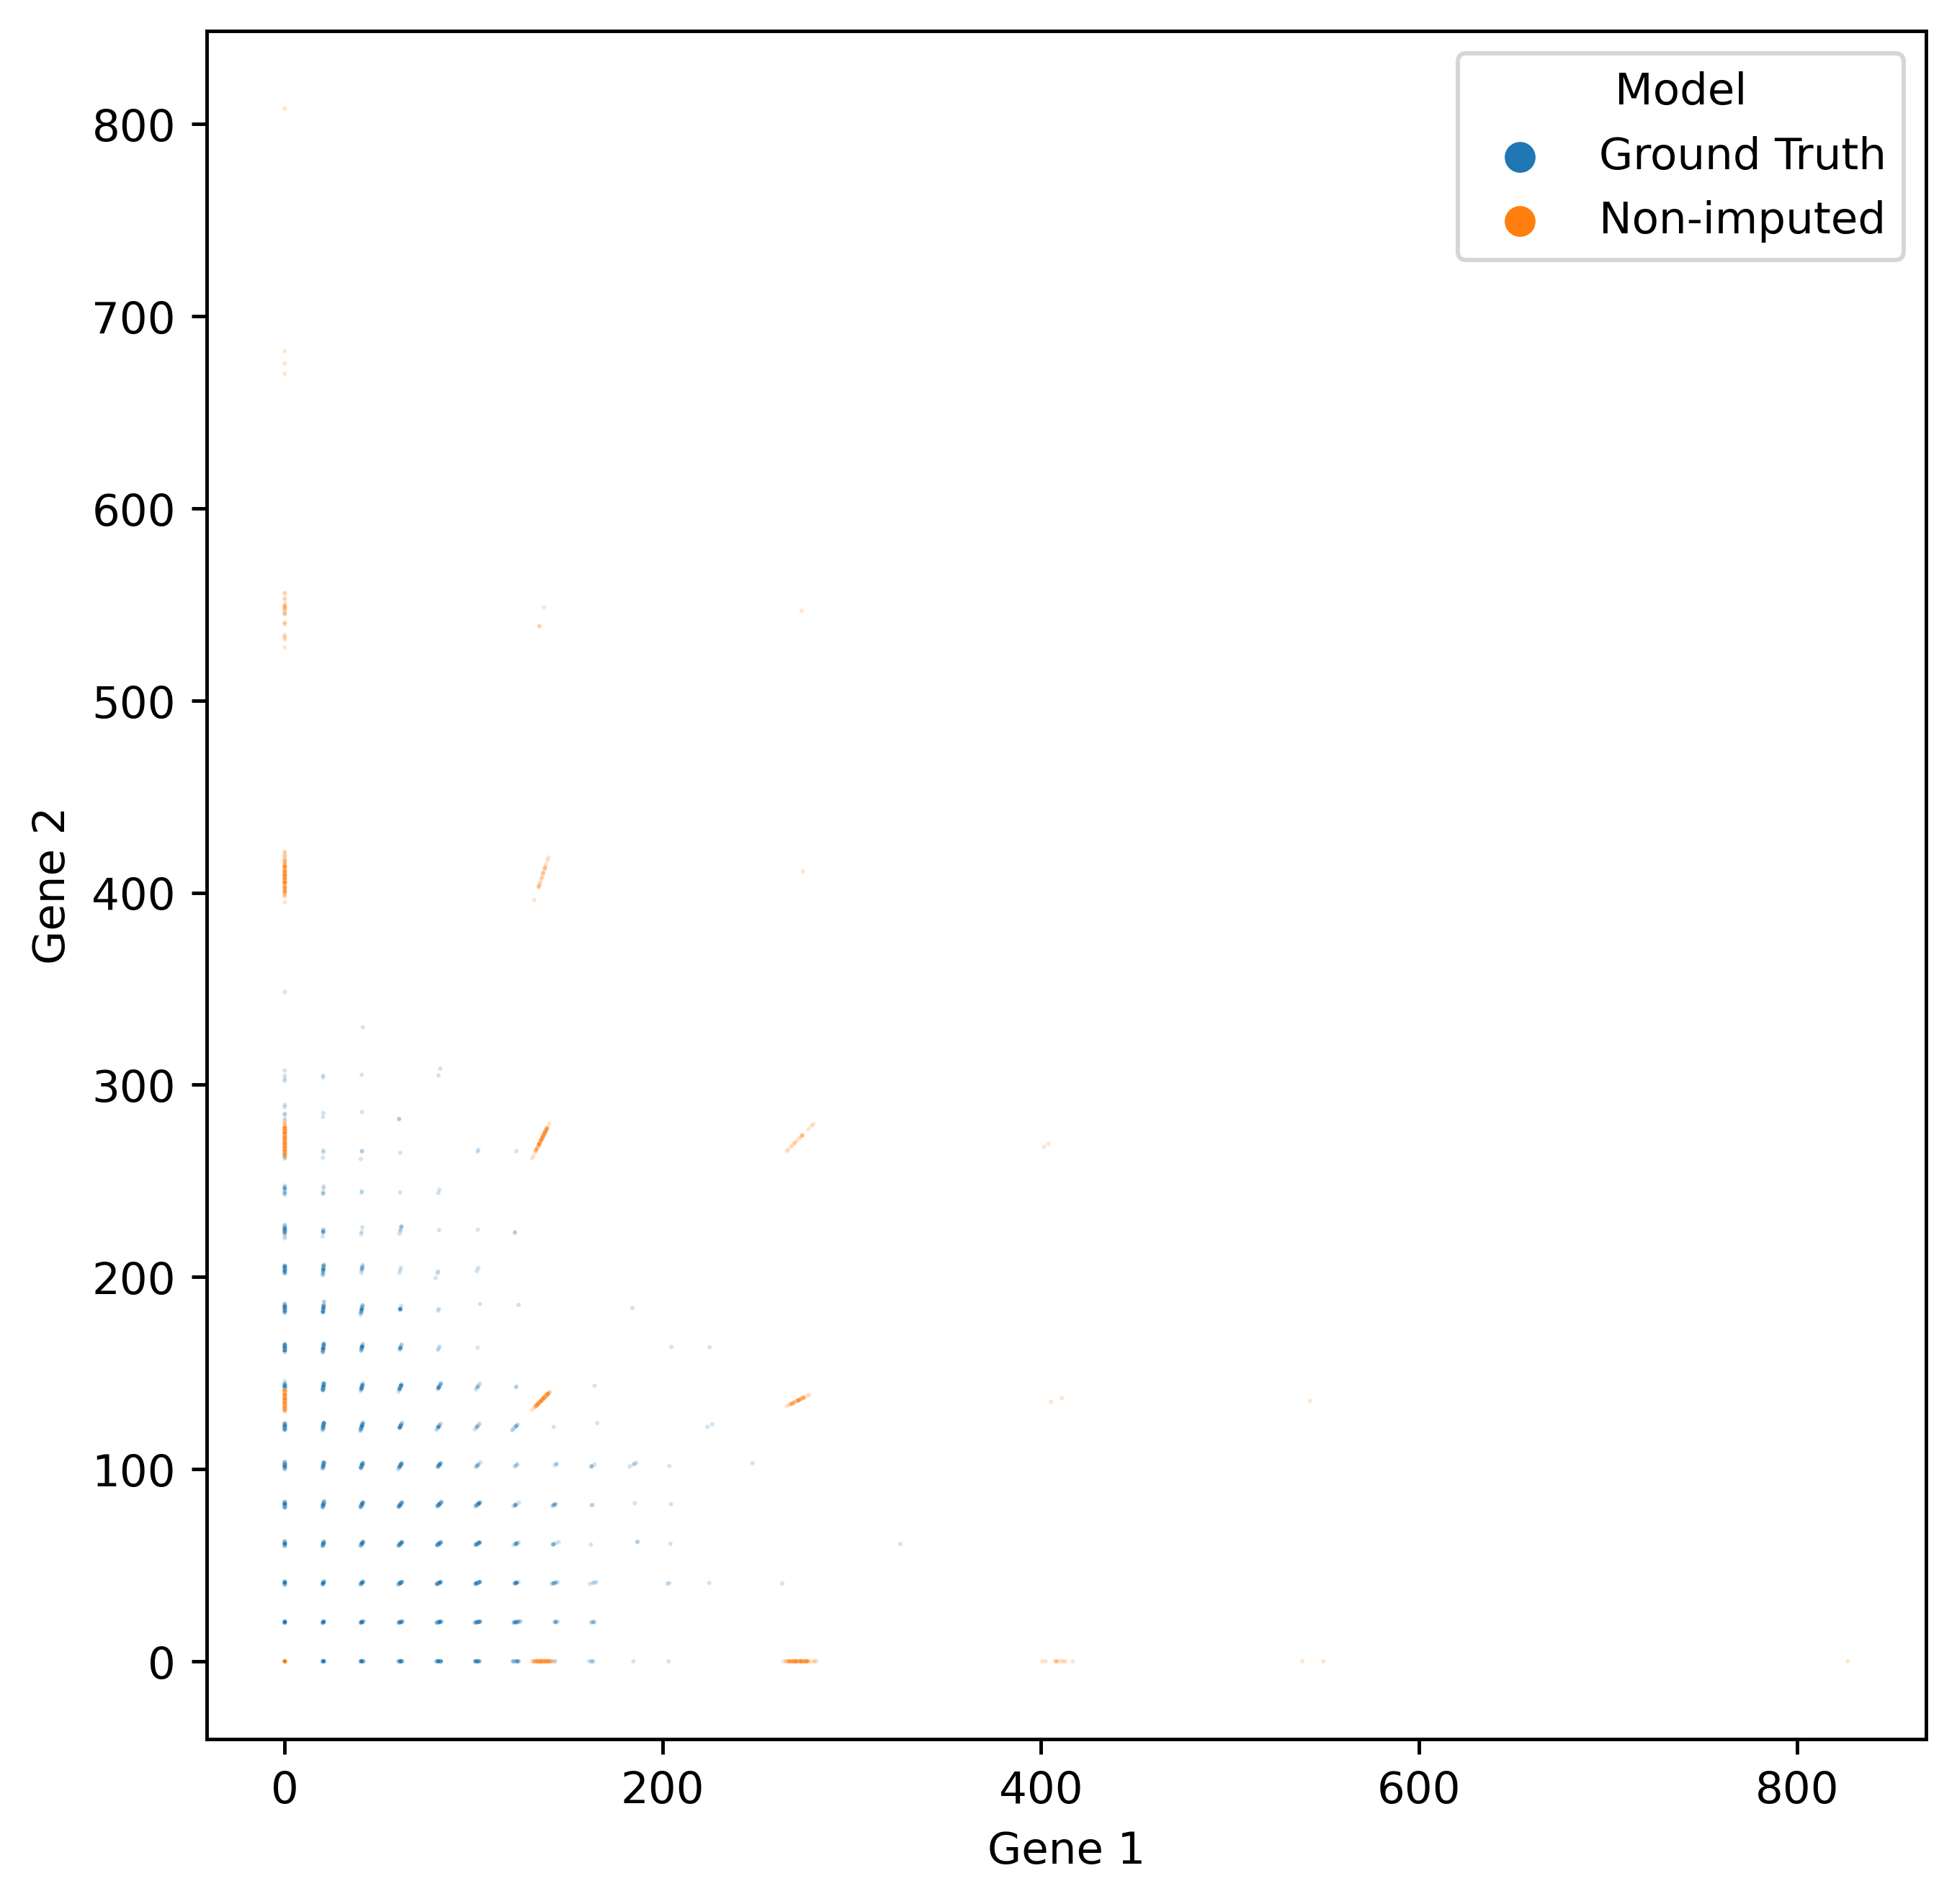

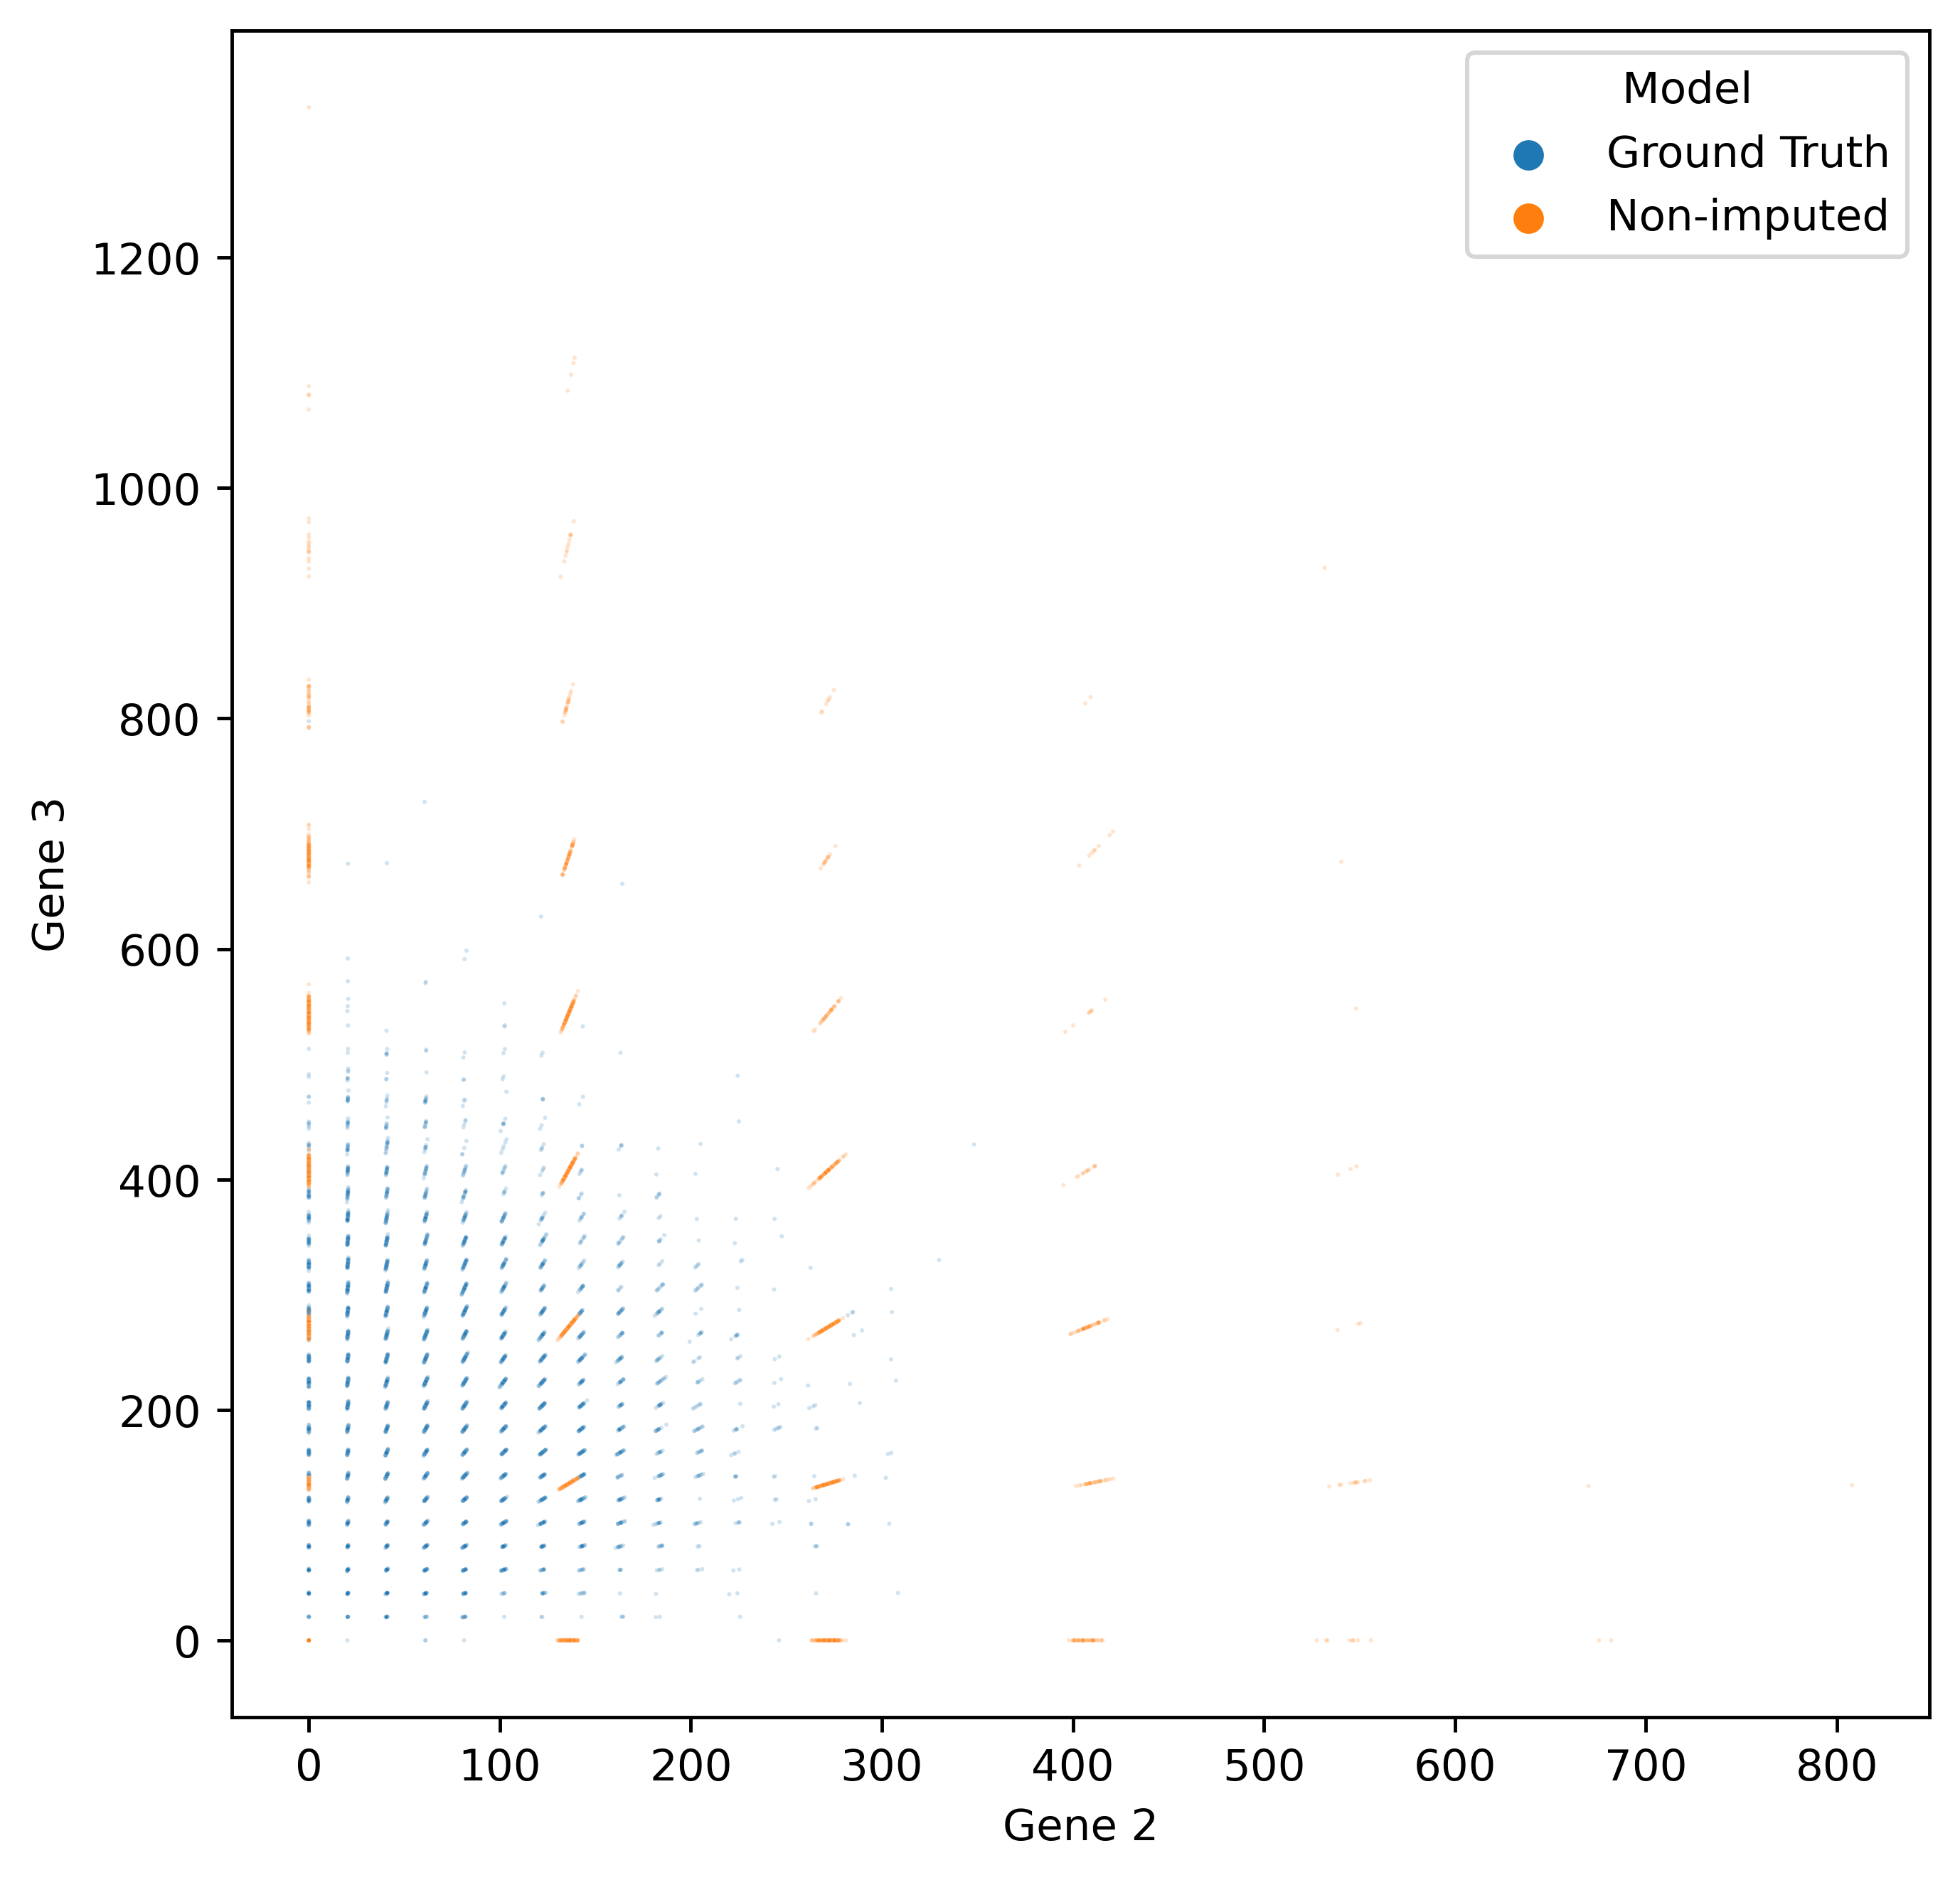

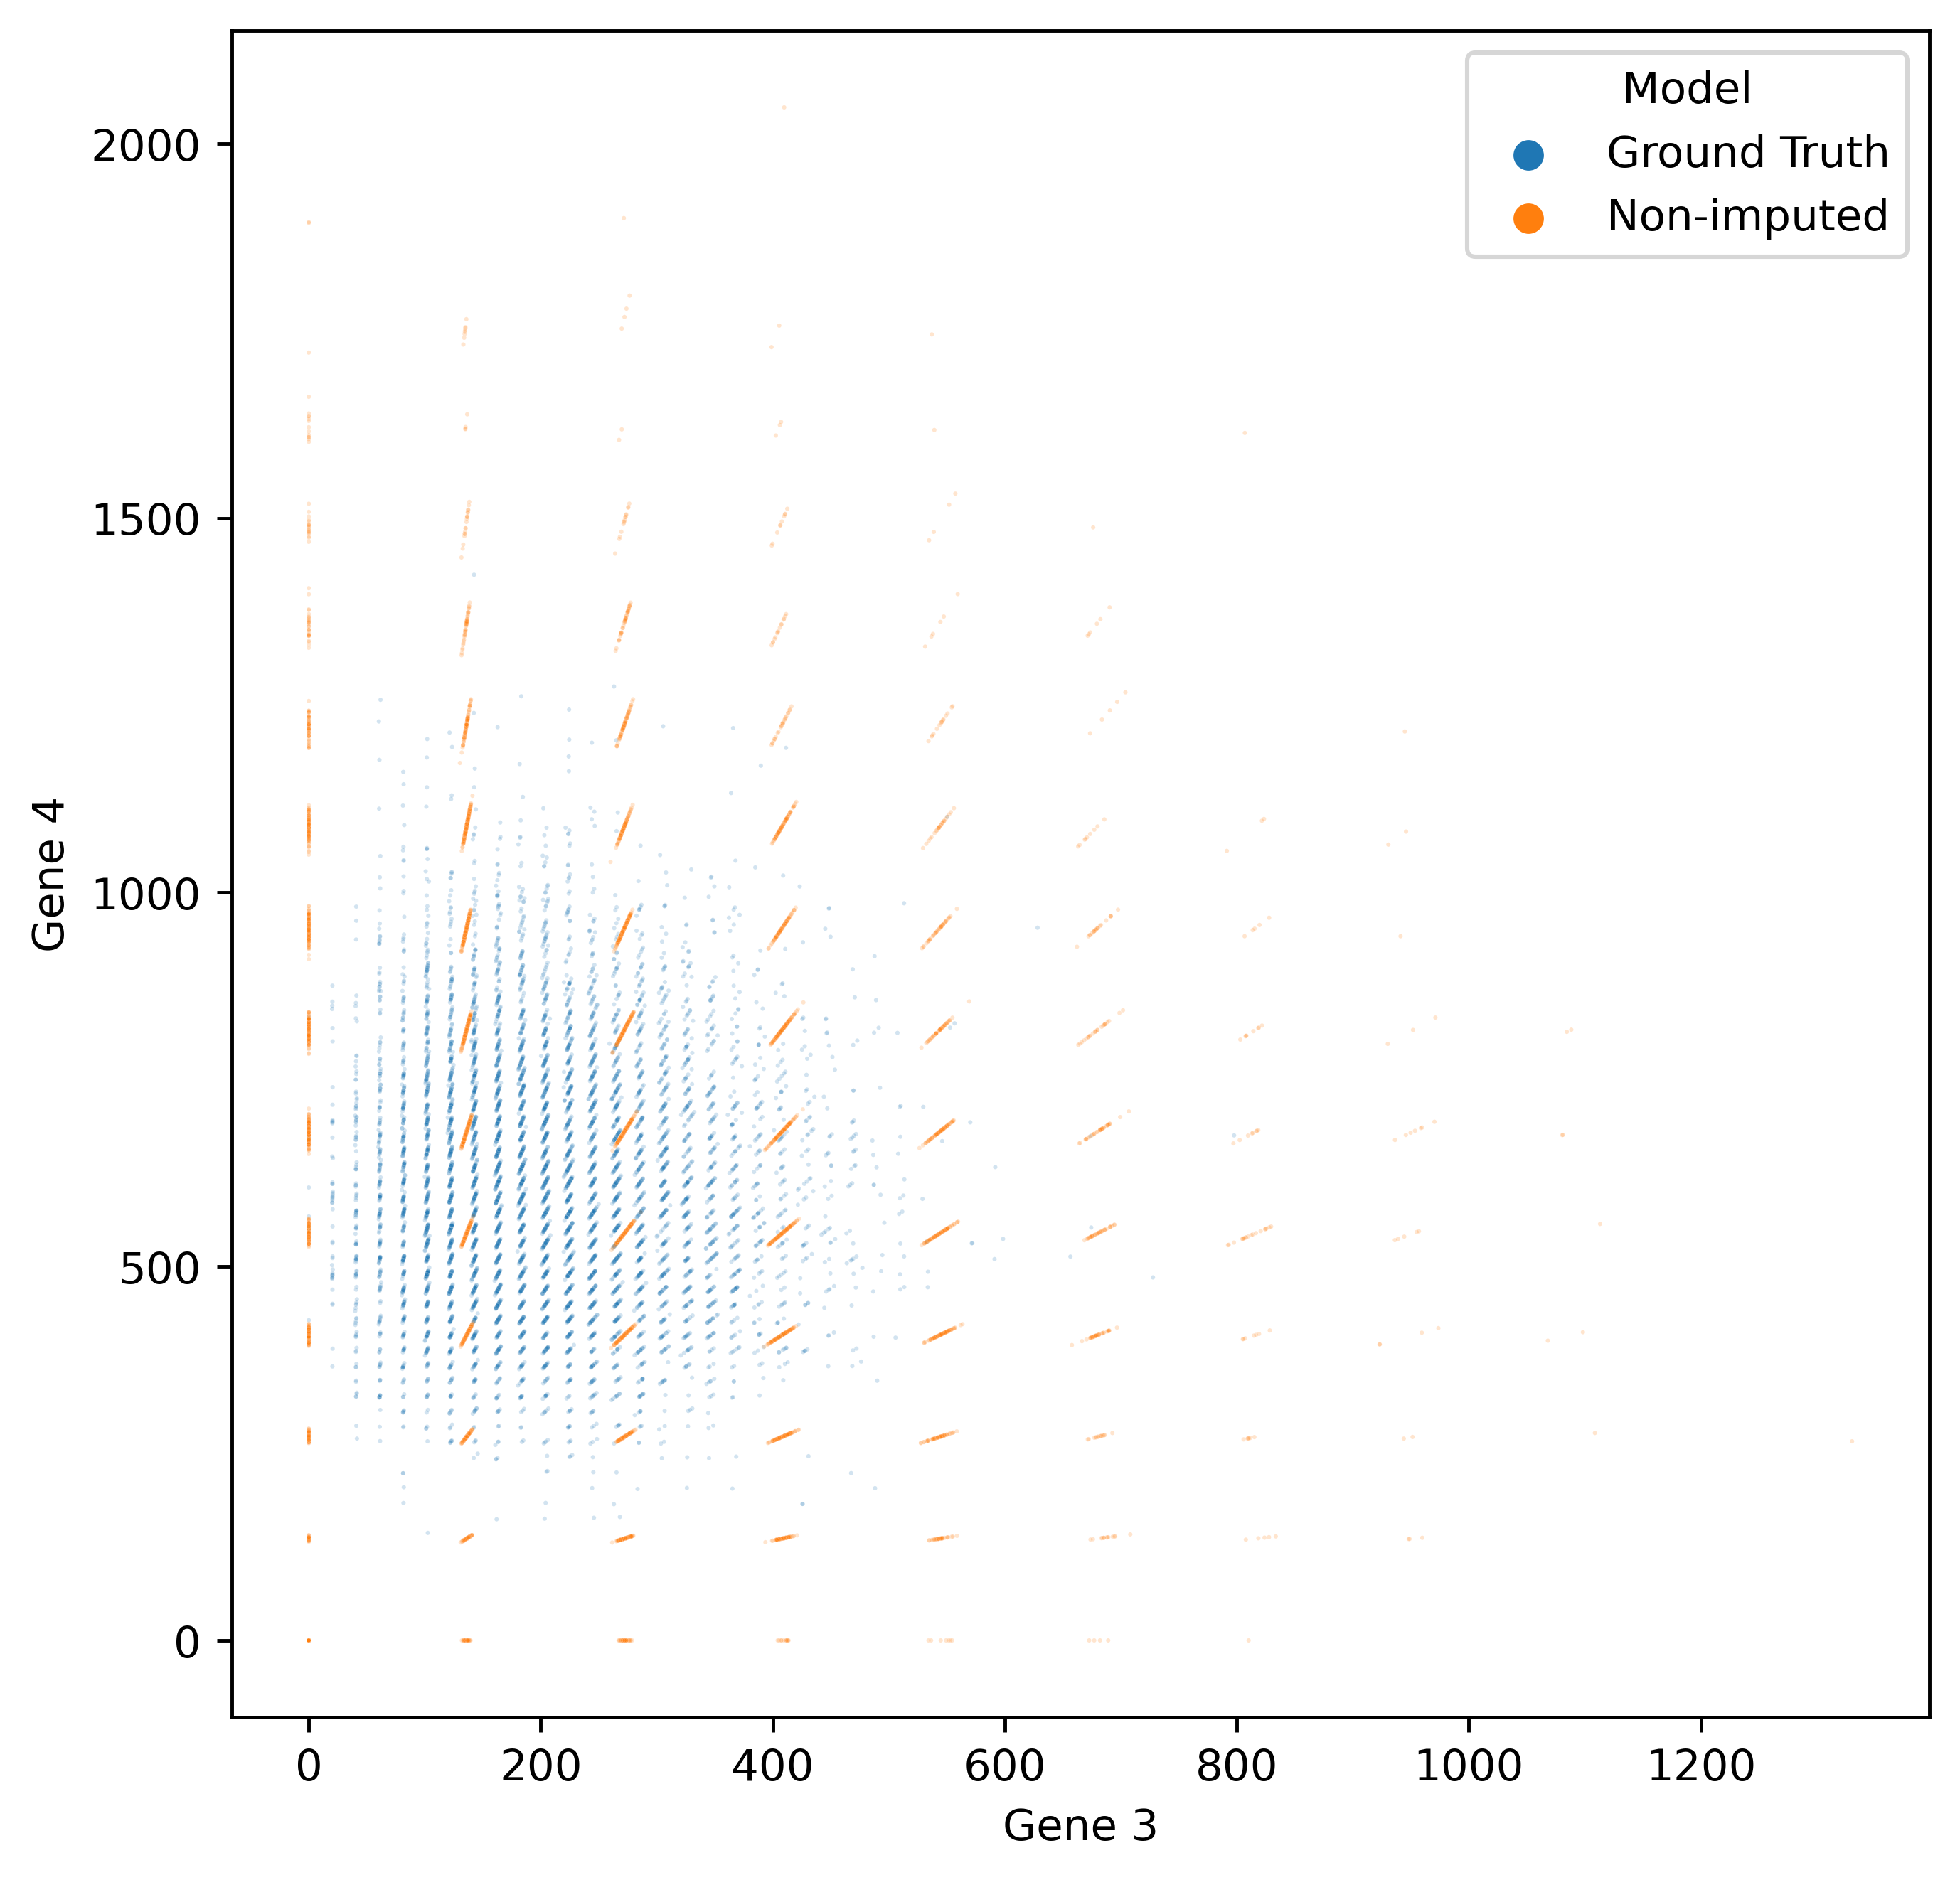

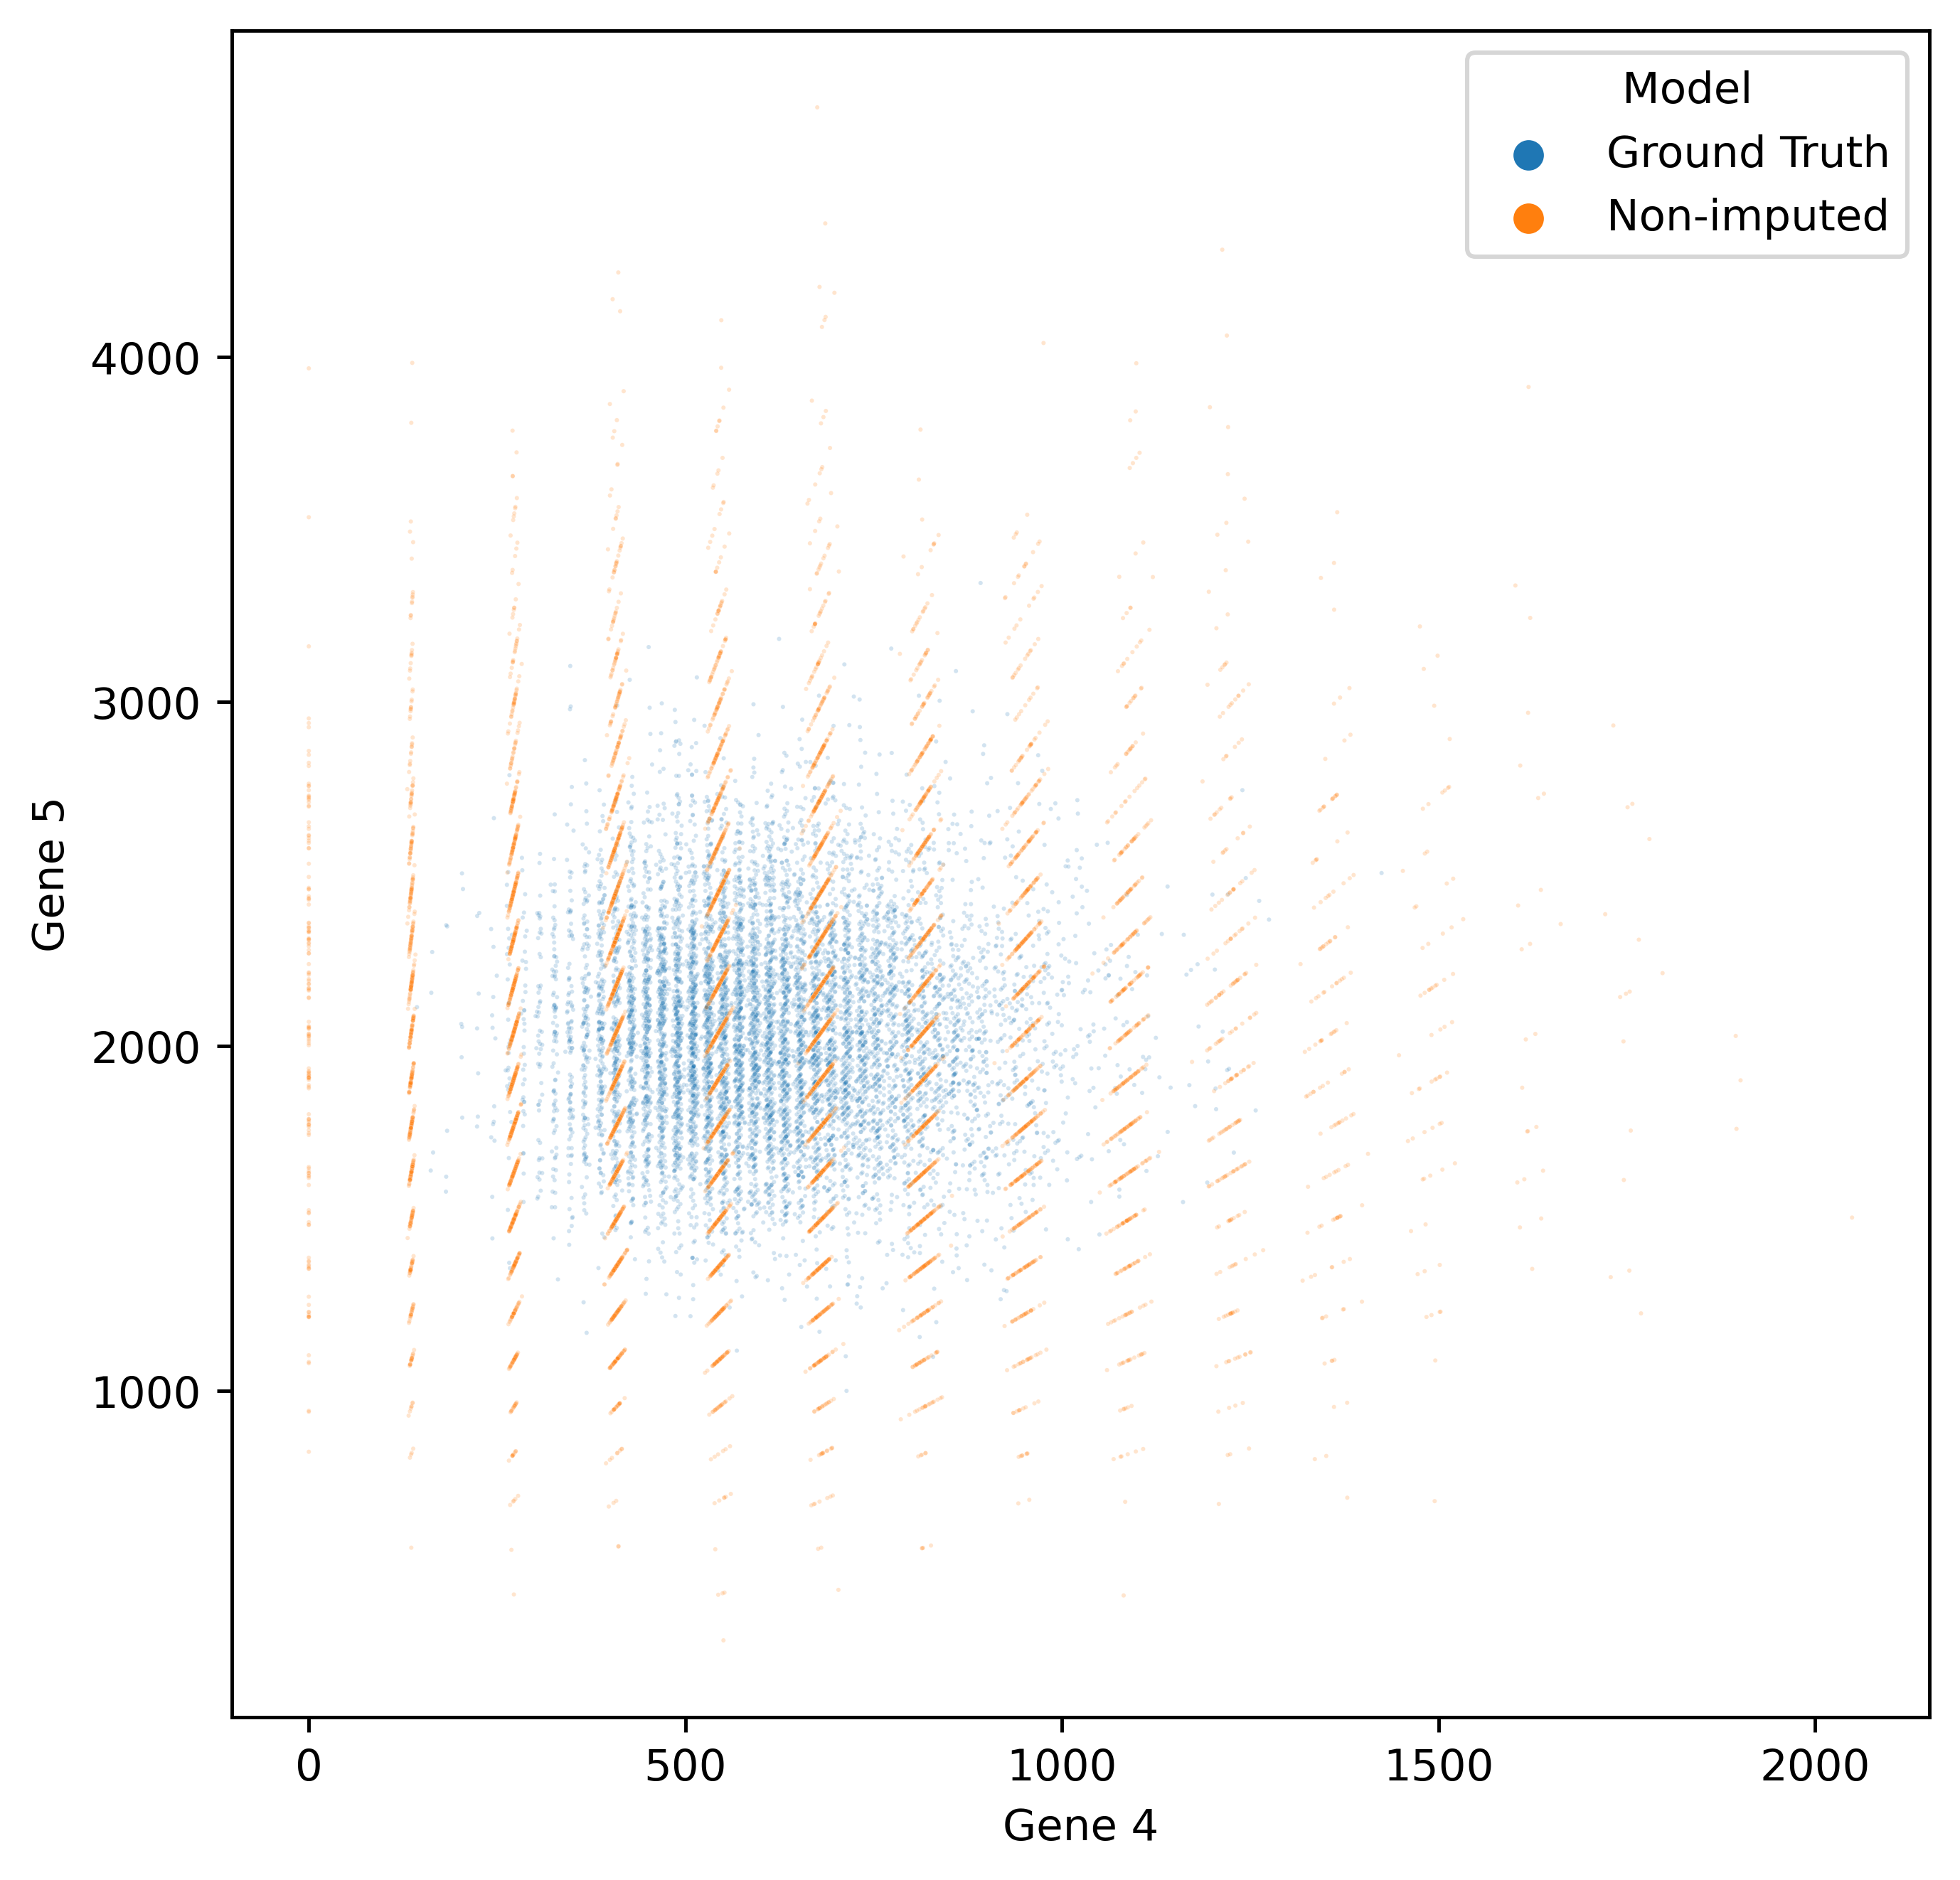

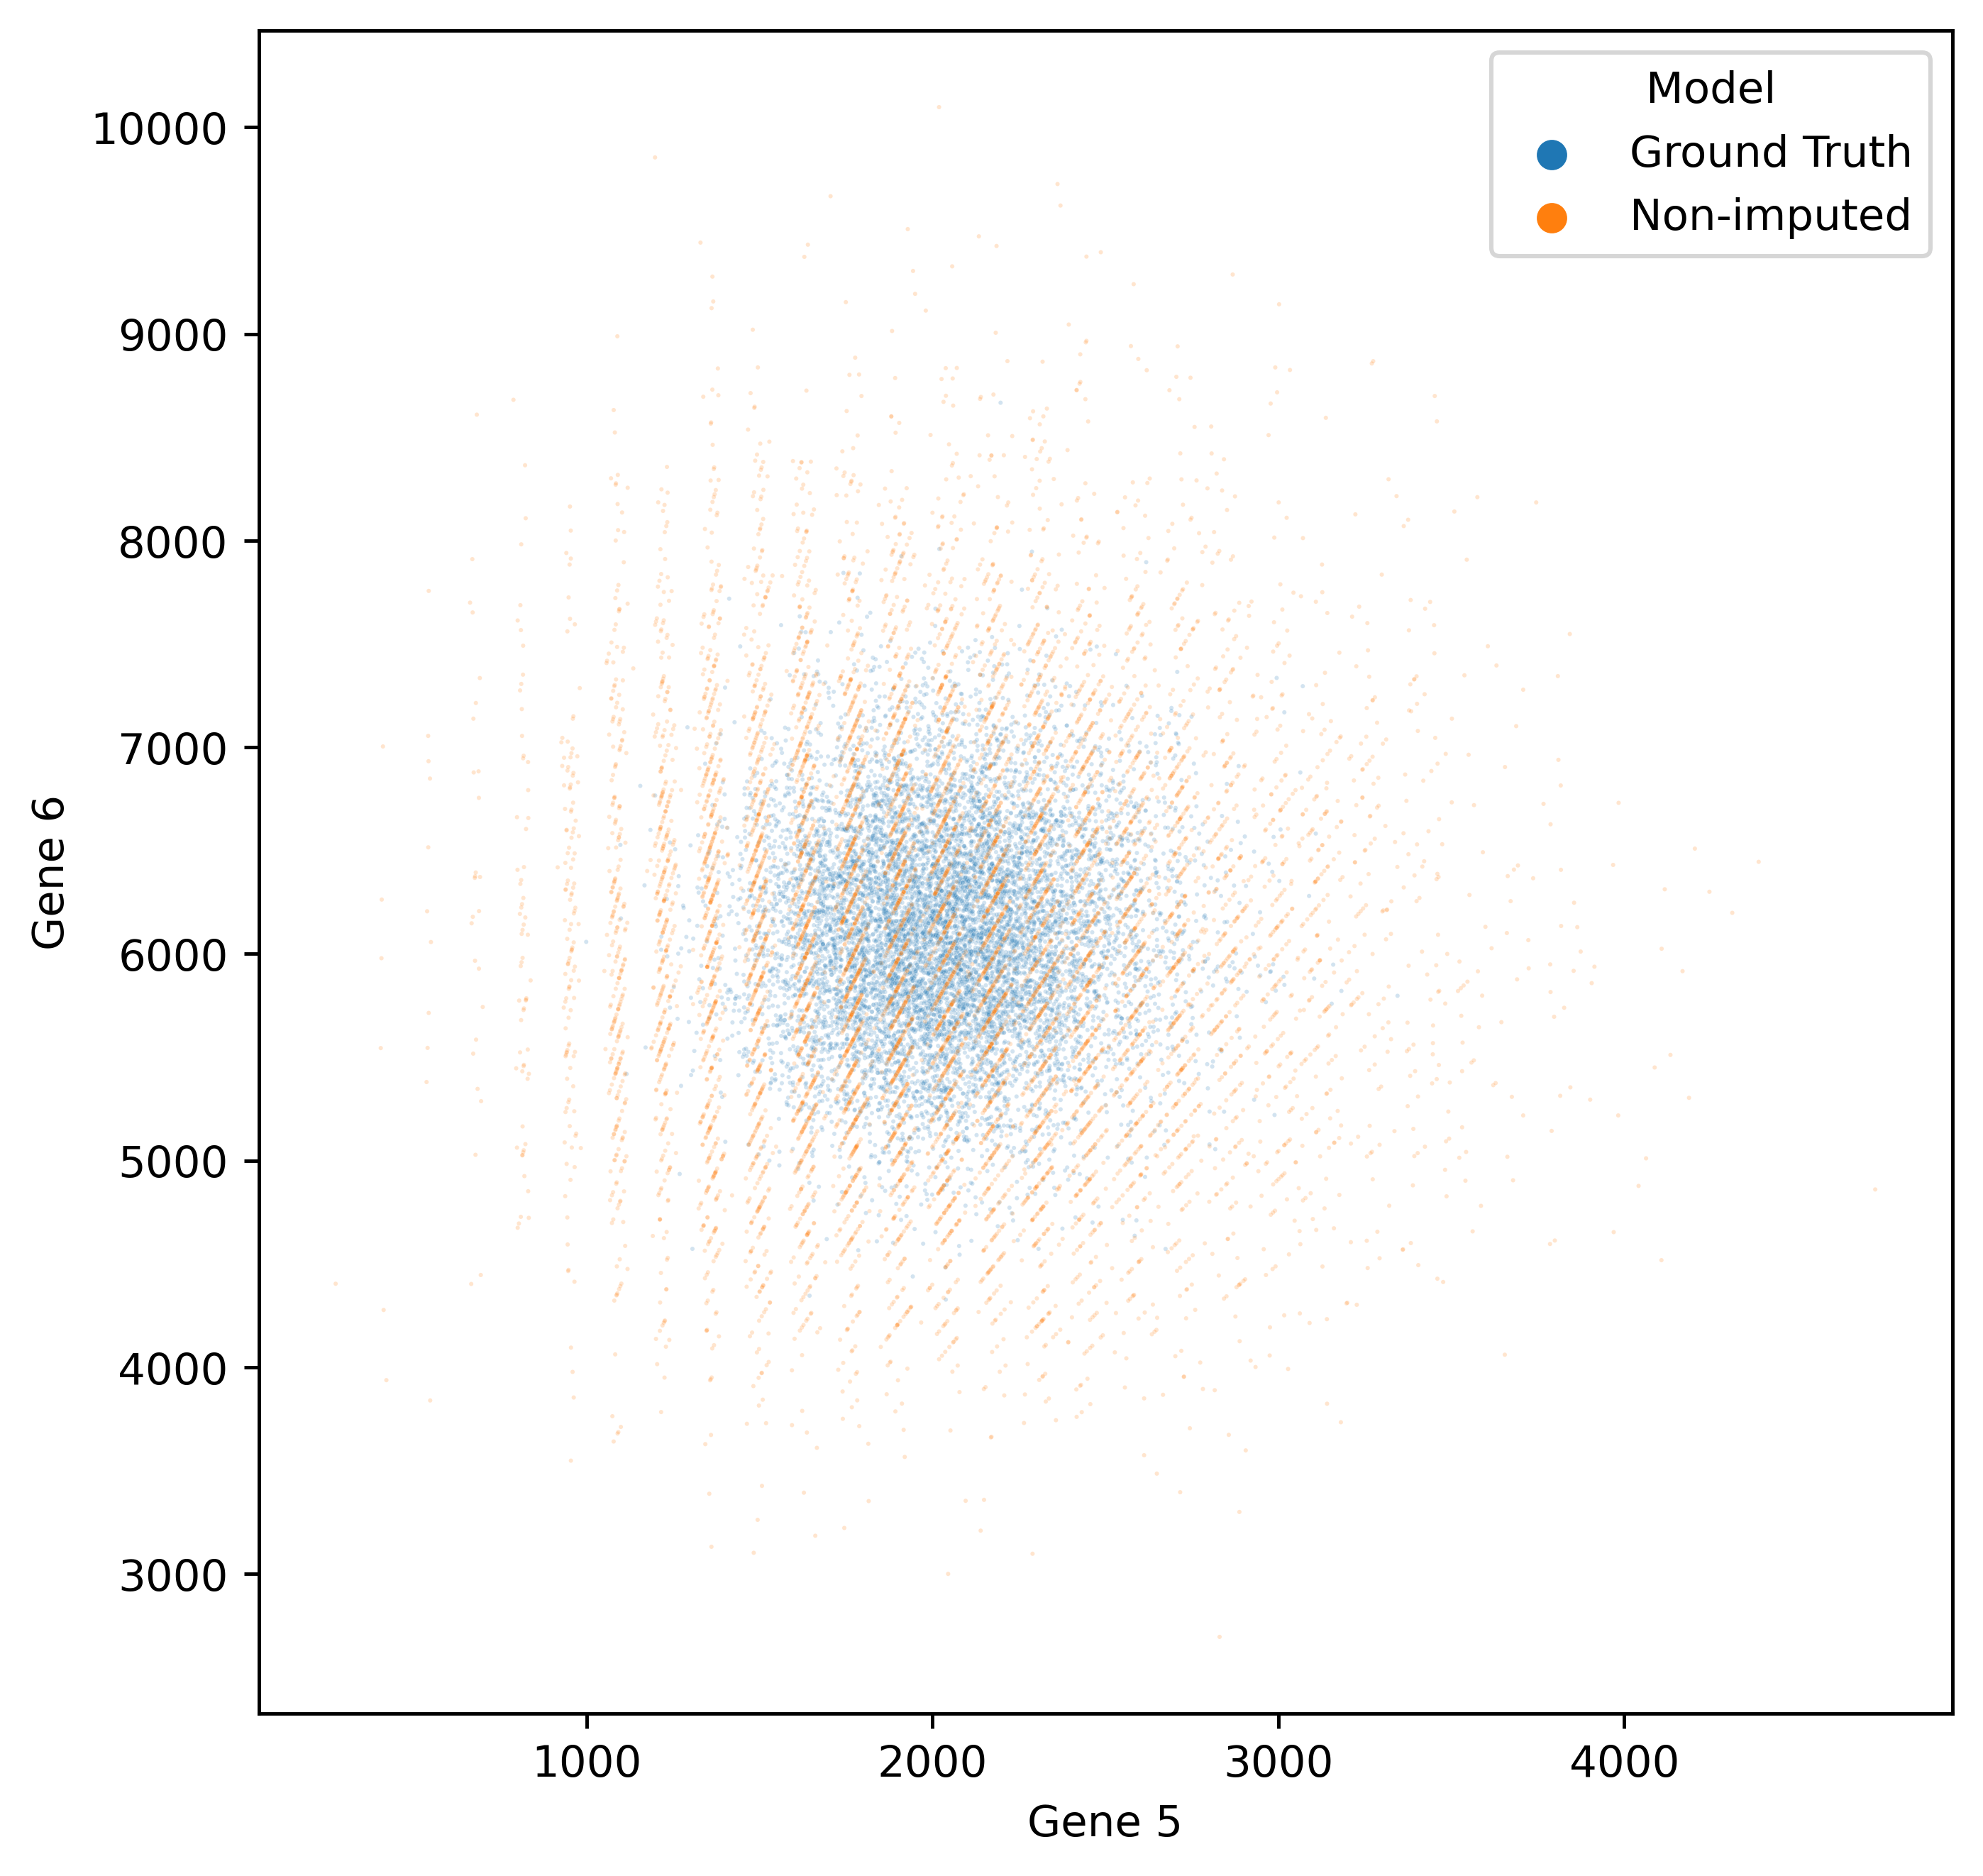

In [95]:
for i in range(5): 
    plt.figure()
    sns.scatterplot(data=before_imputation, x=genes[i], y =genes[i+1], hue="Model", alpha=0.2, s=1)

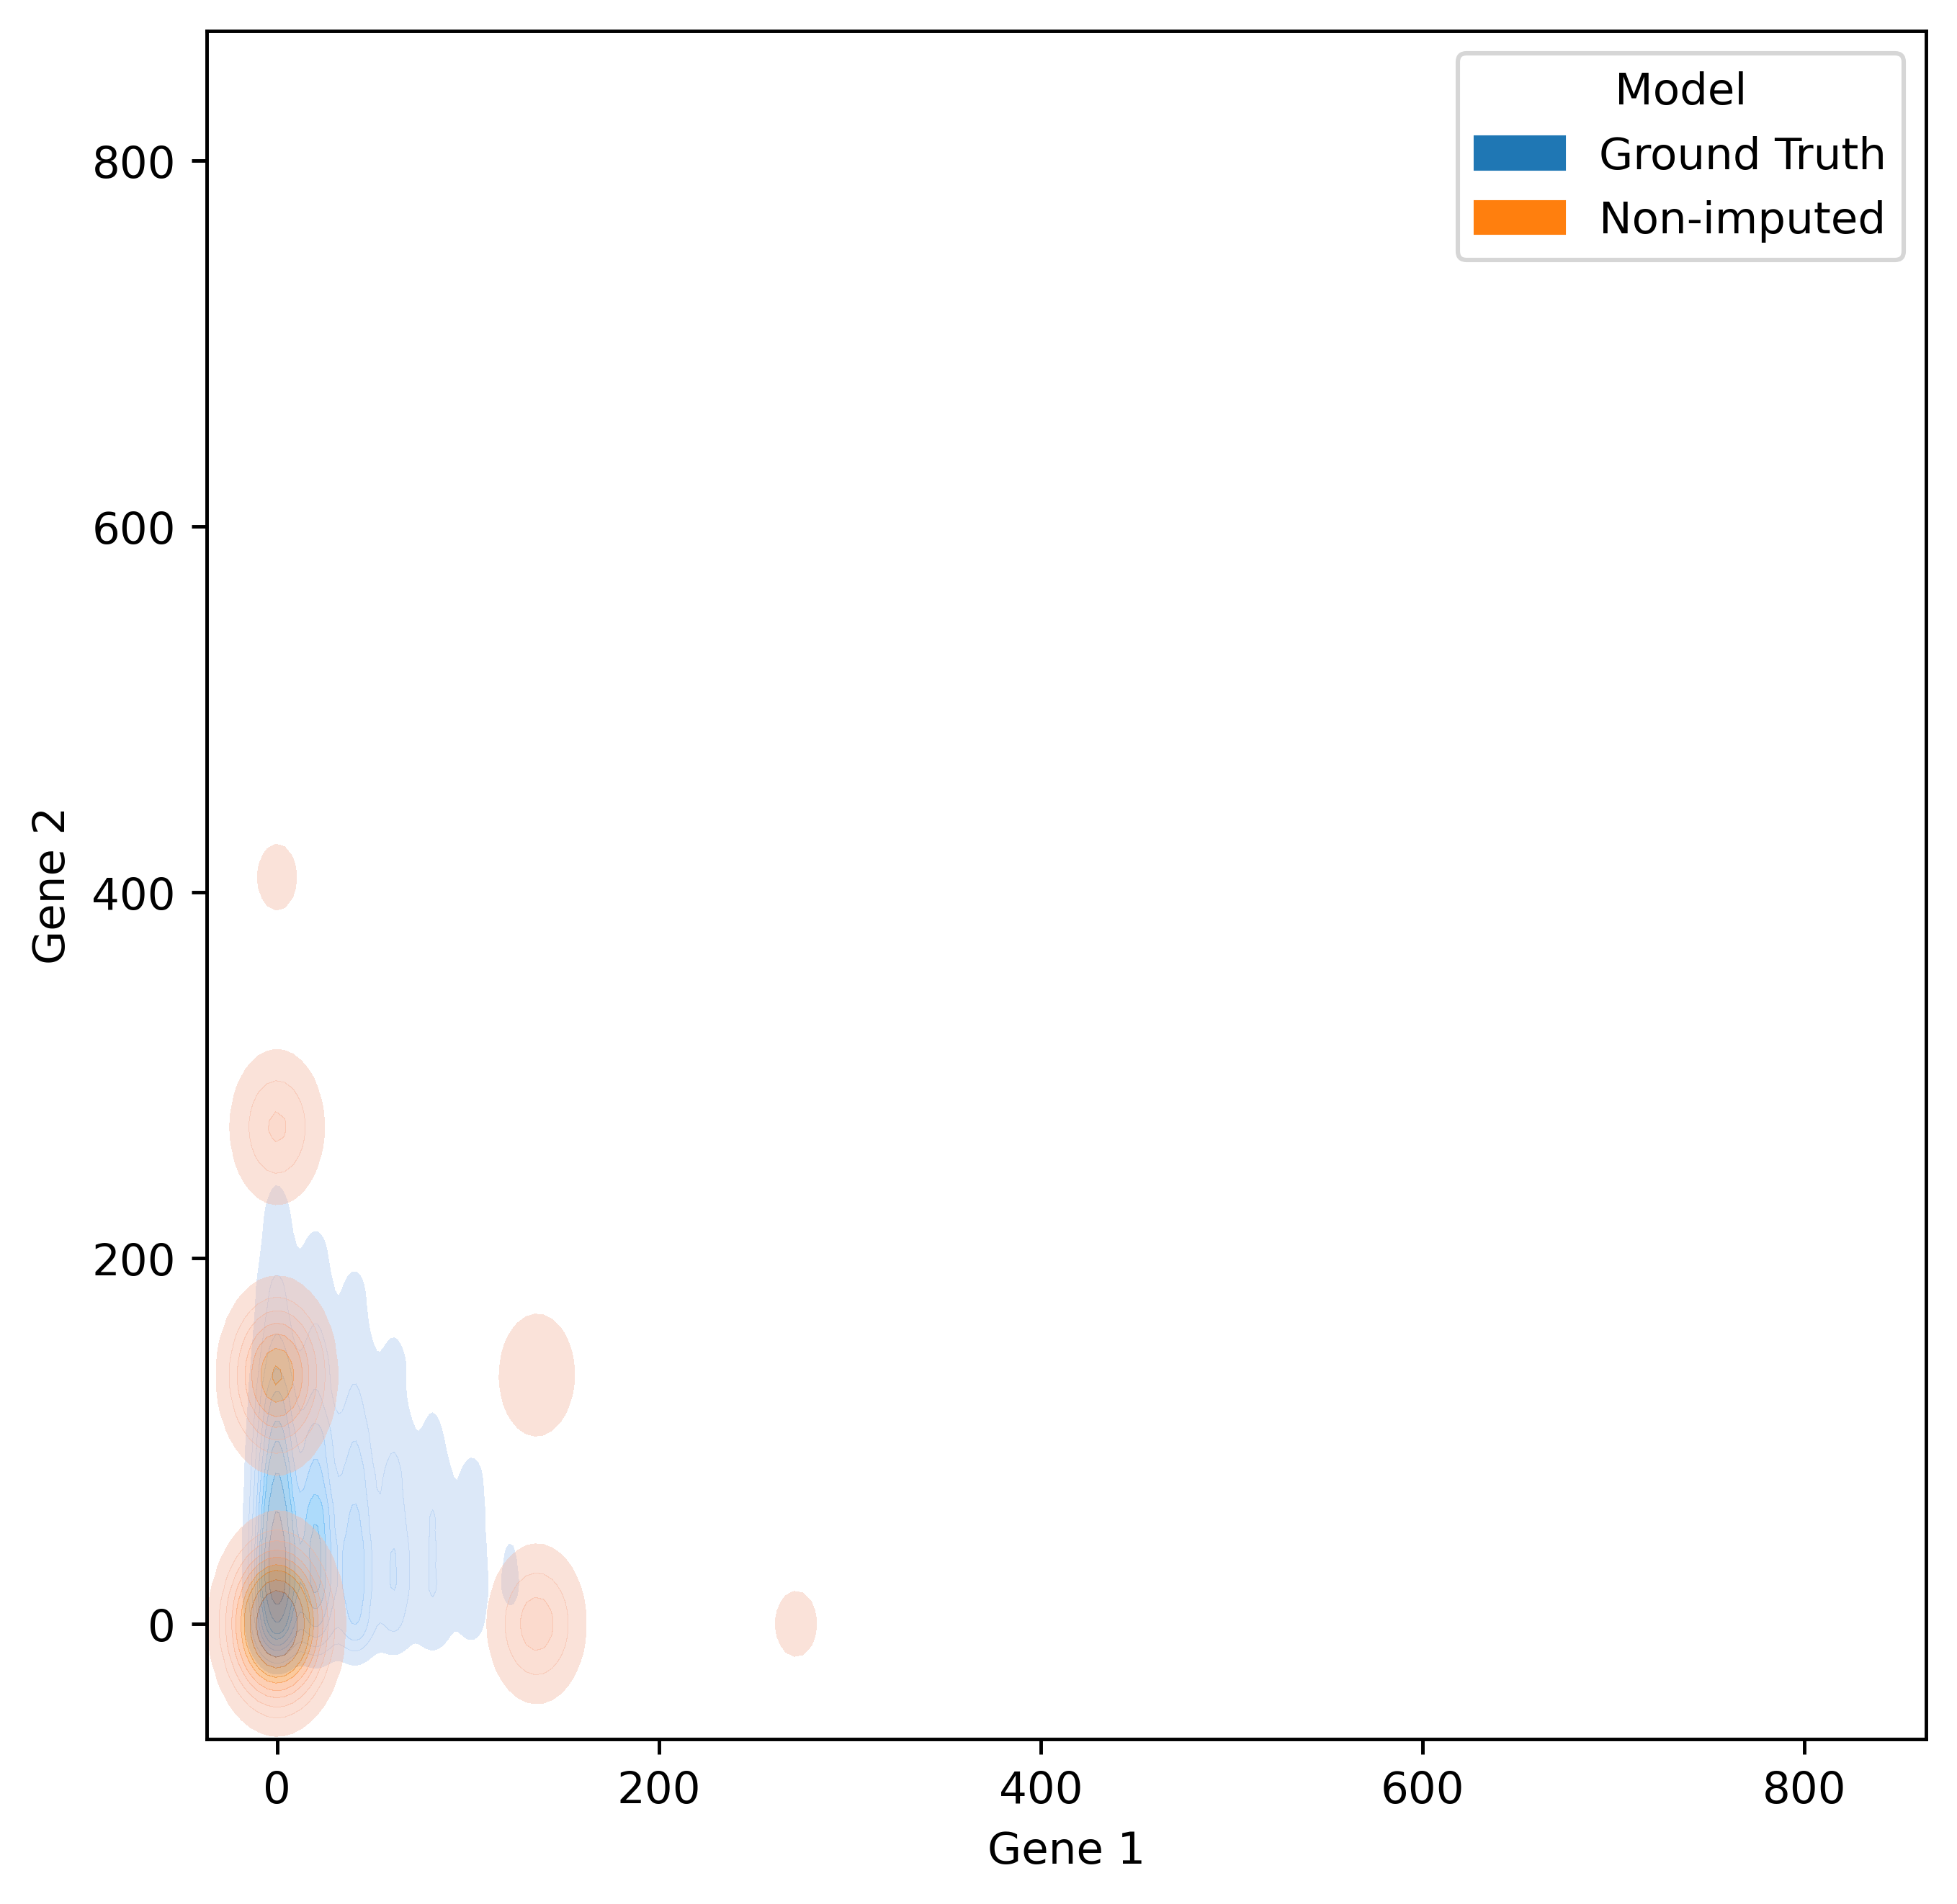

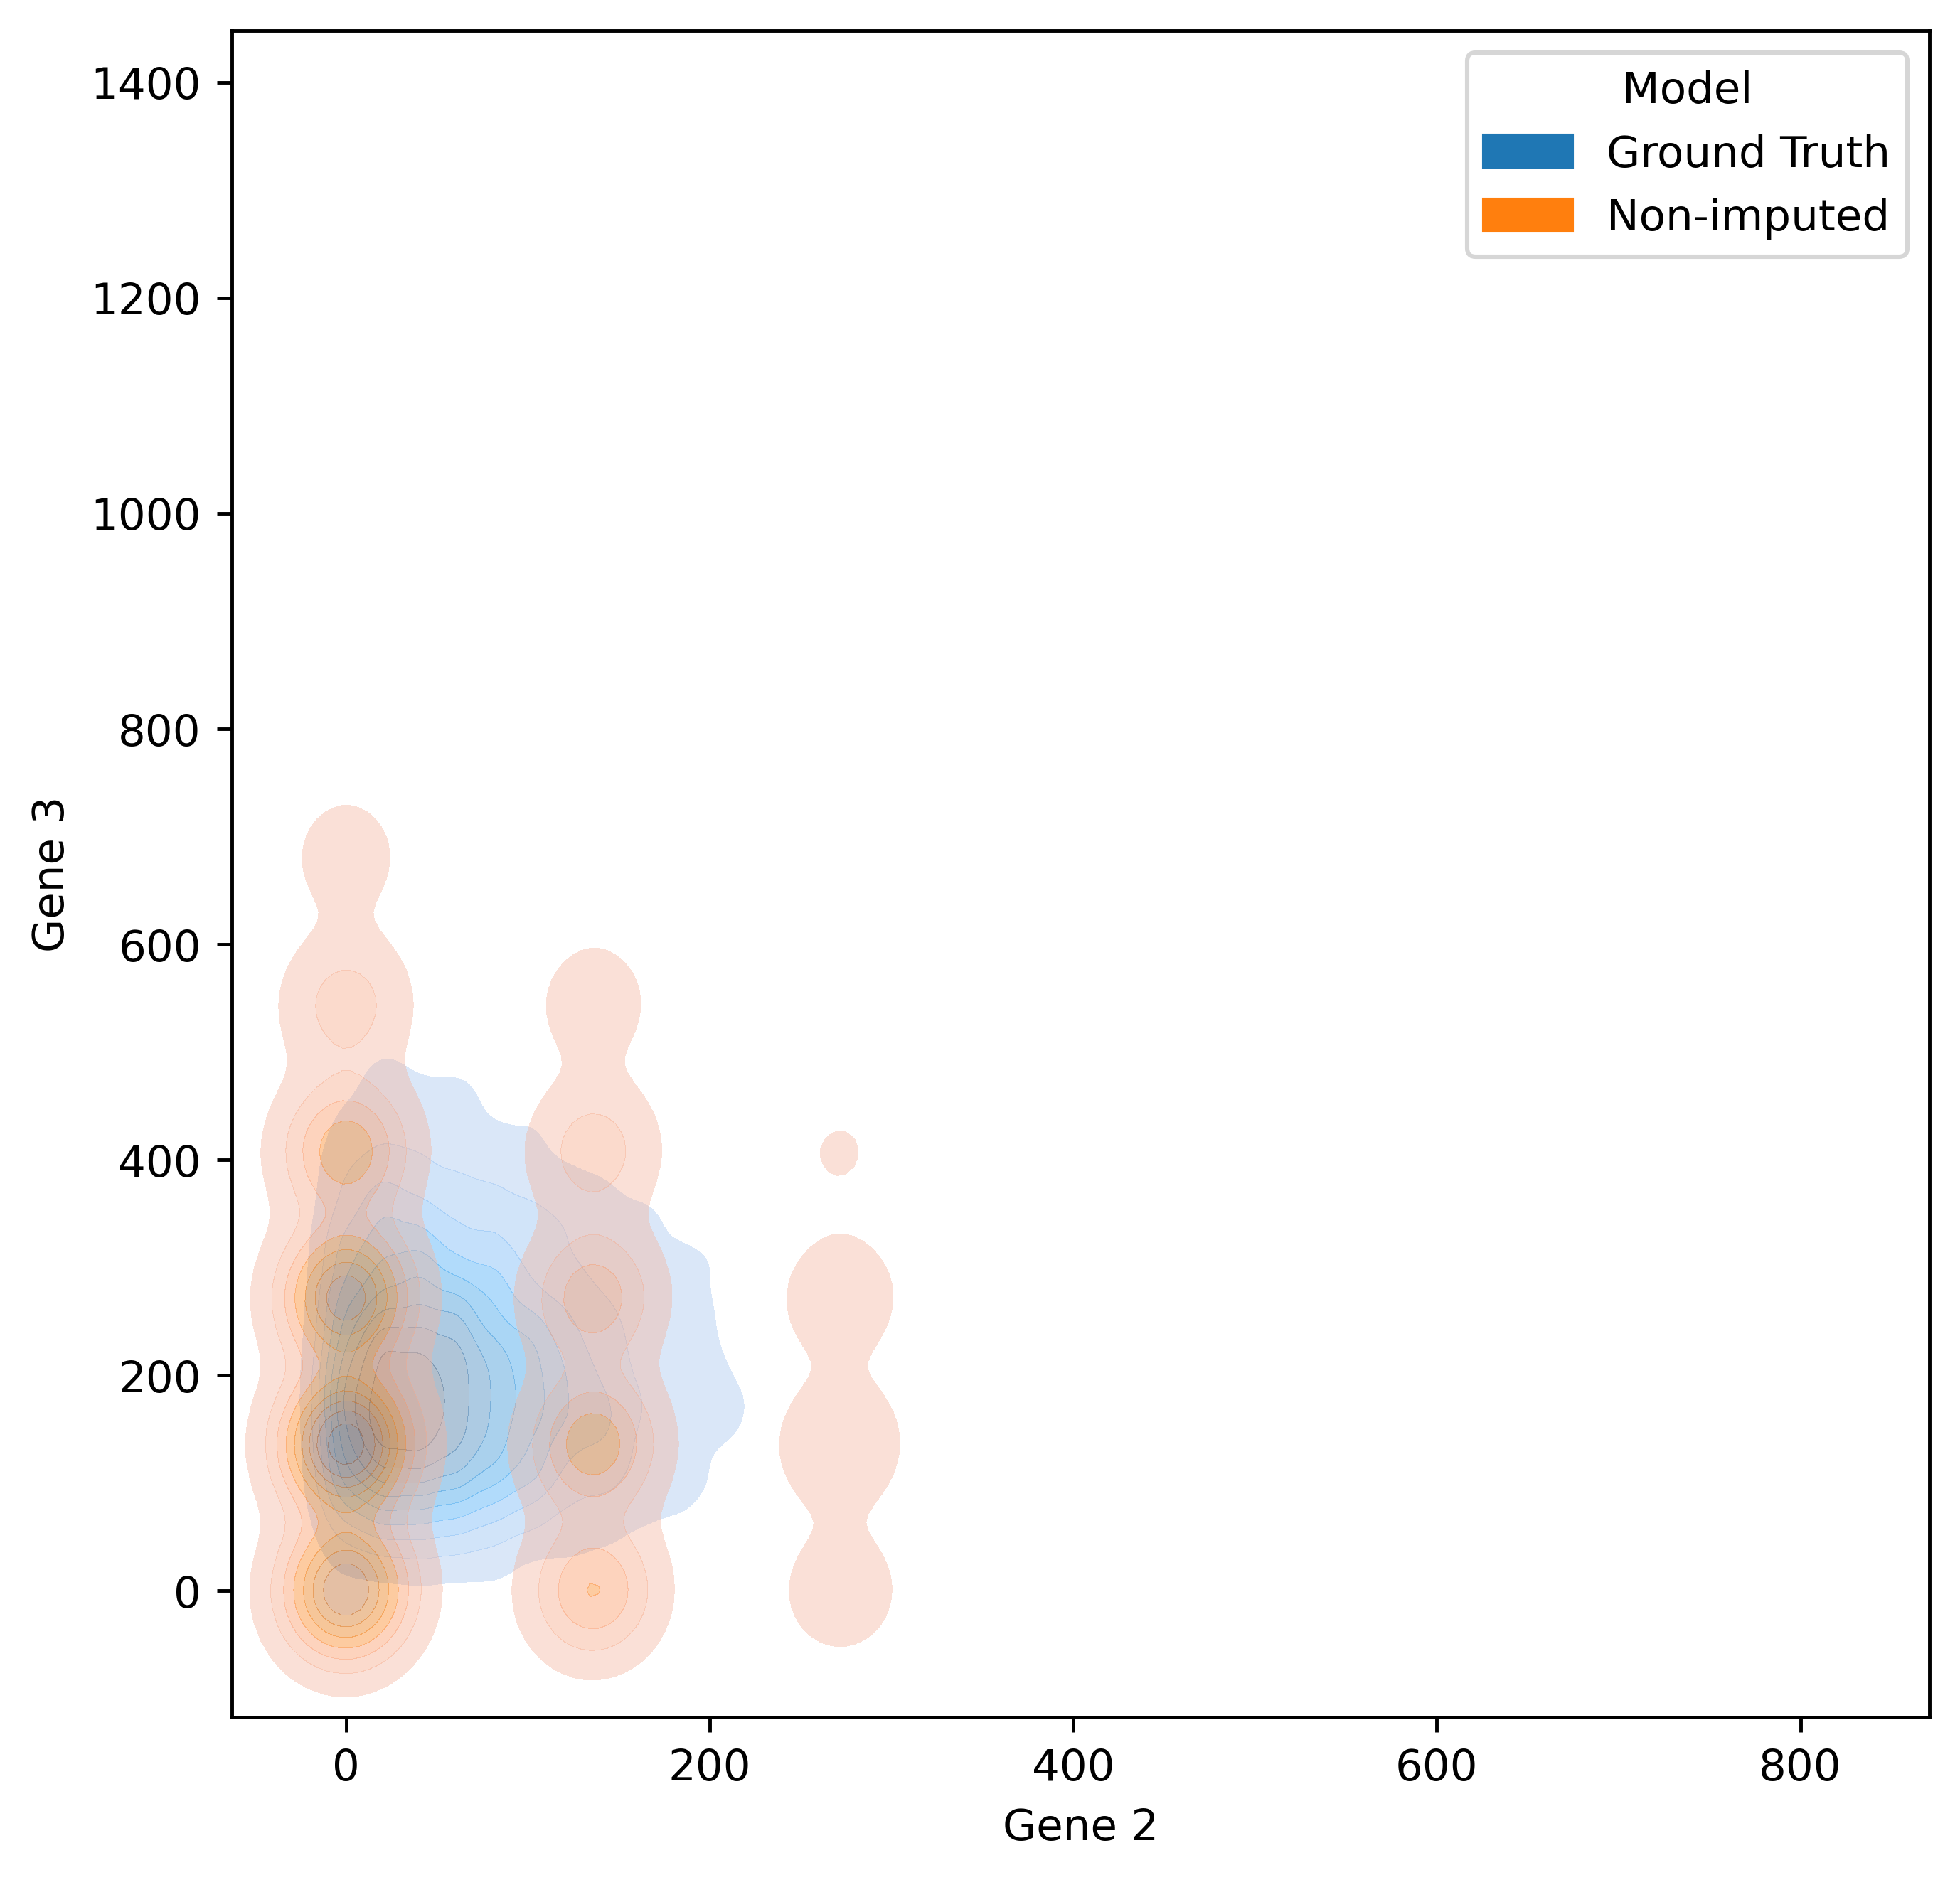

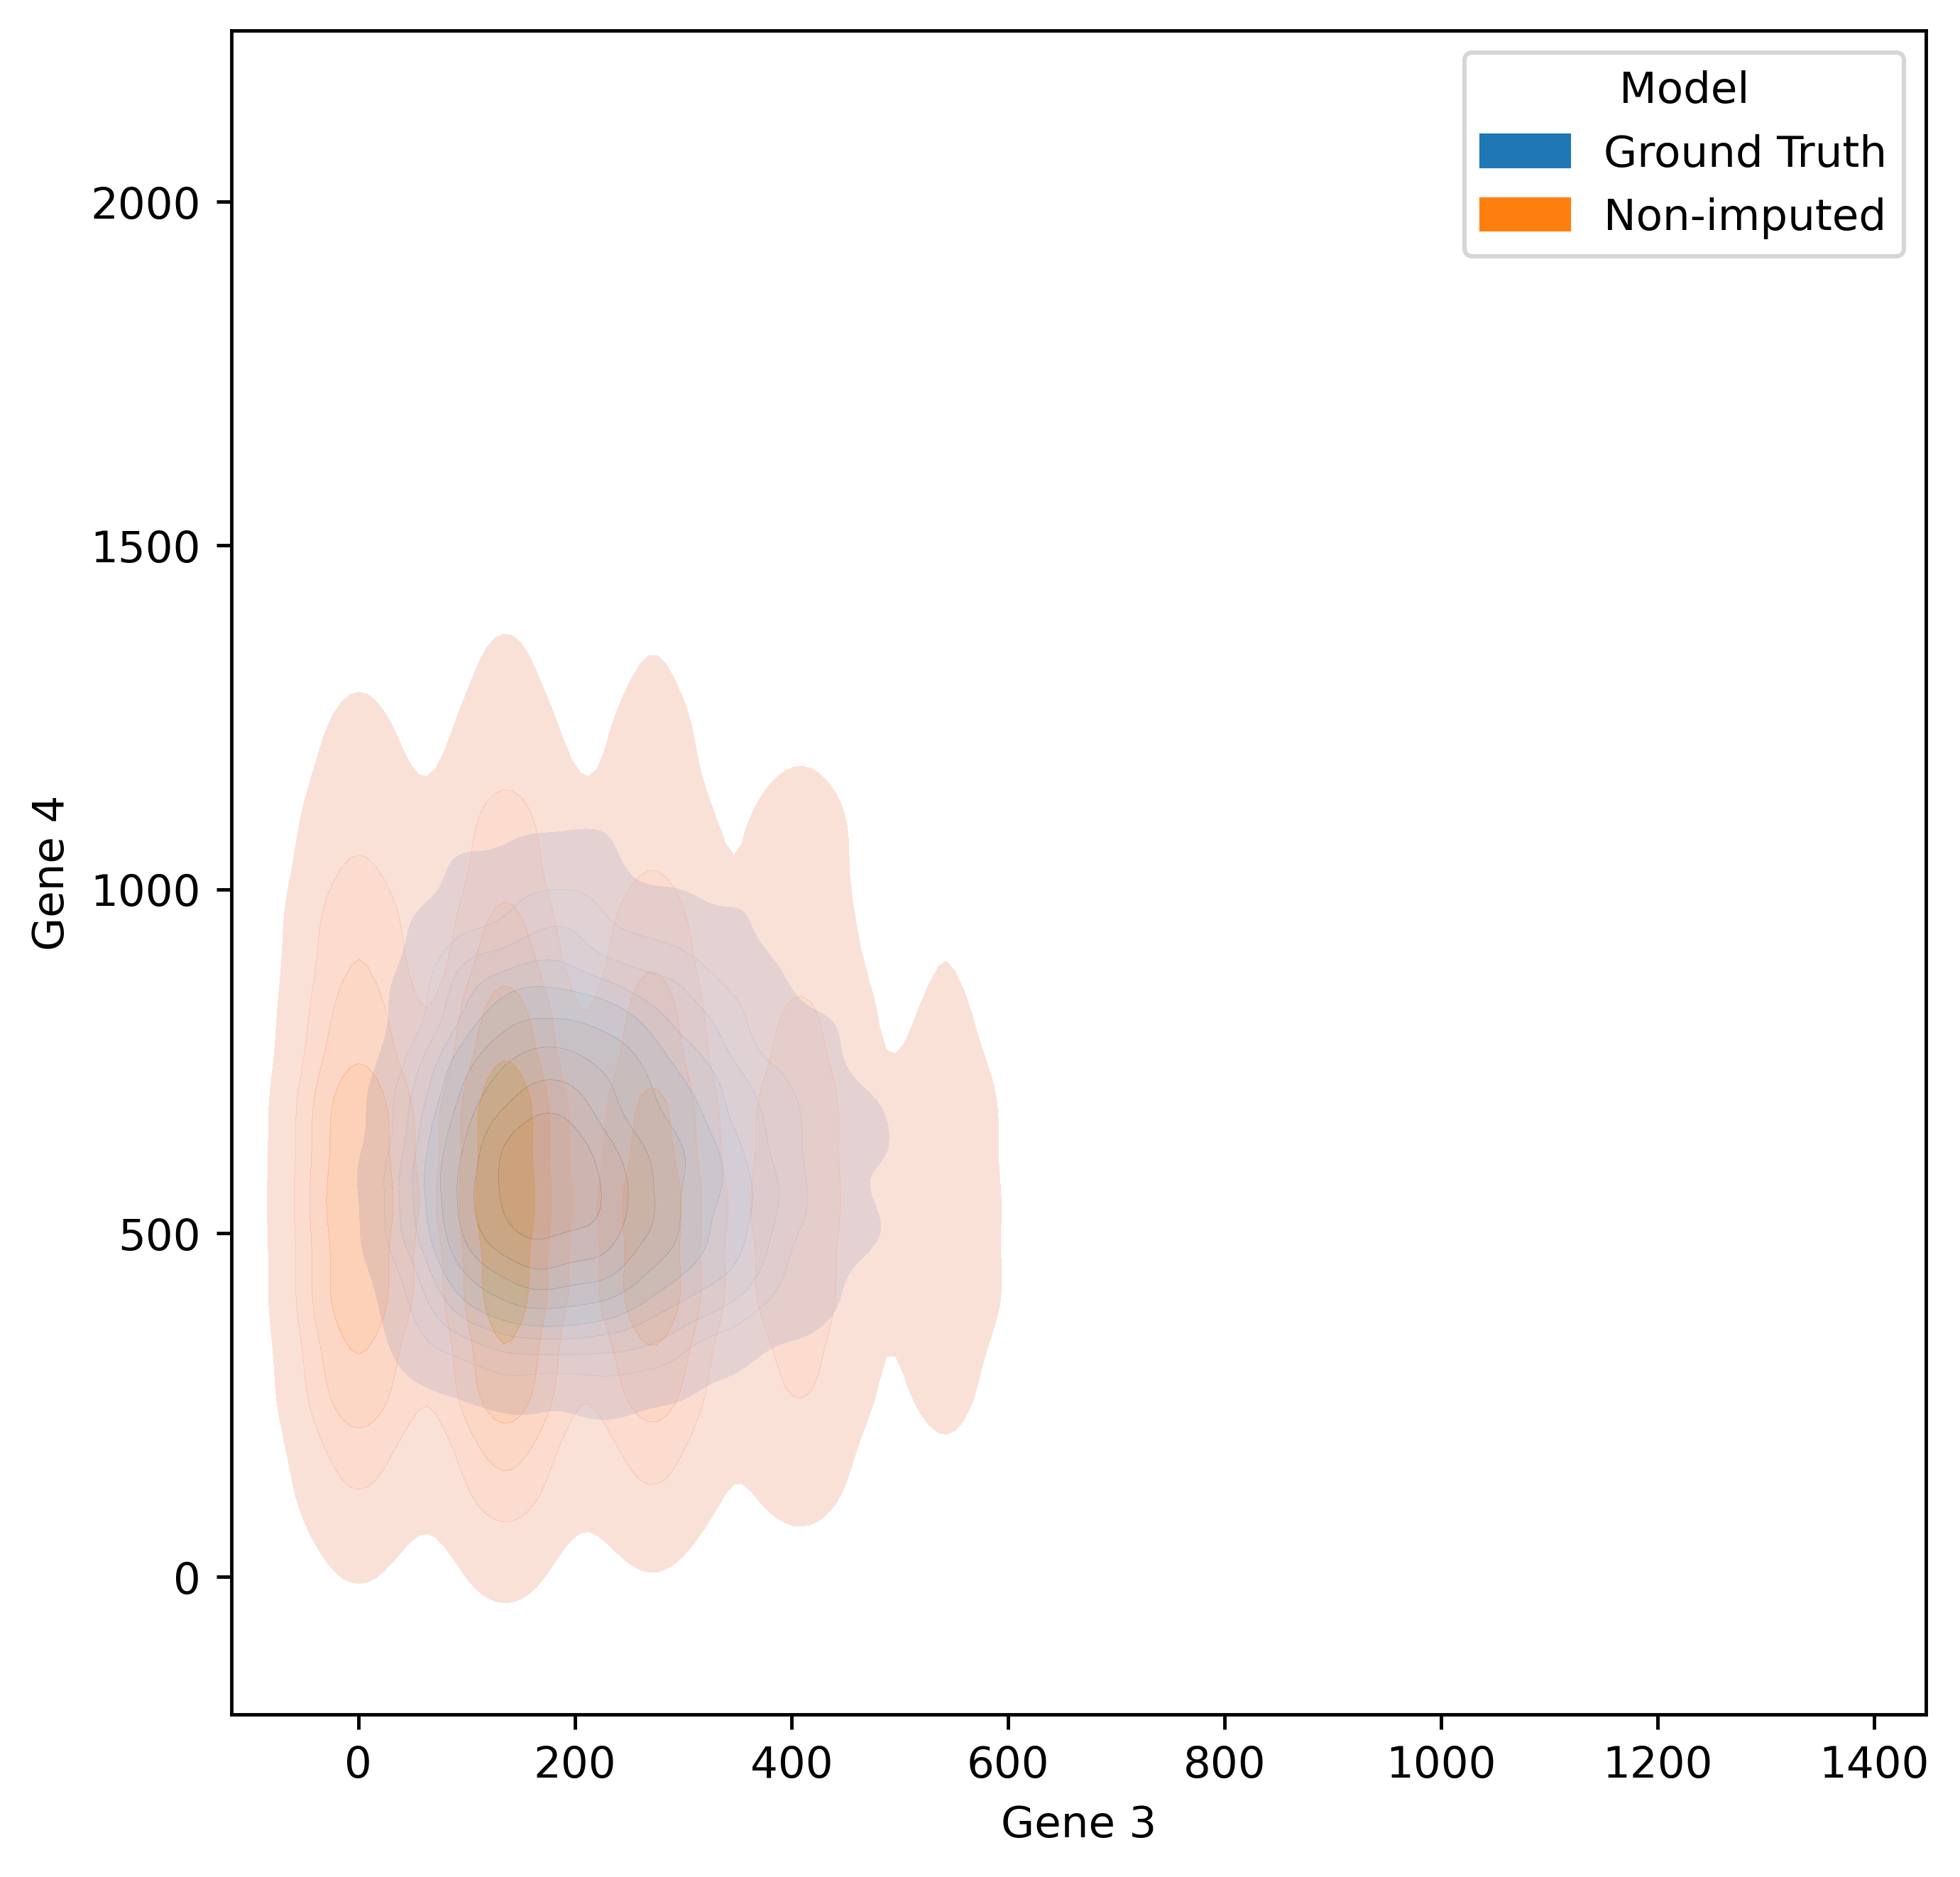

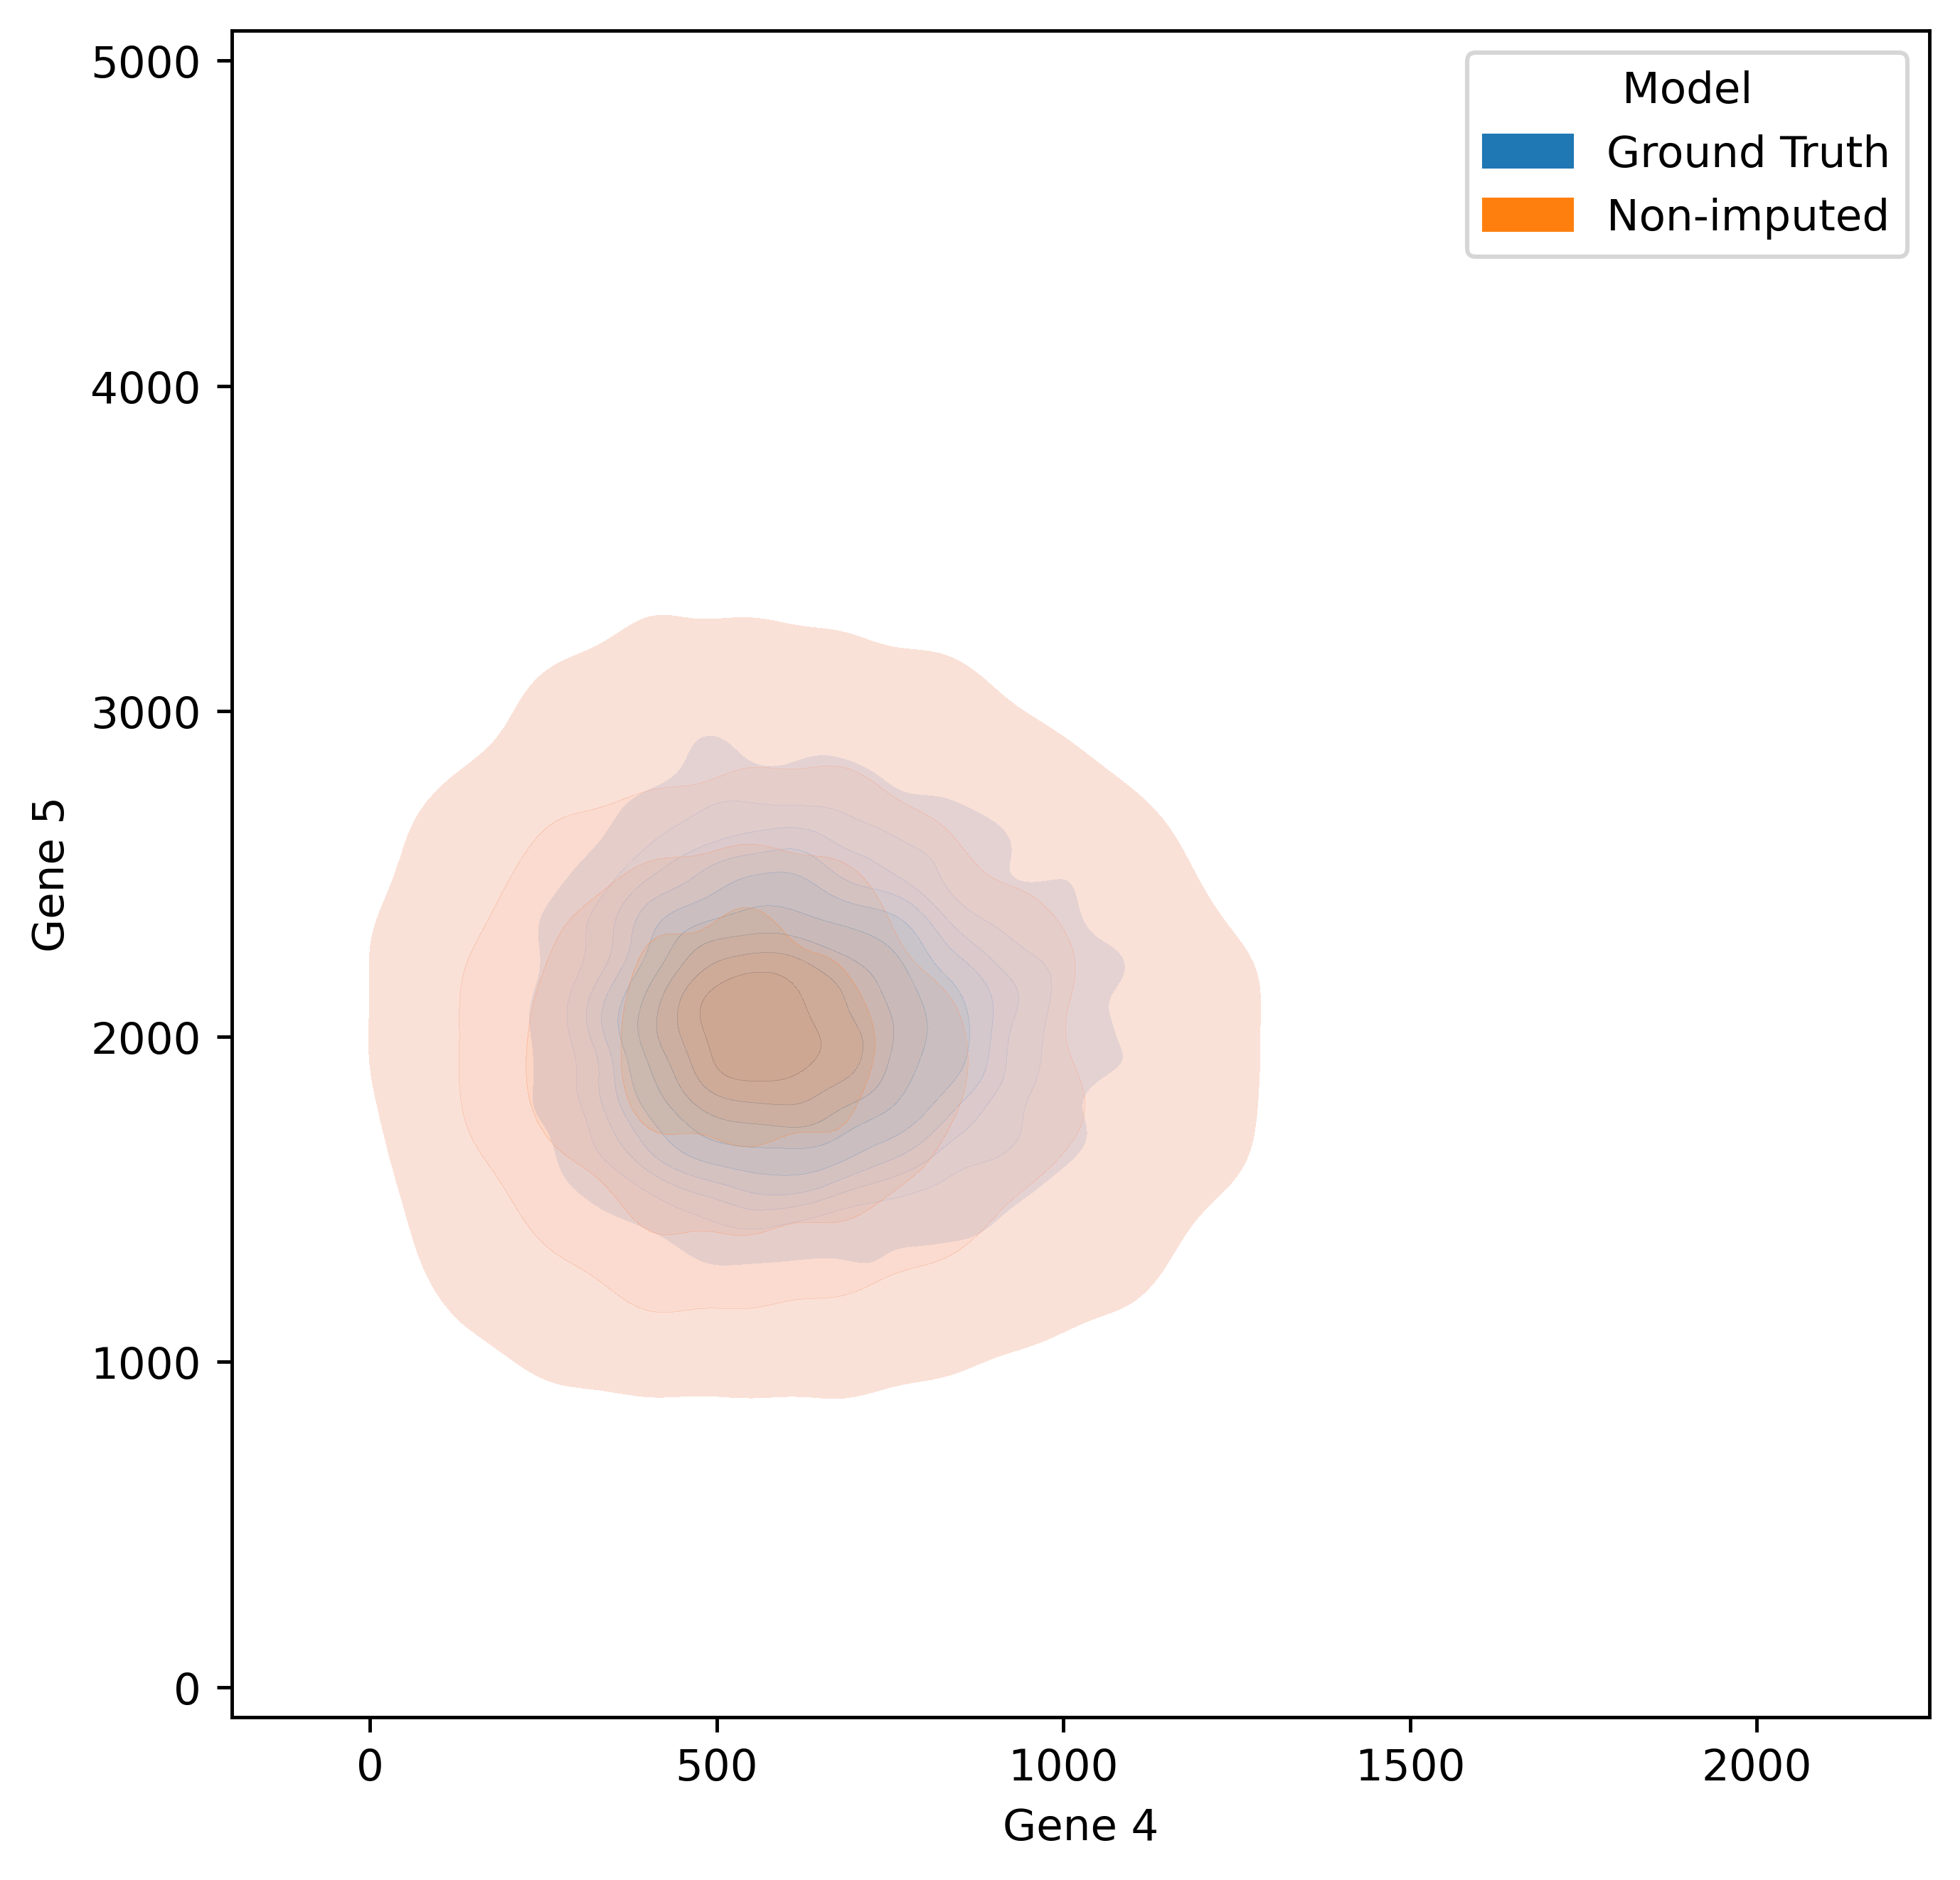

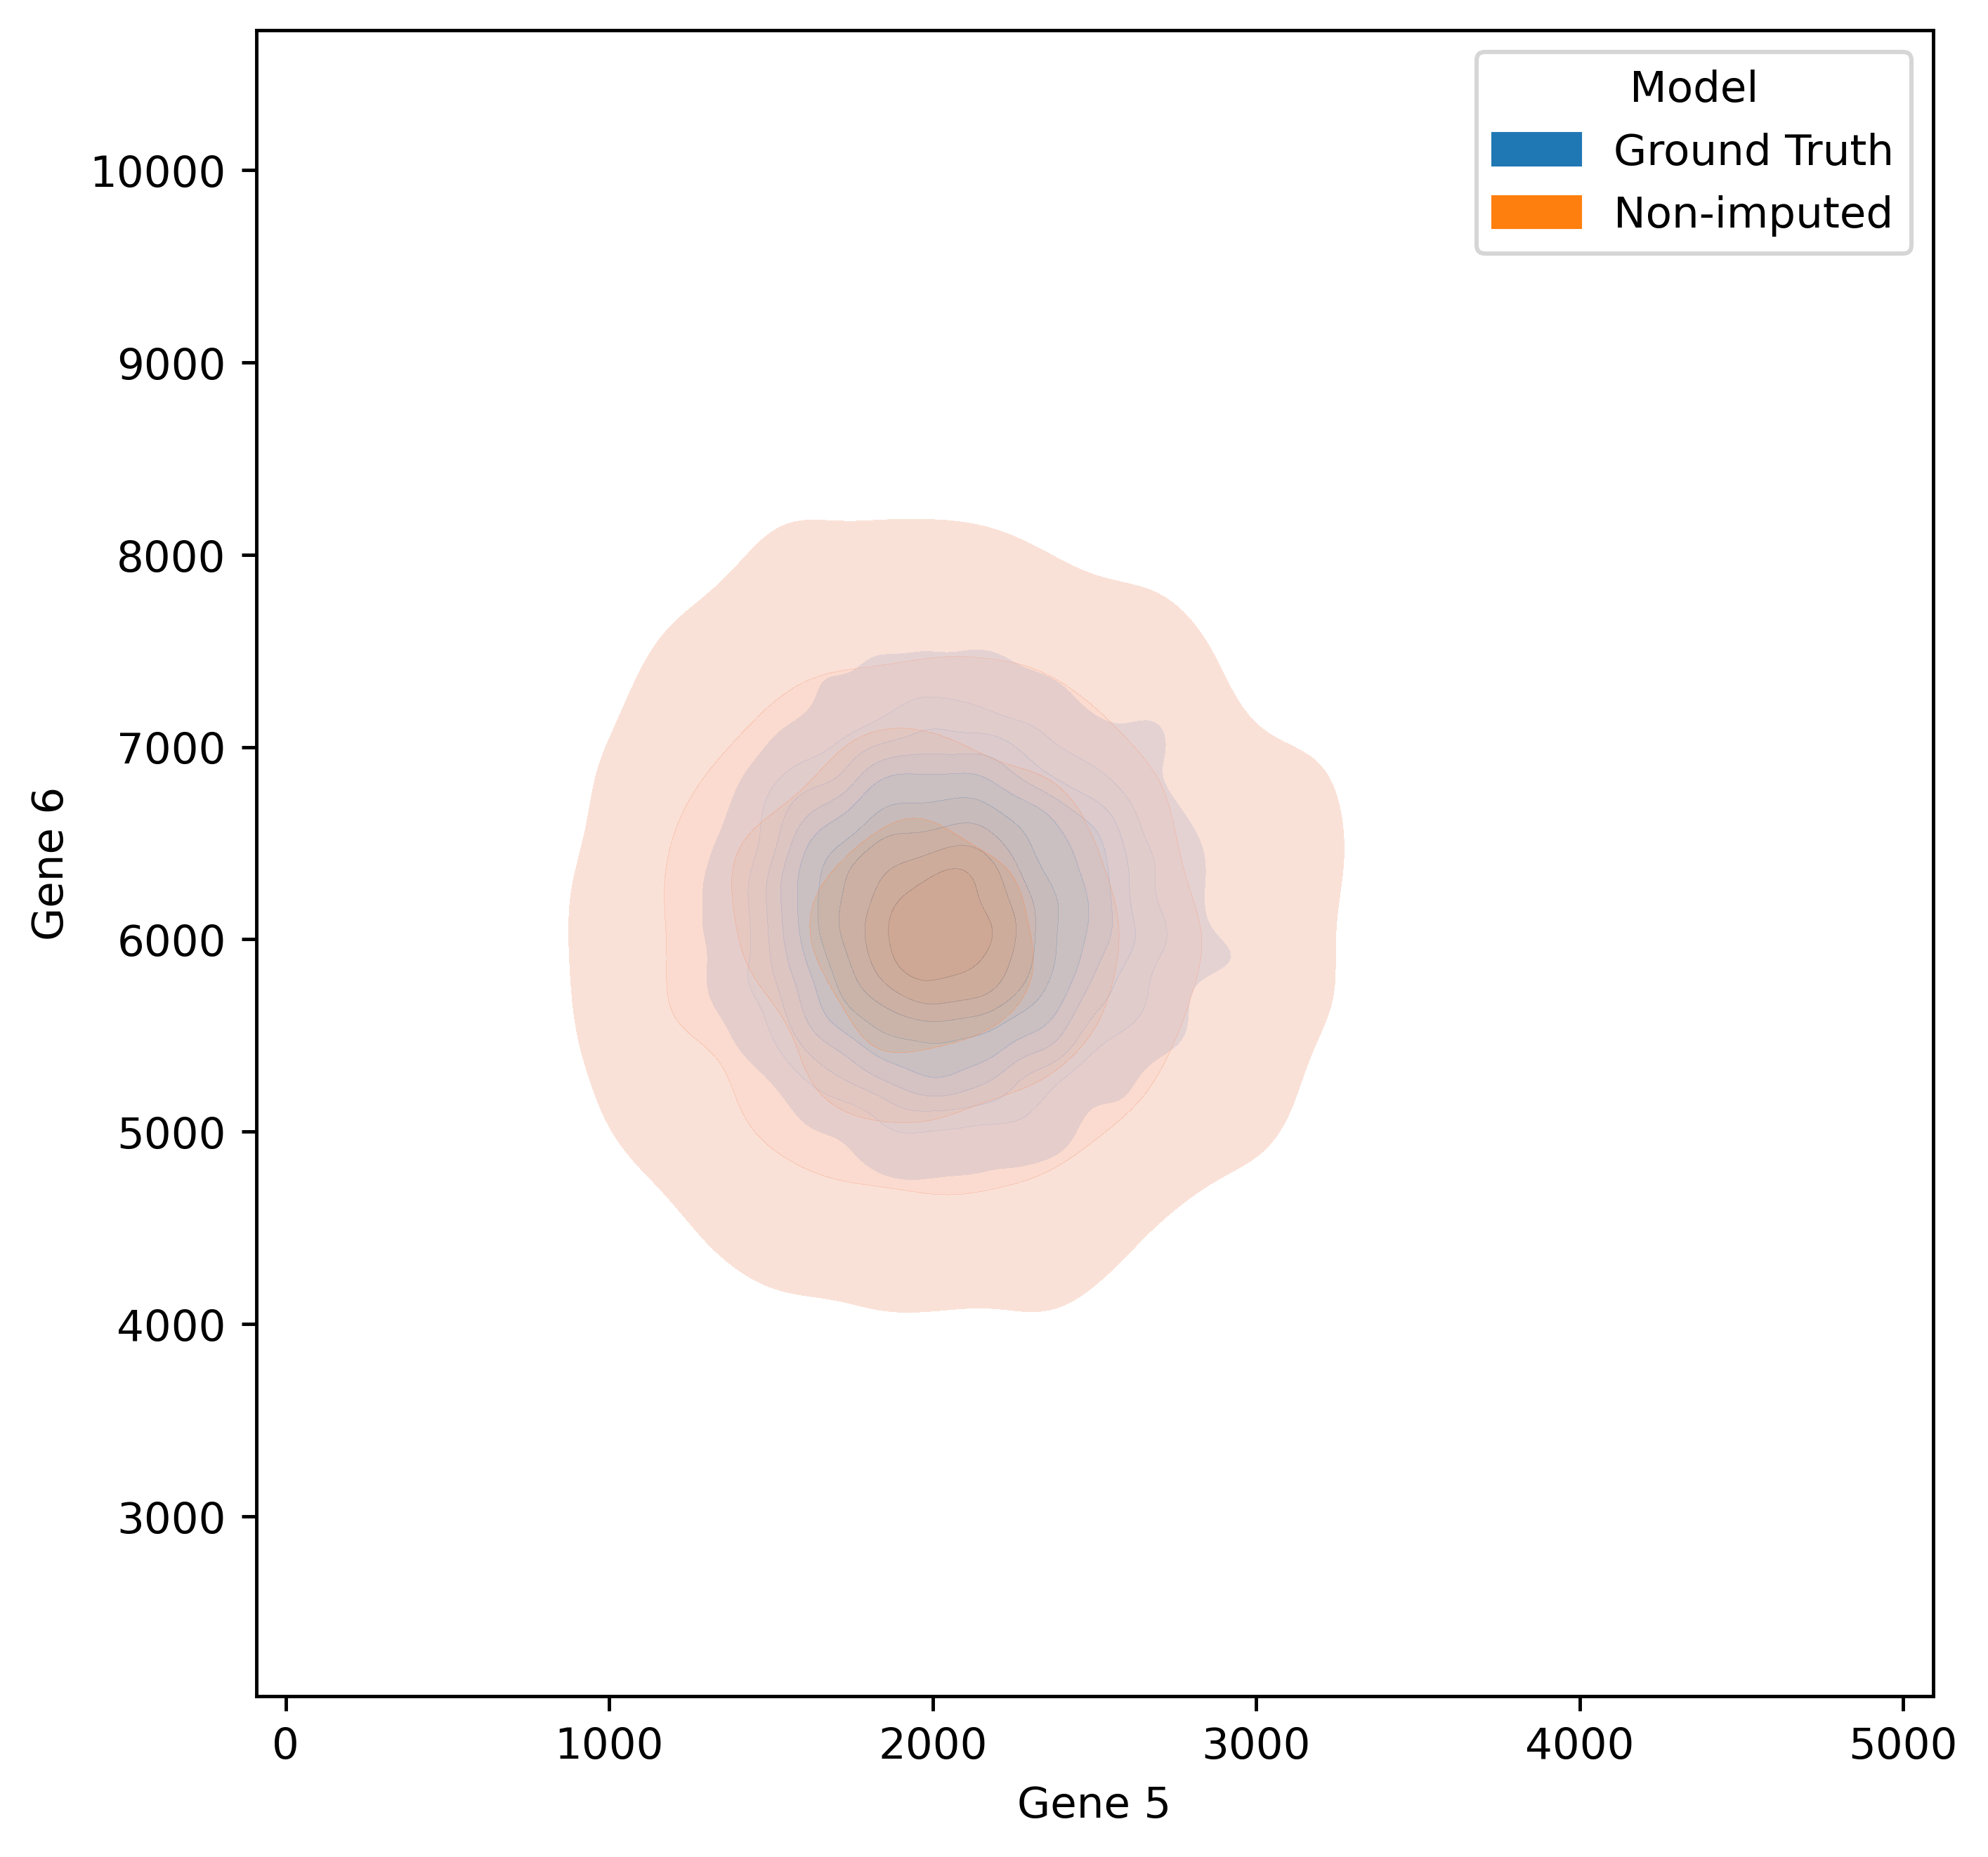

In [89]:
for i in range(5): 
    plt.figure()
    sns.kdeplot(data=before_imputation, x=genes[i], y =genes[i+1], hue="Model", alpha=0.4, fill=True)

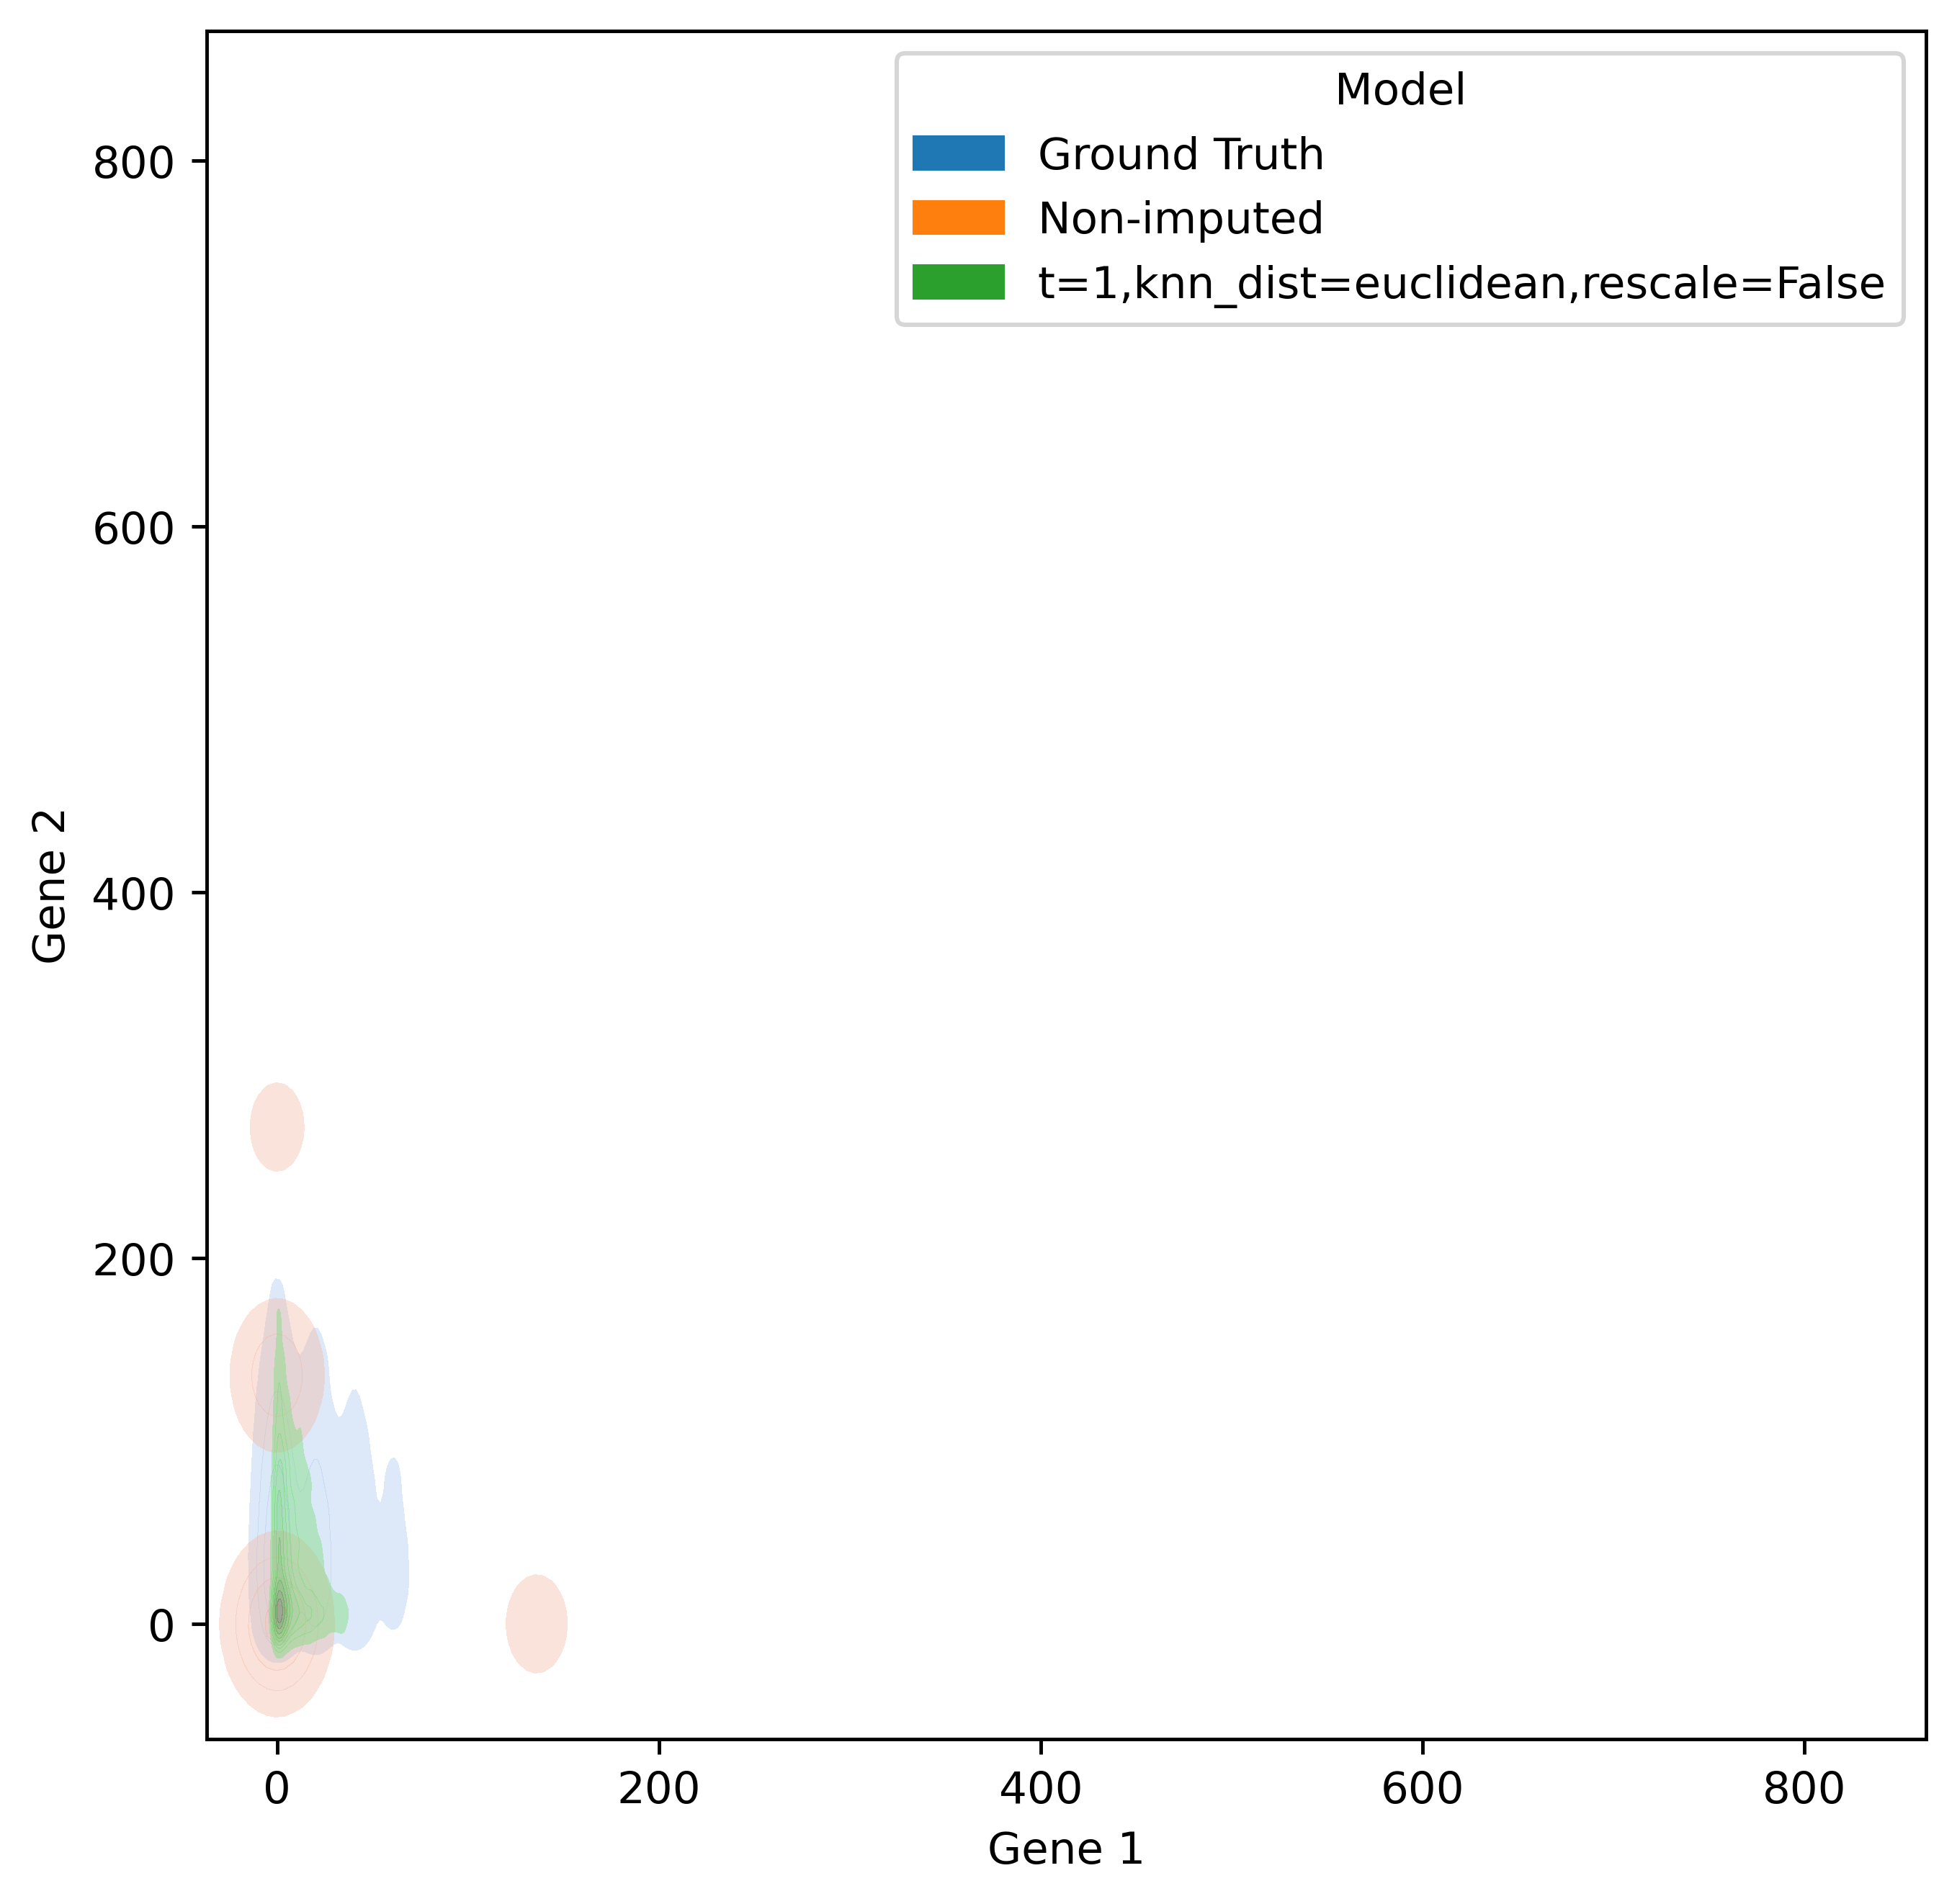

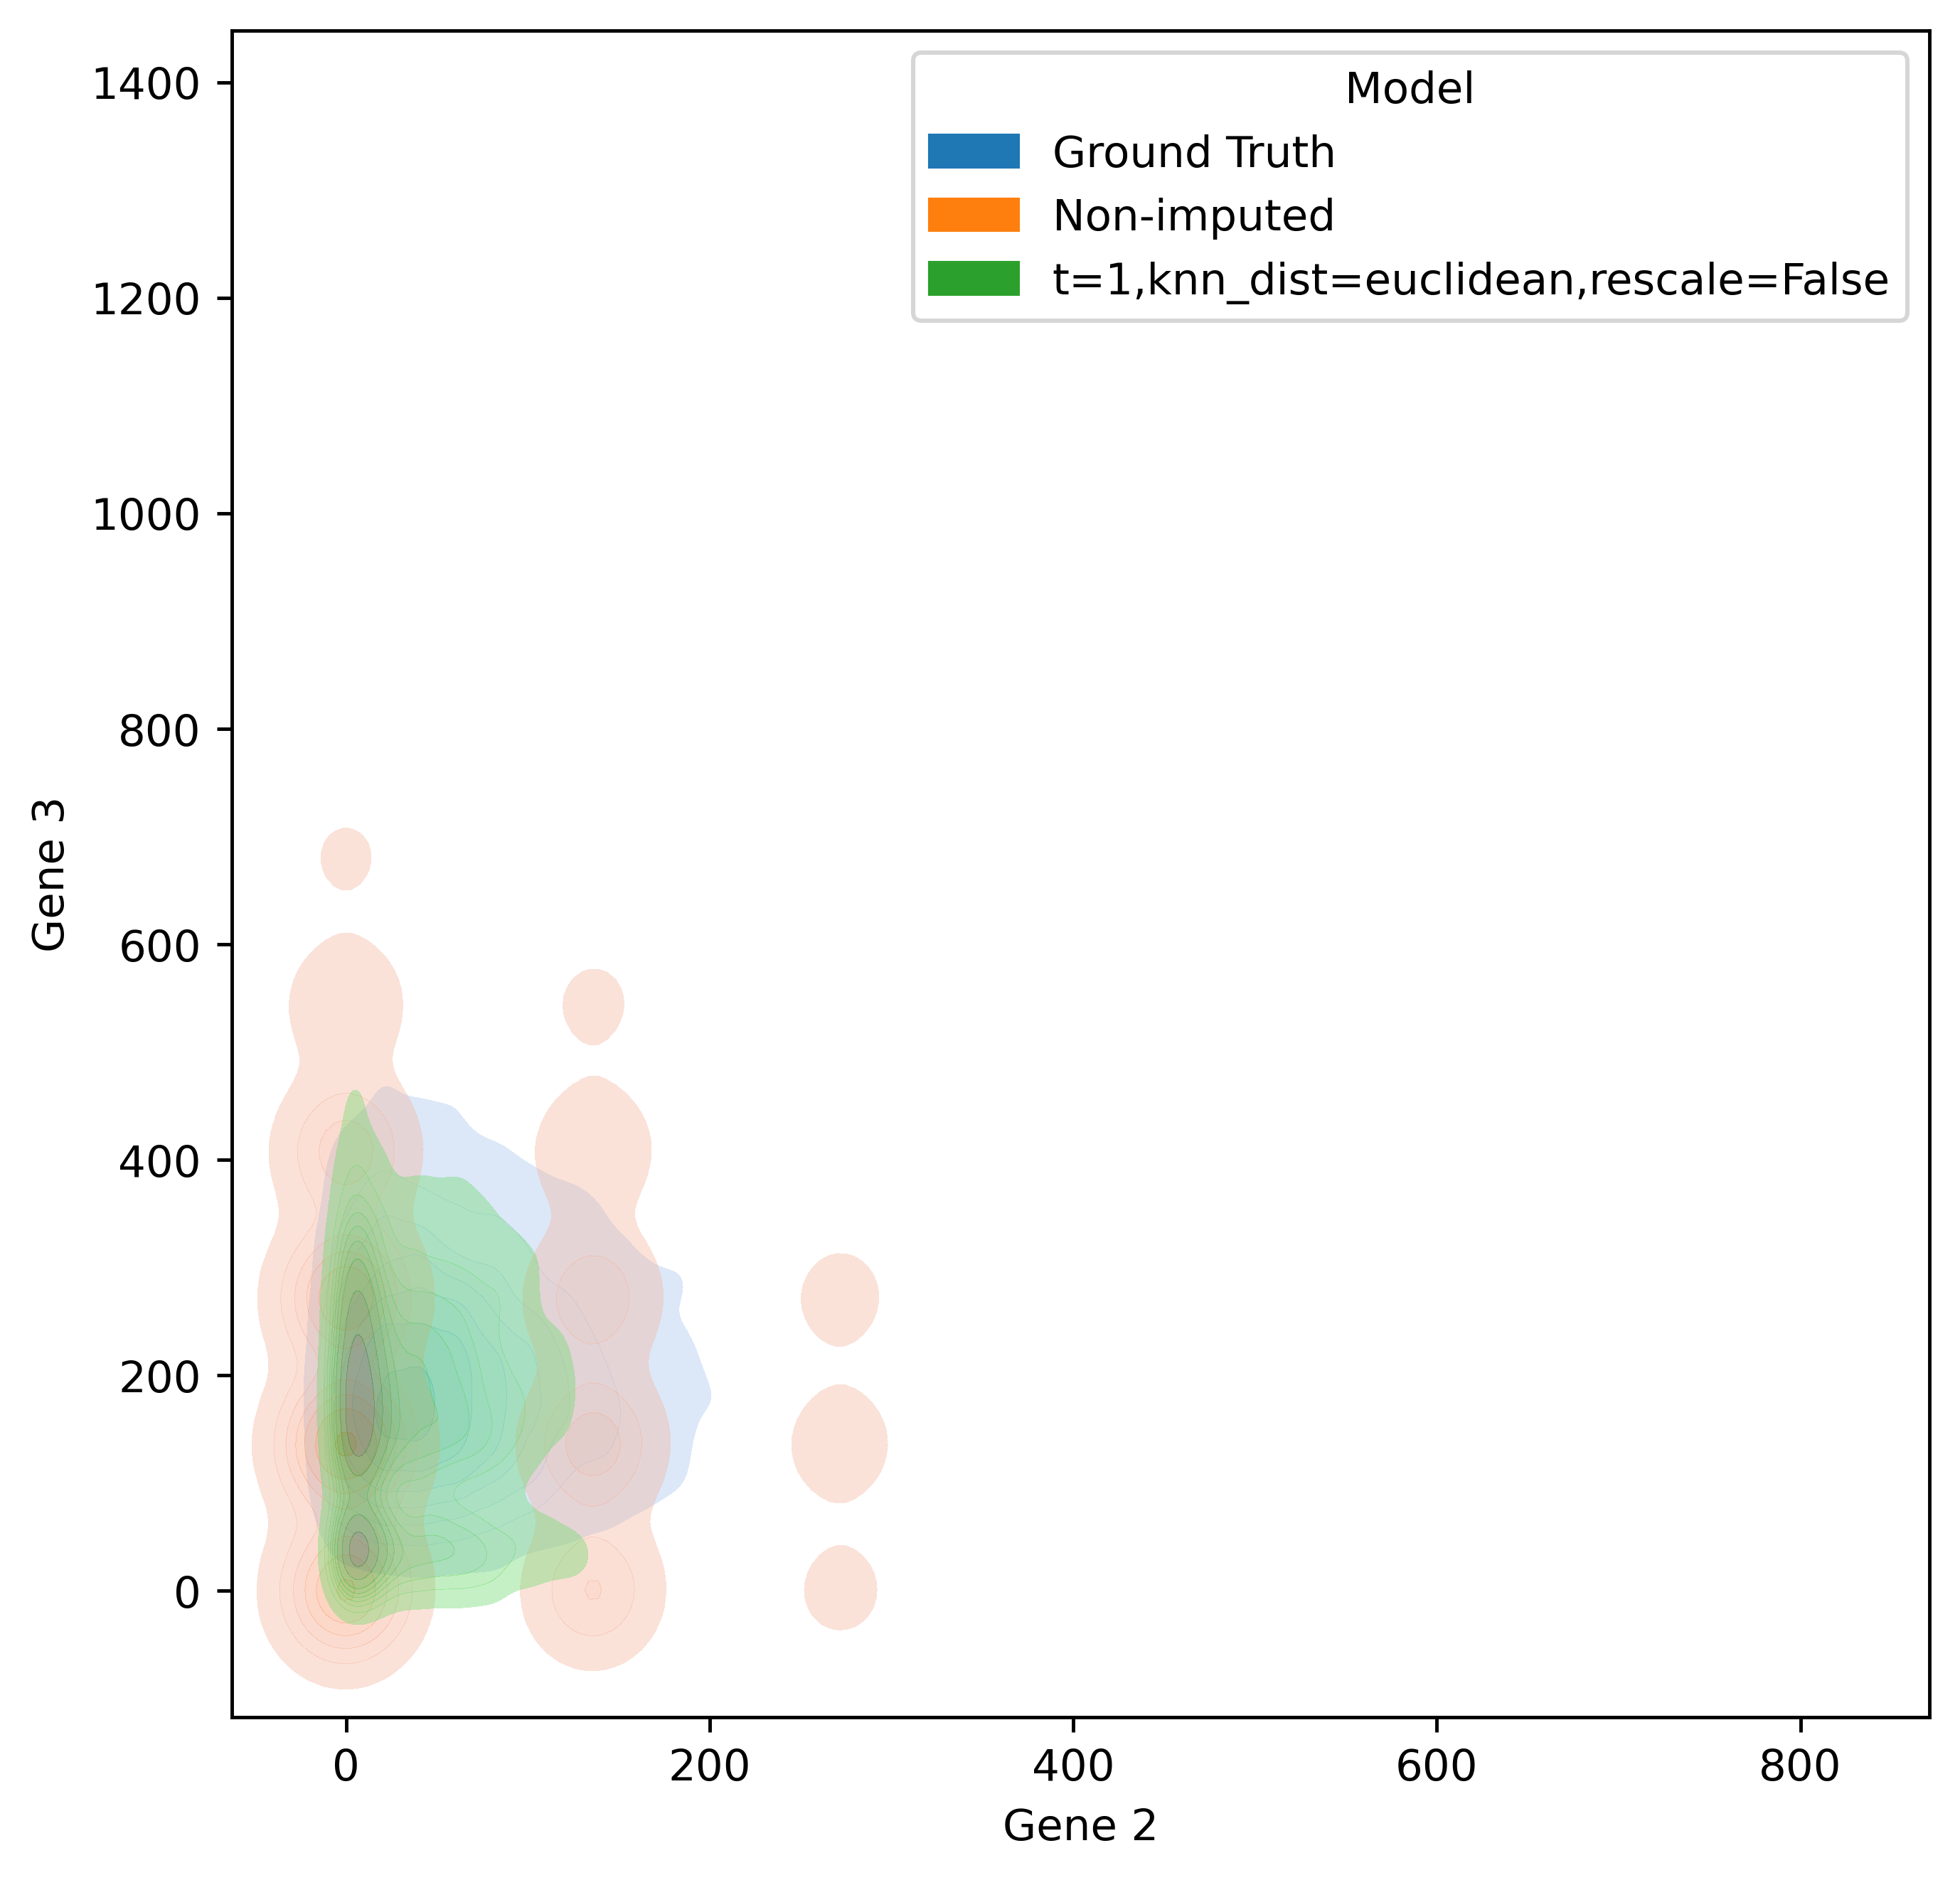

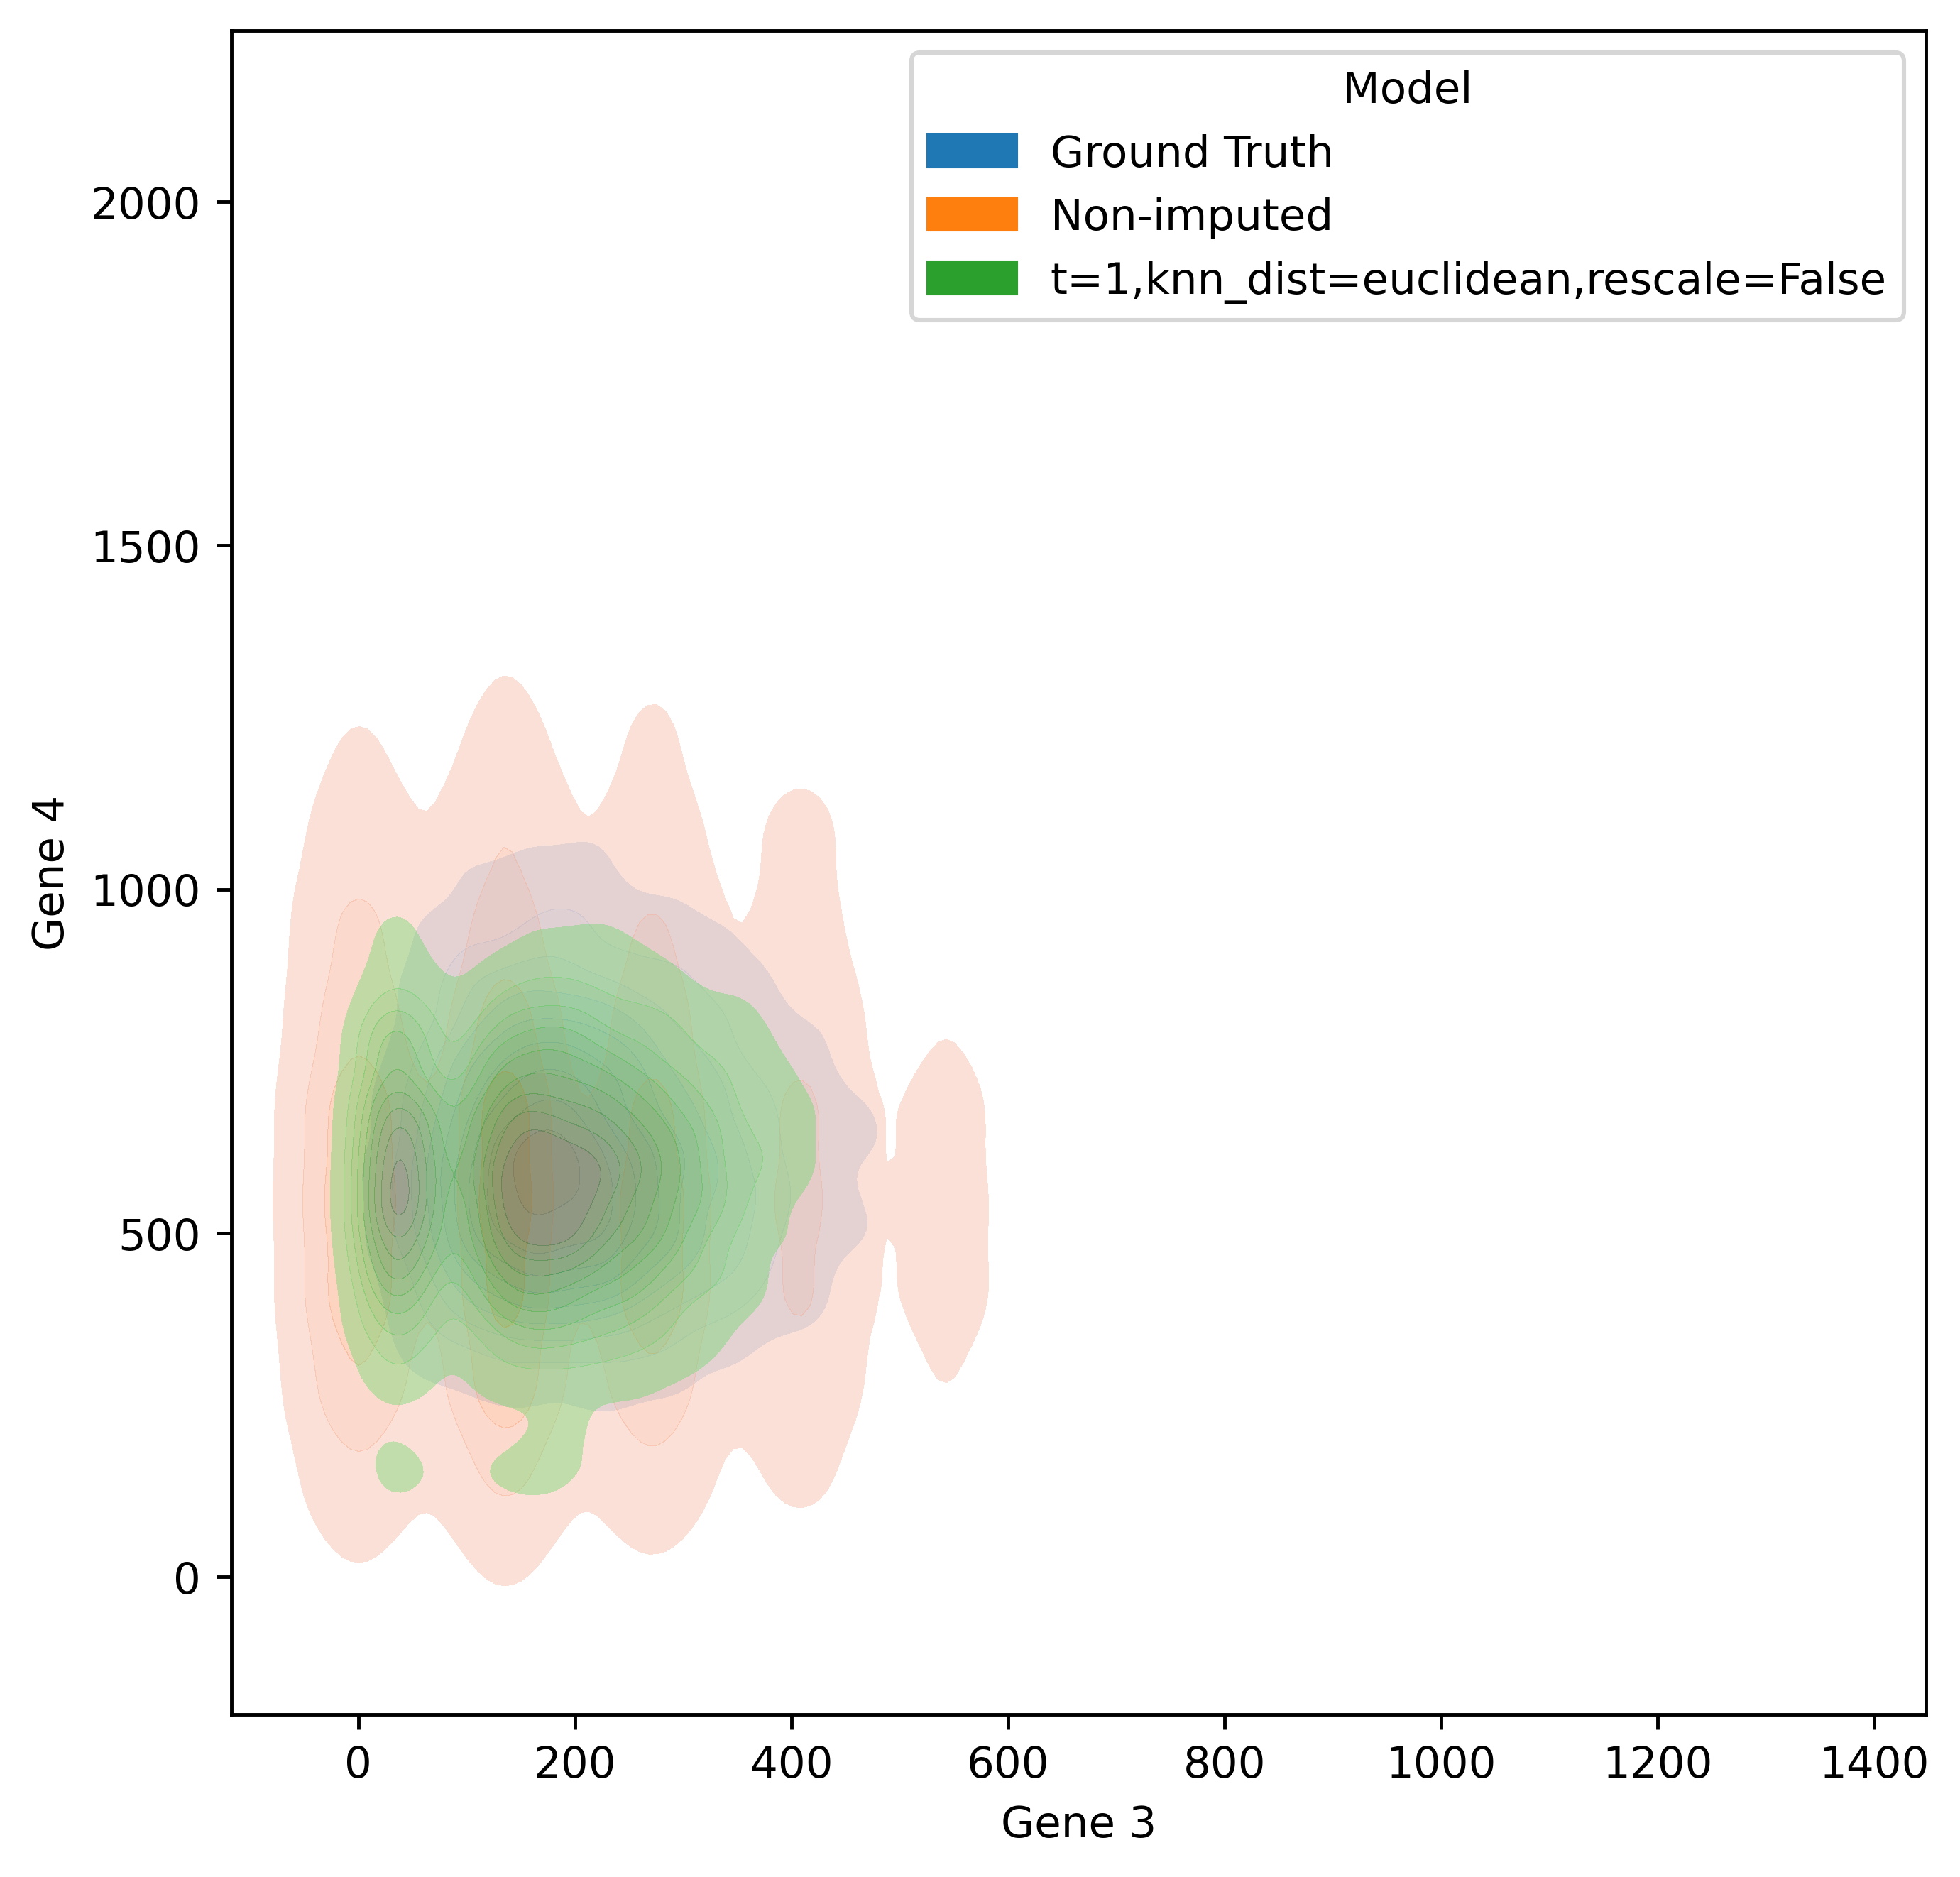

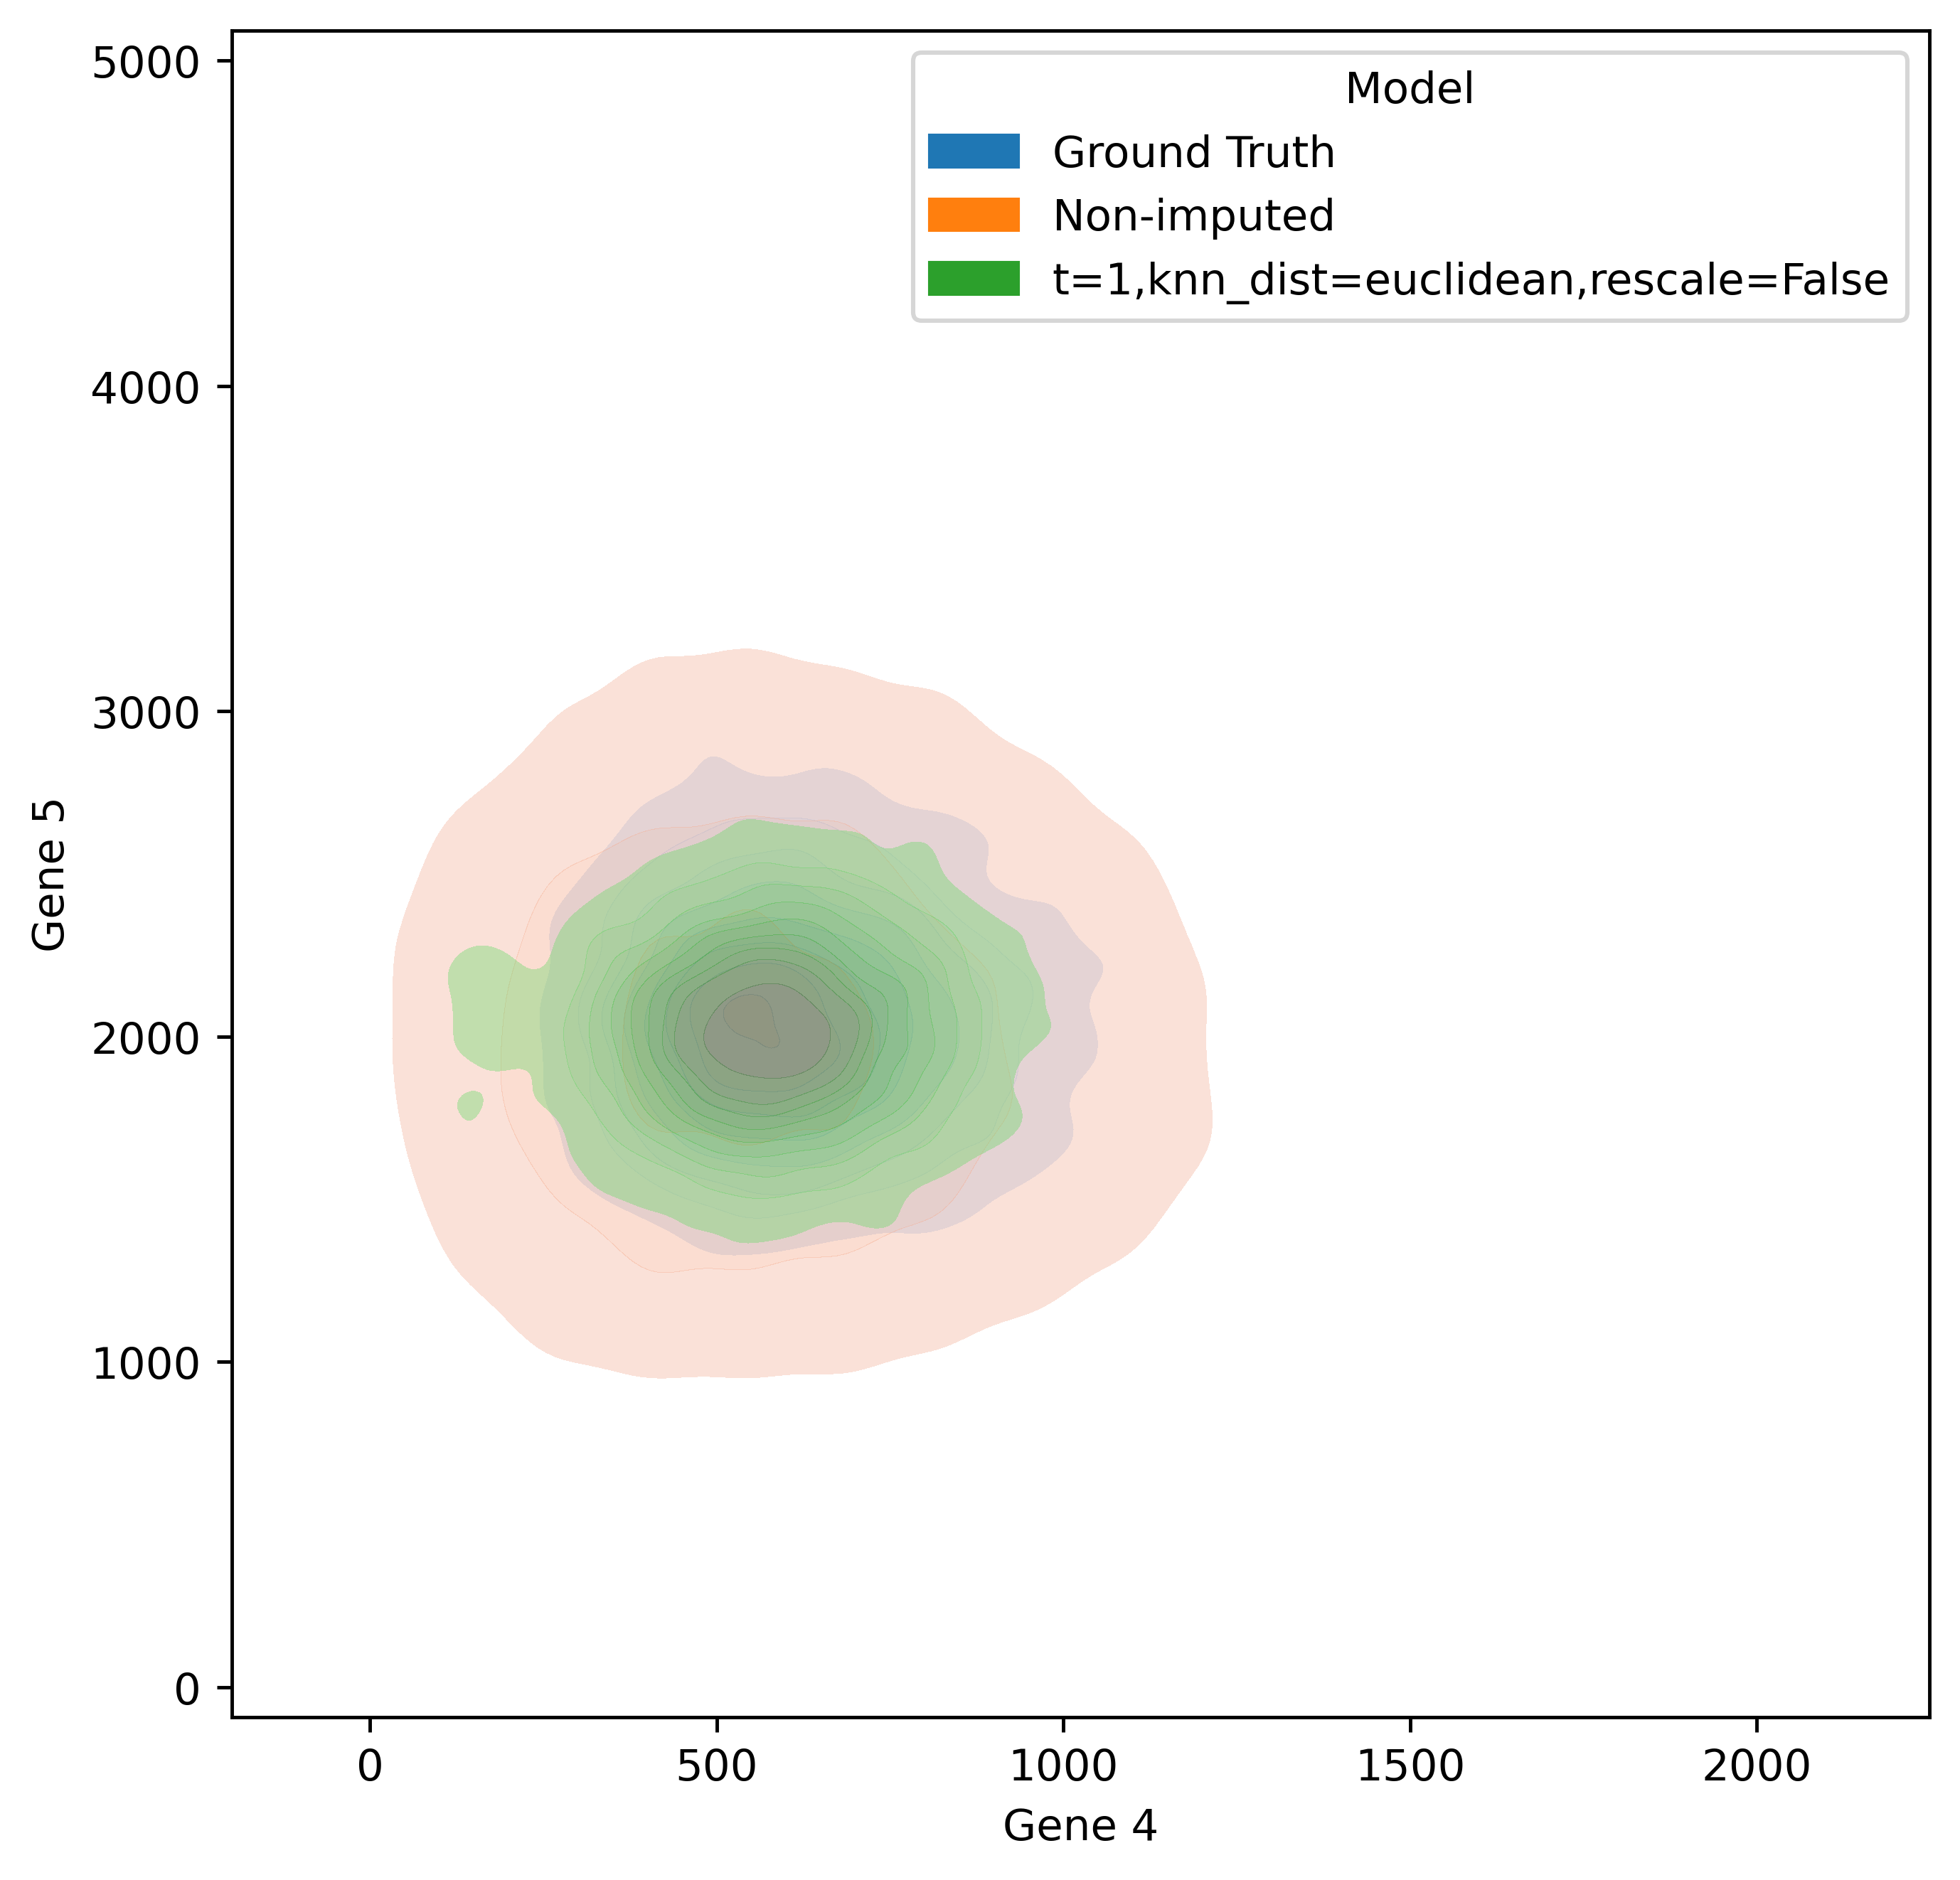

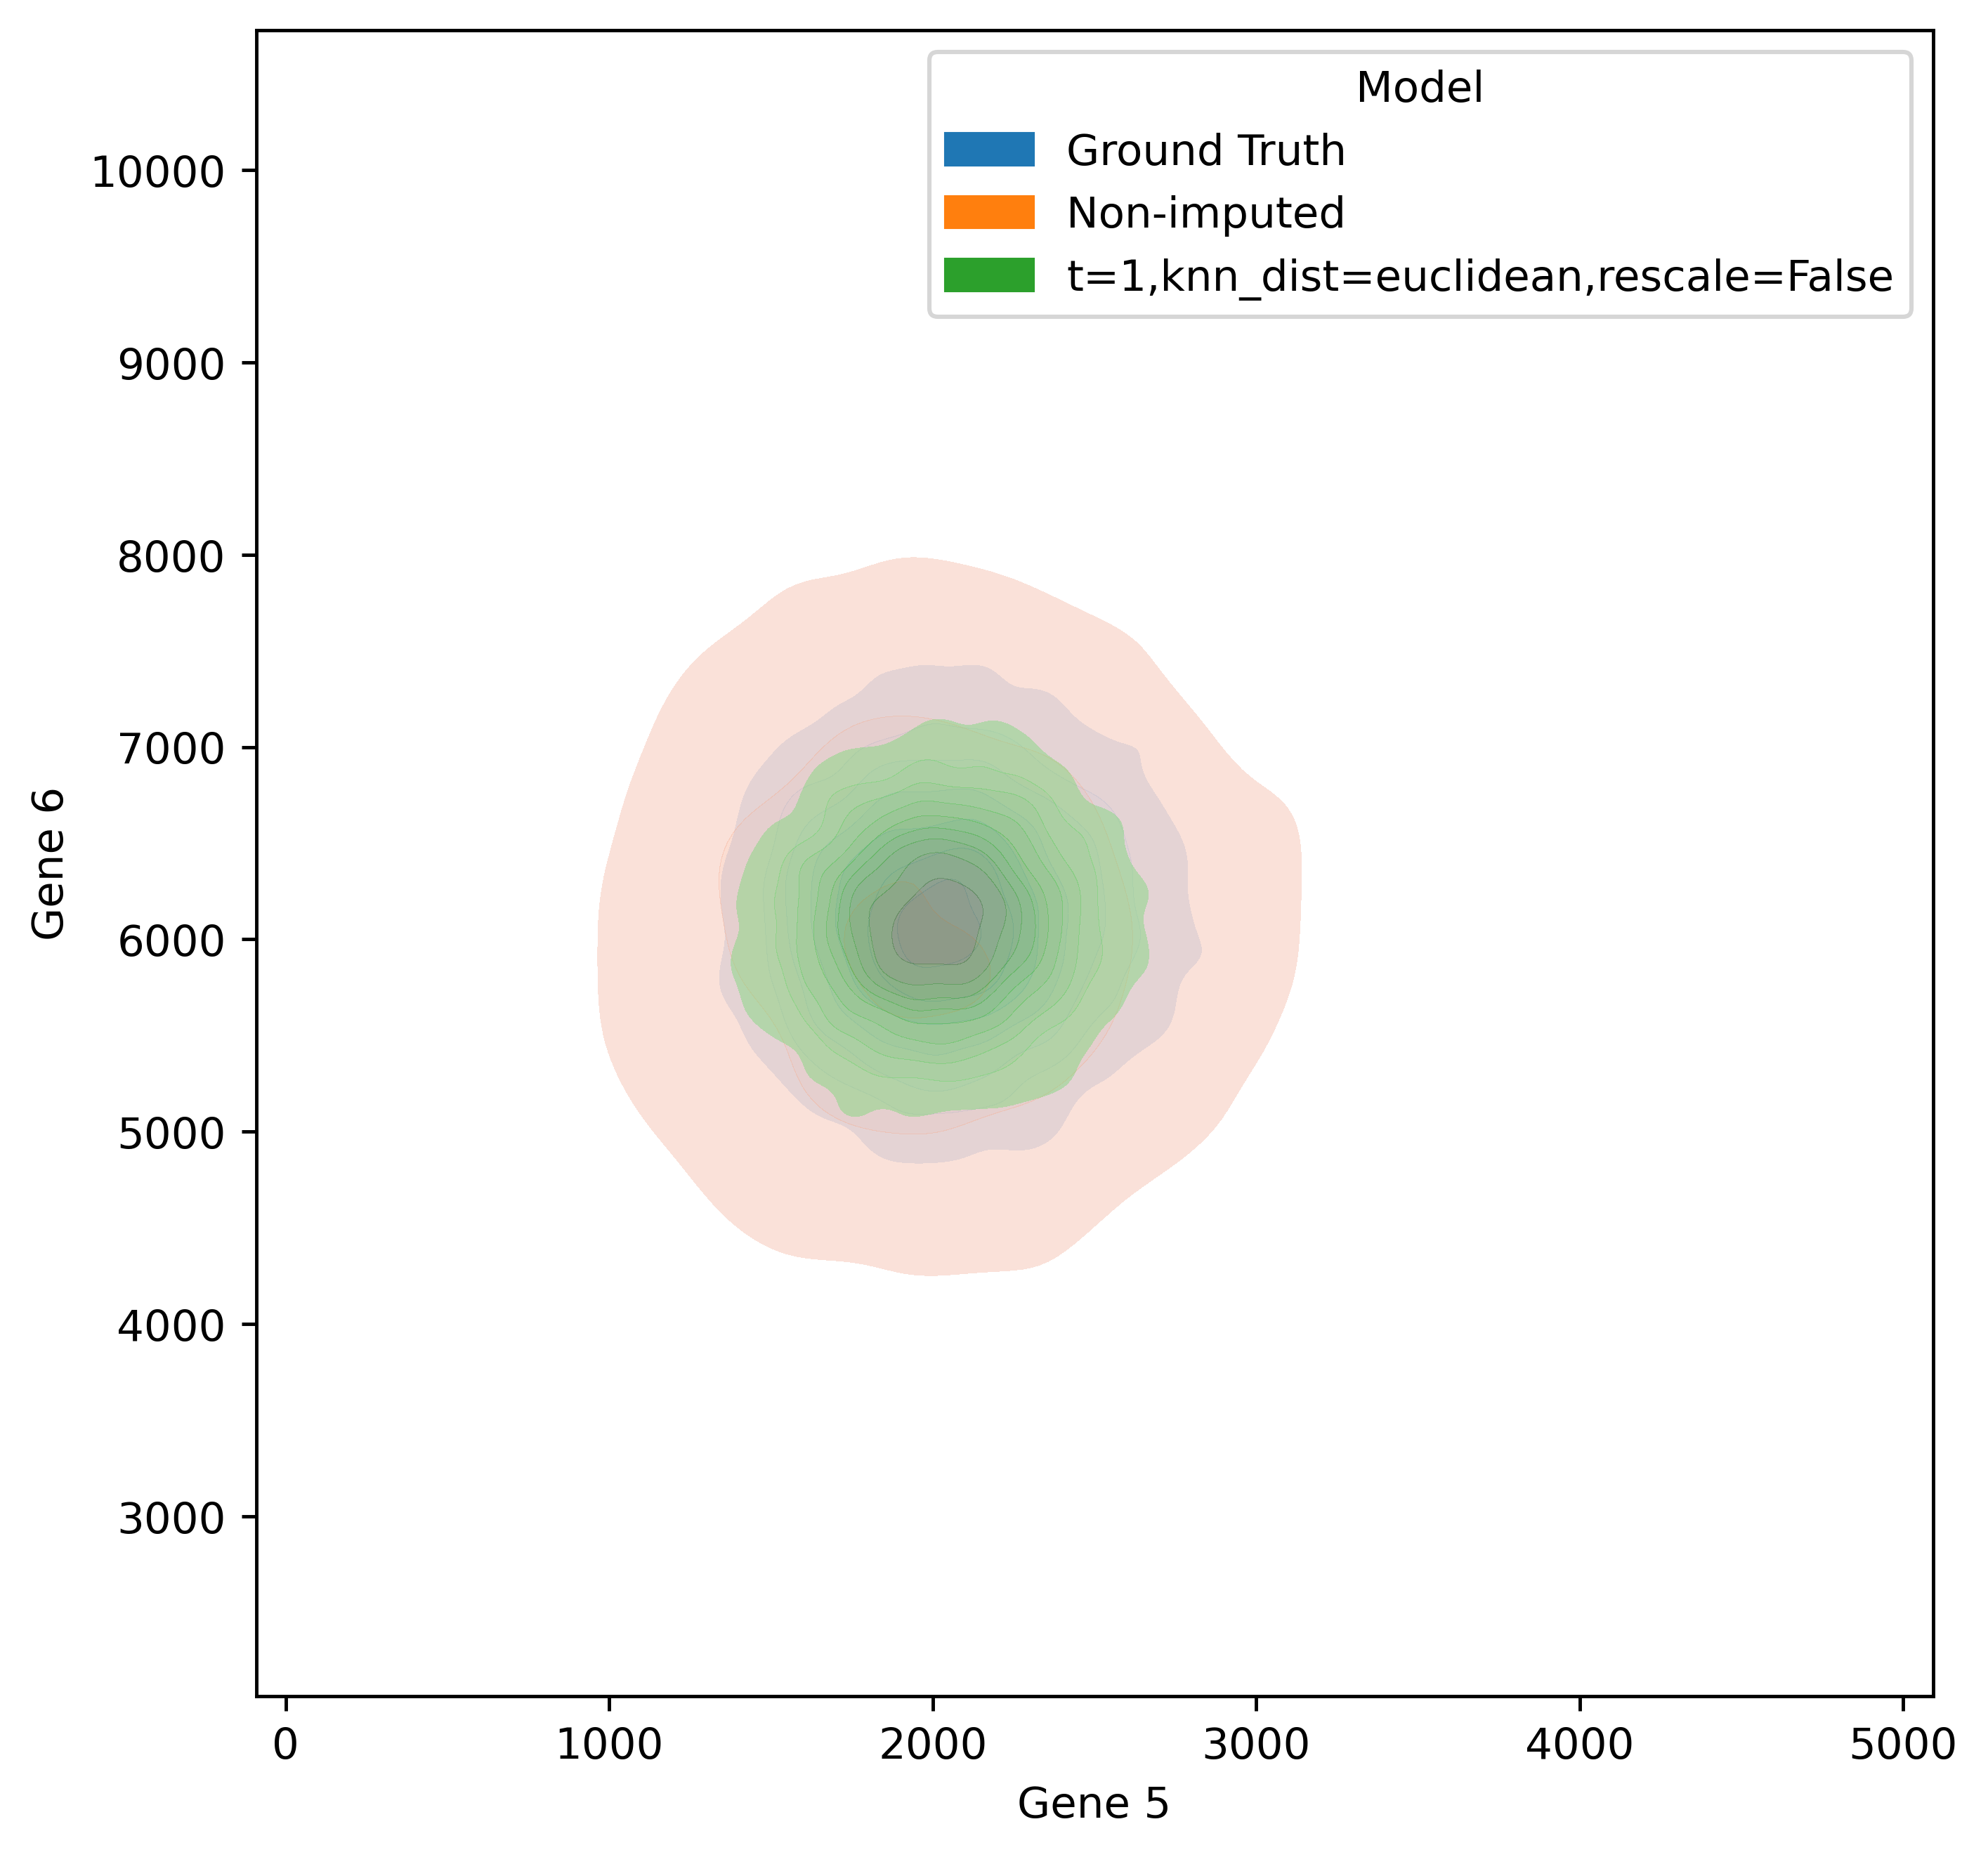

In [90]:
for i in range(5): 
    plt.figure()
    sns.kdeplot(data=best_imputation, x=genes[i], y =genes[i+1], hue="Model", alpha=0.4, fill=True)

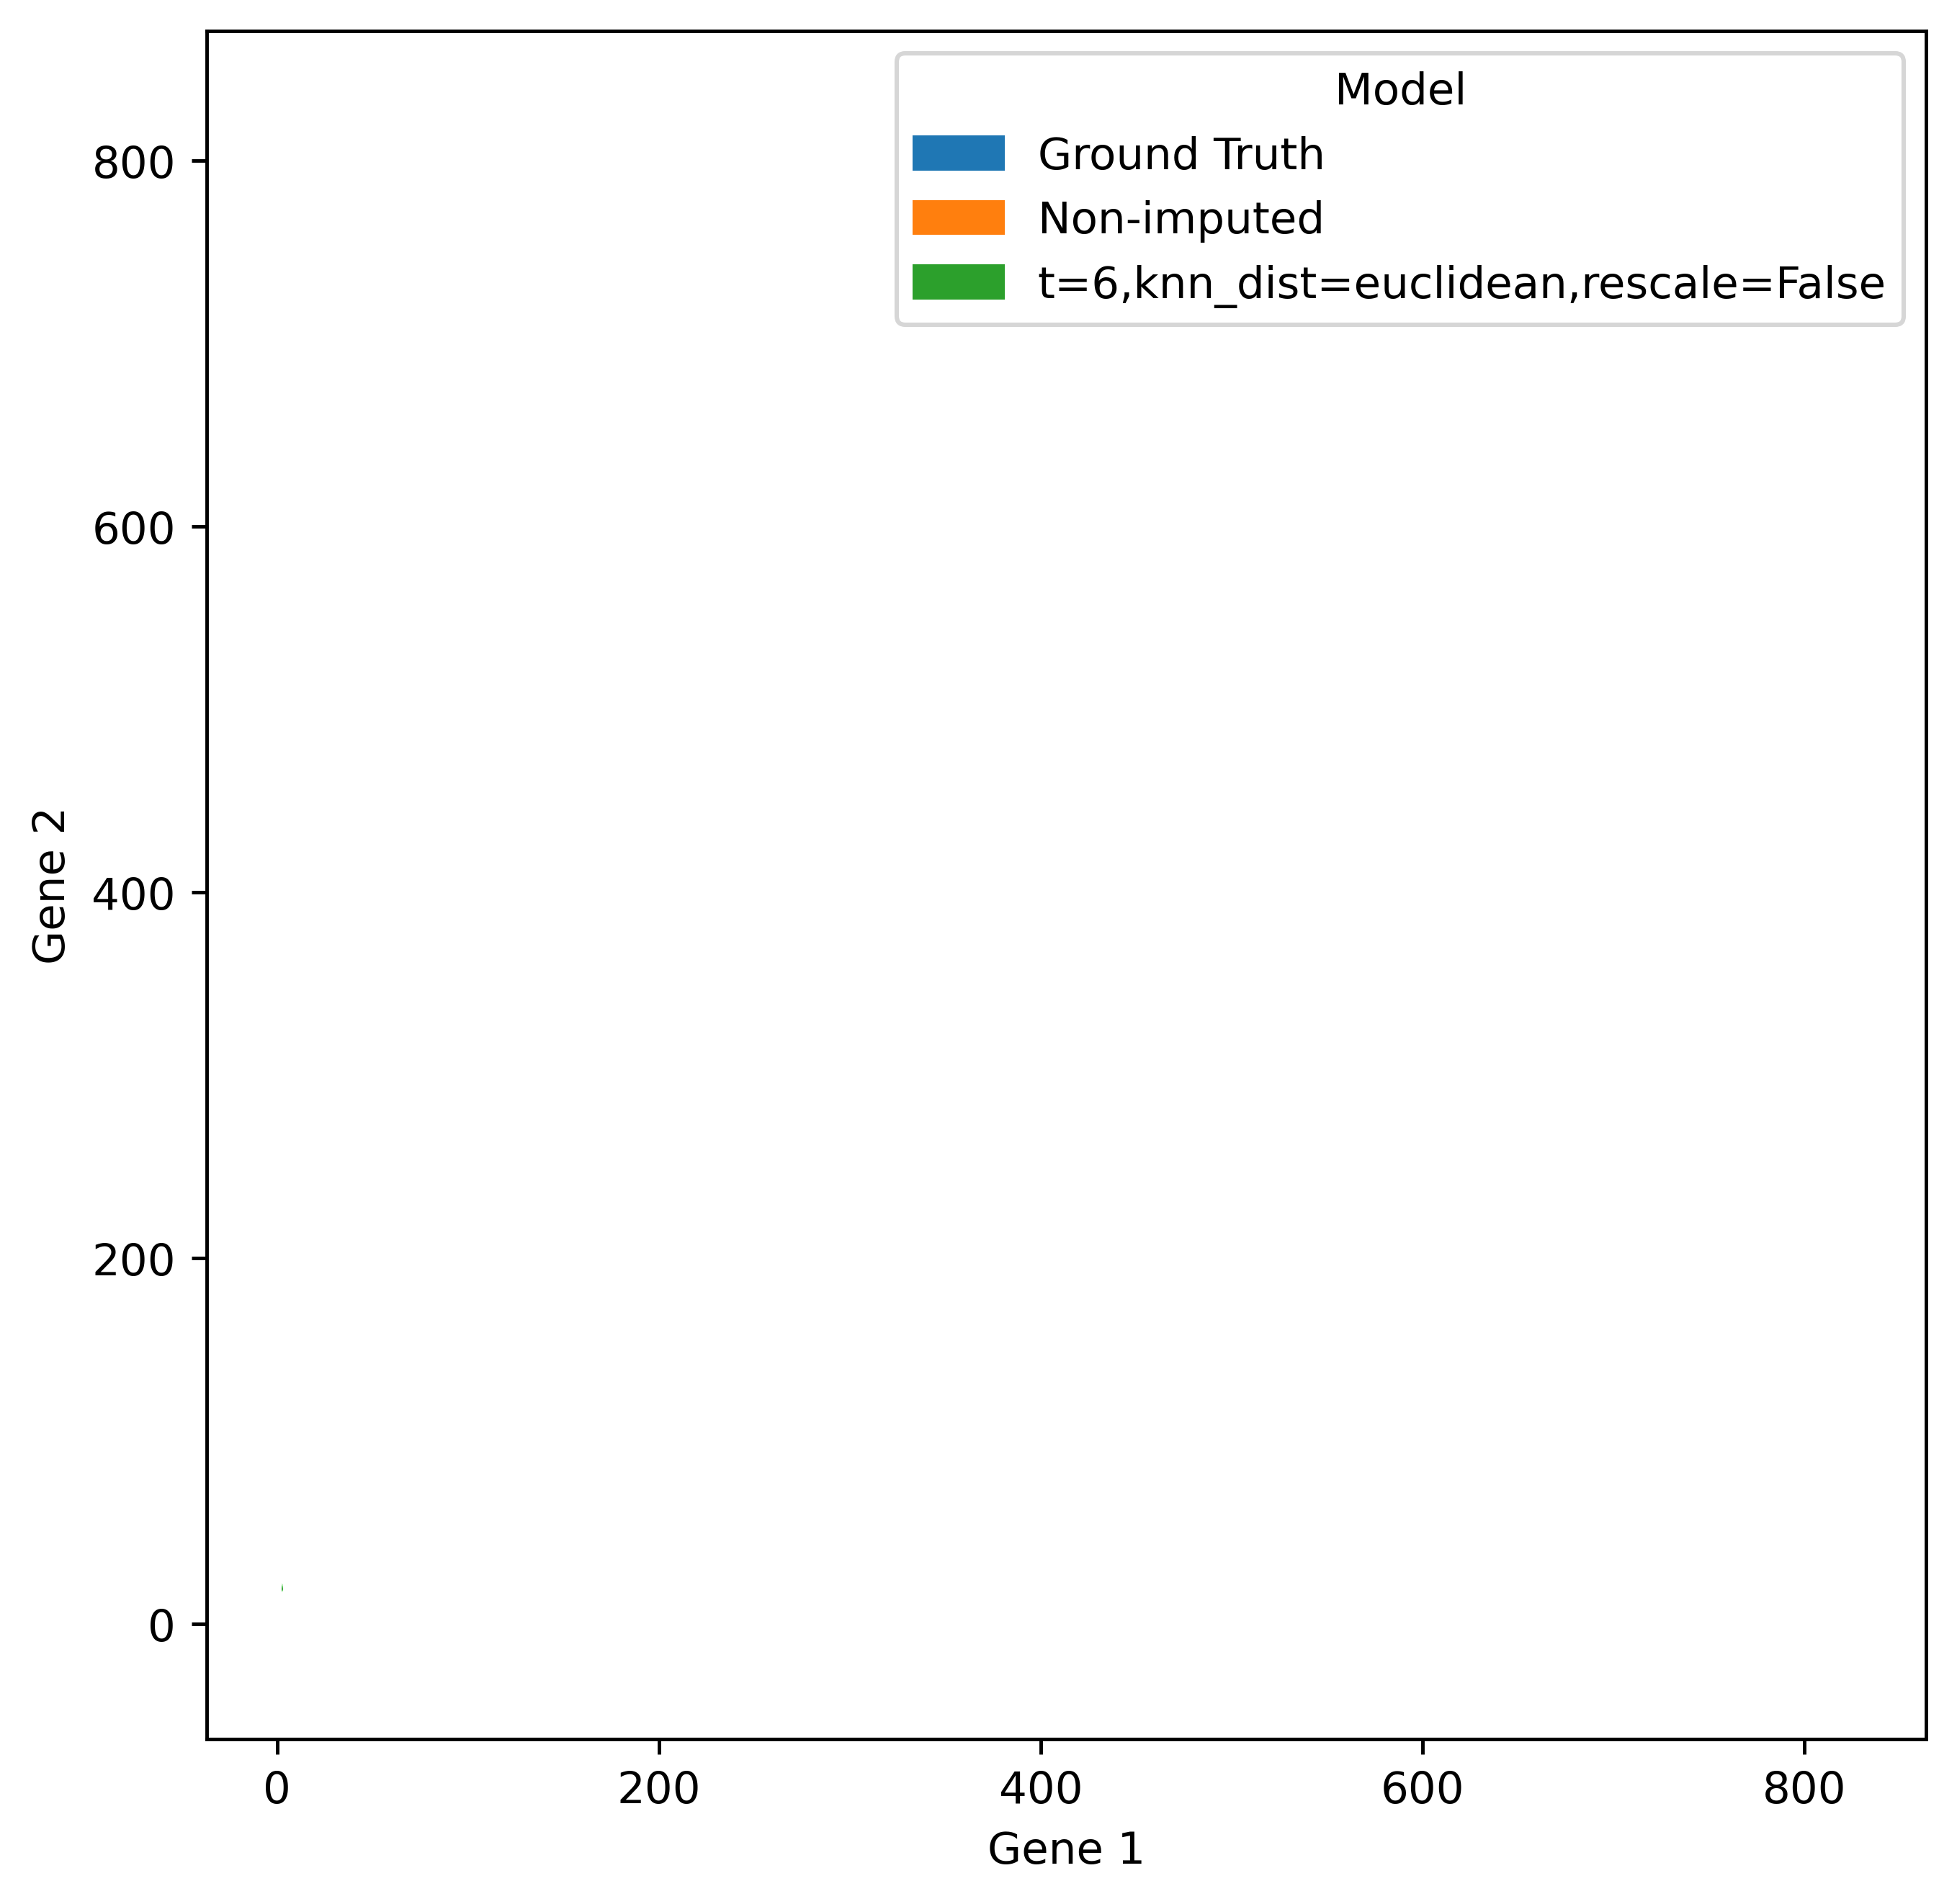

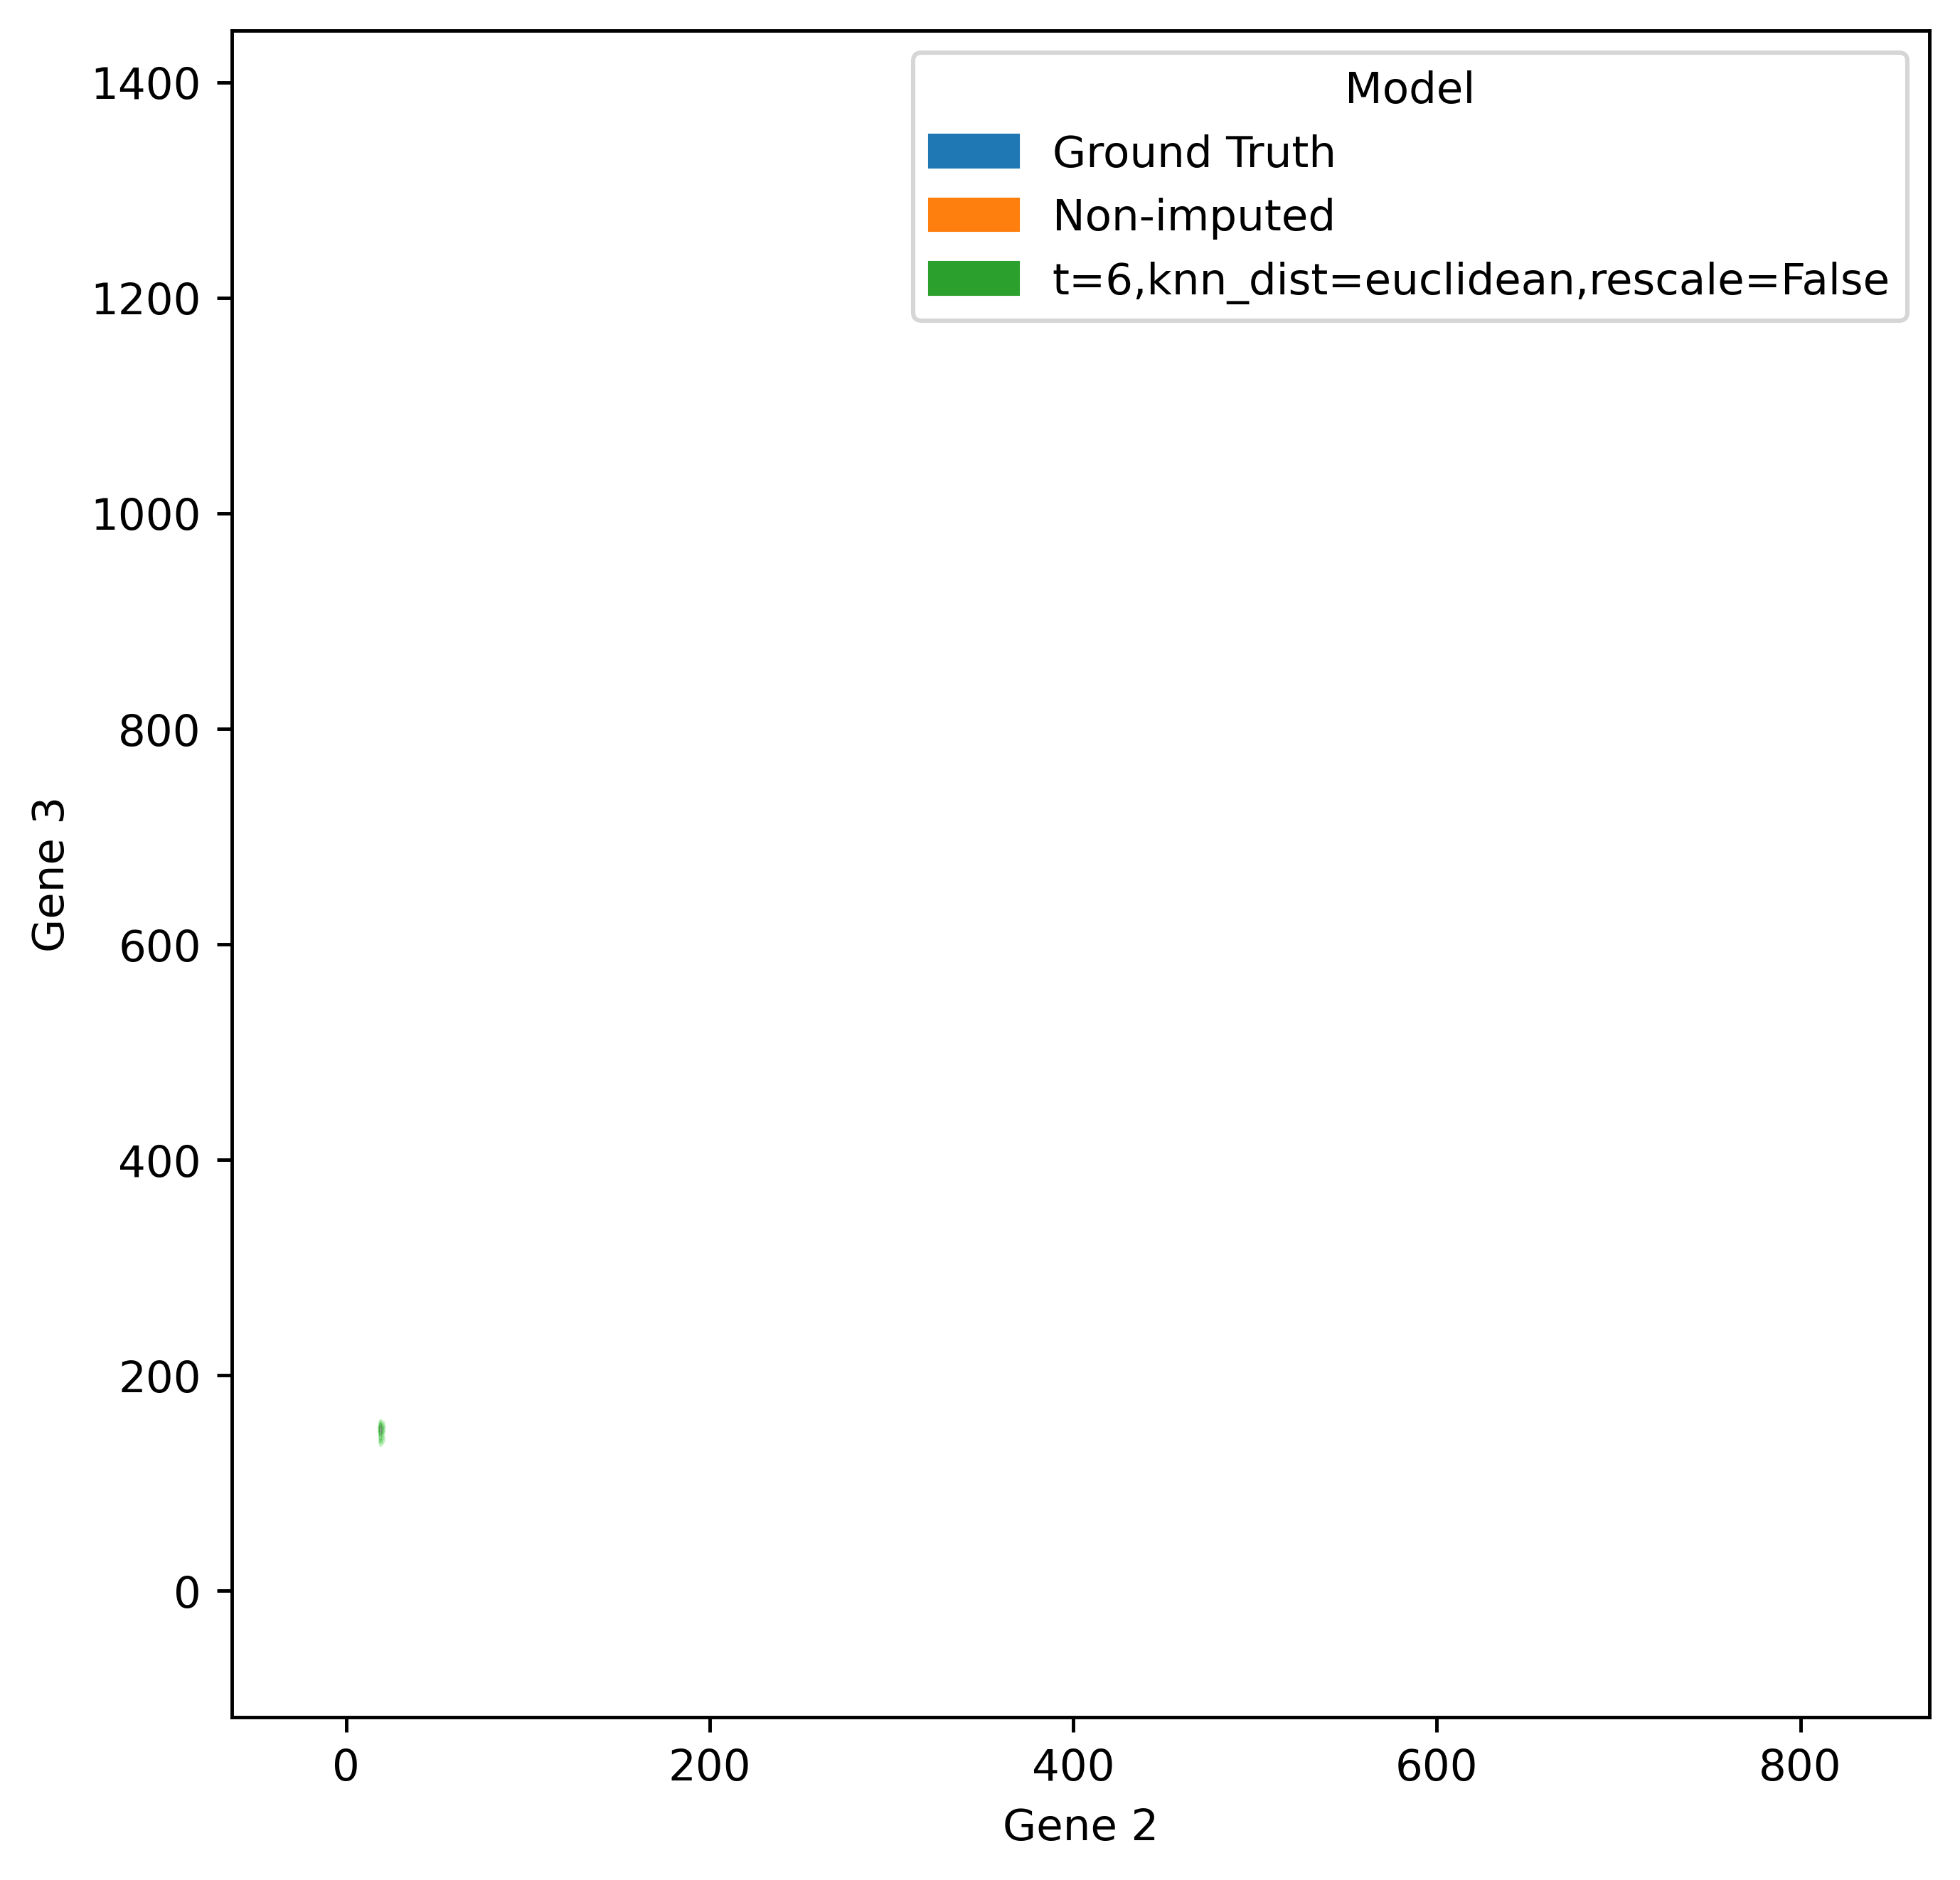

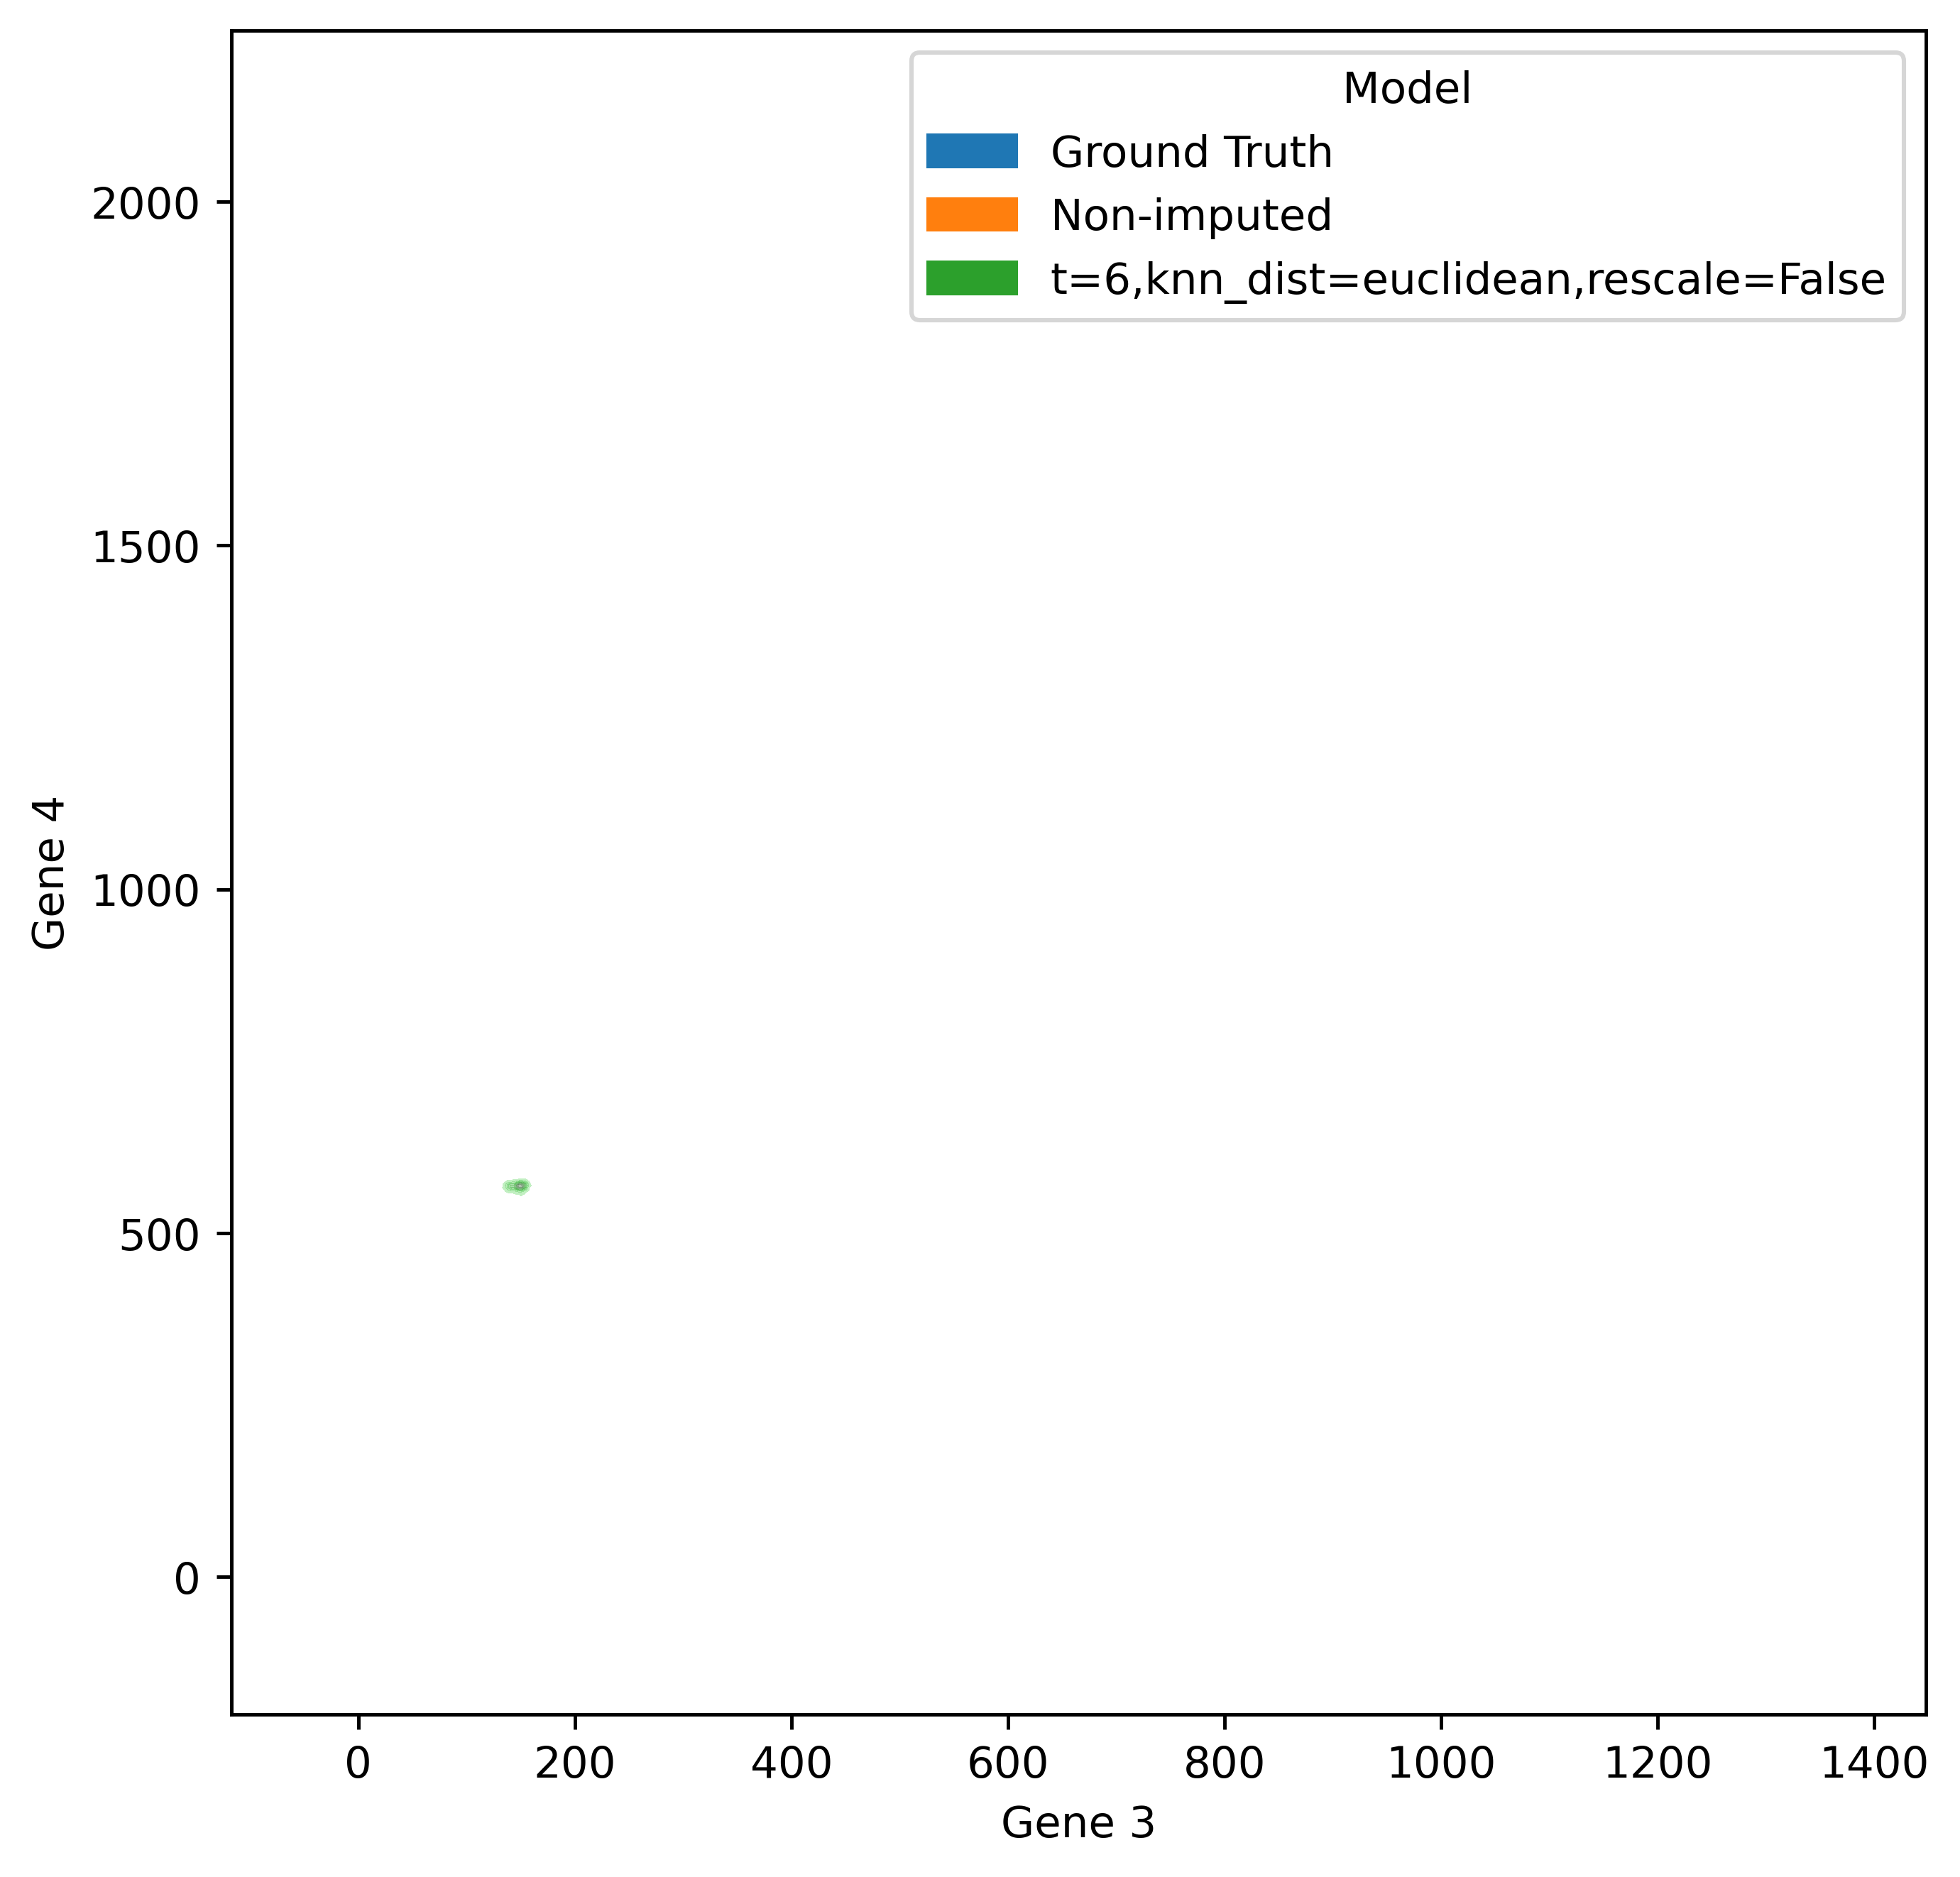

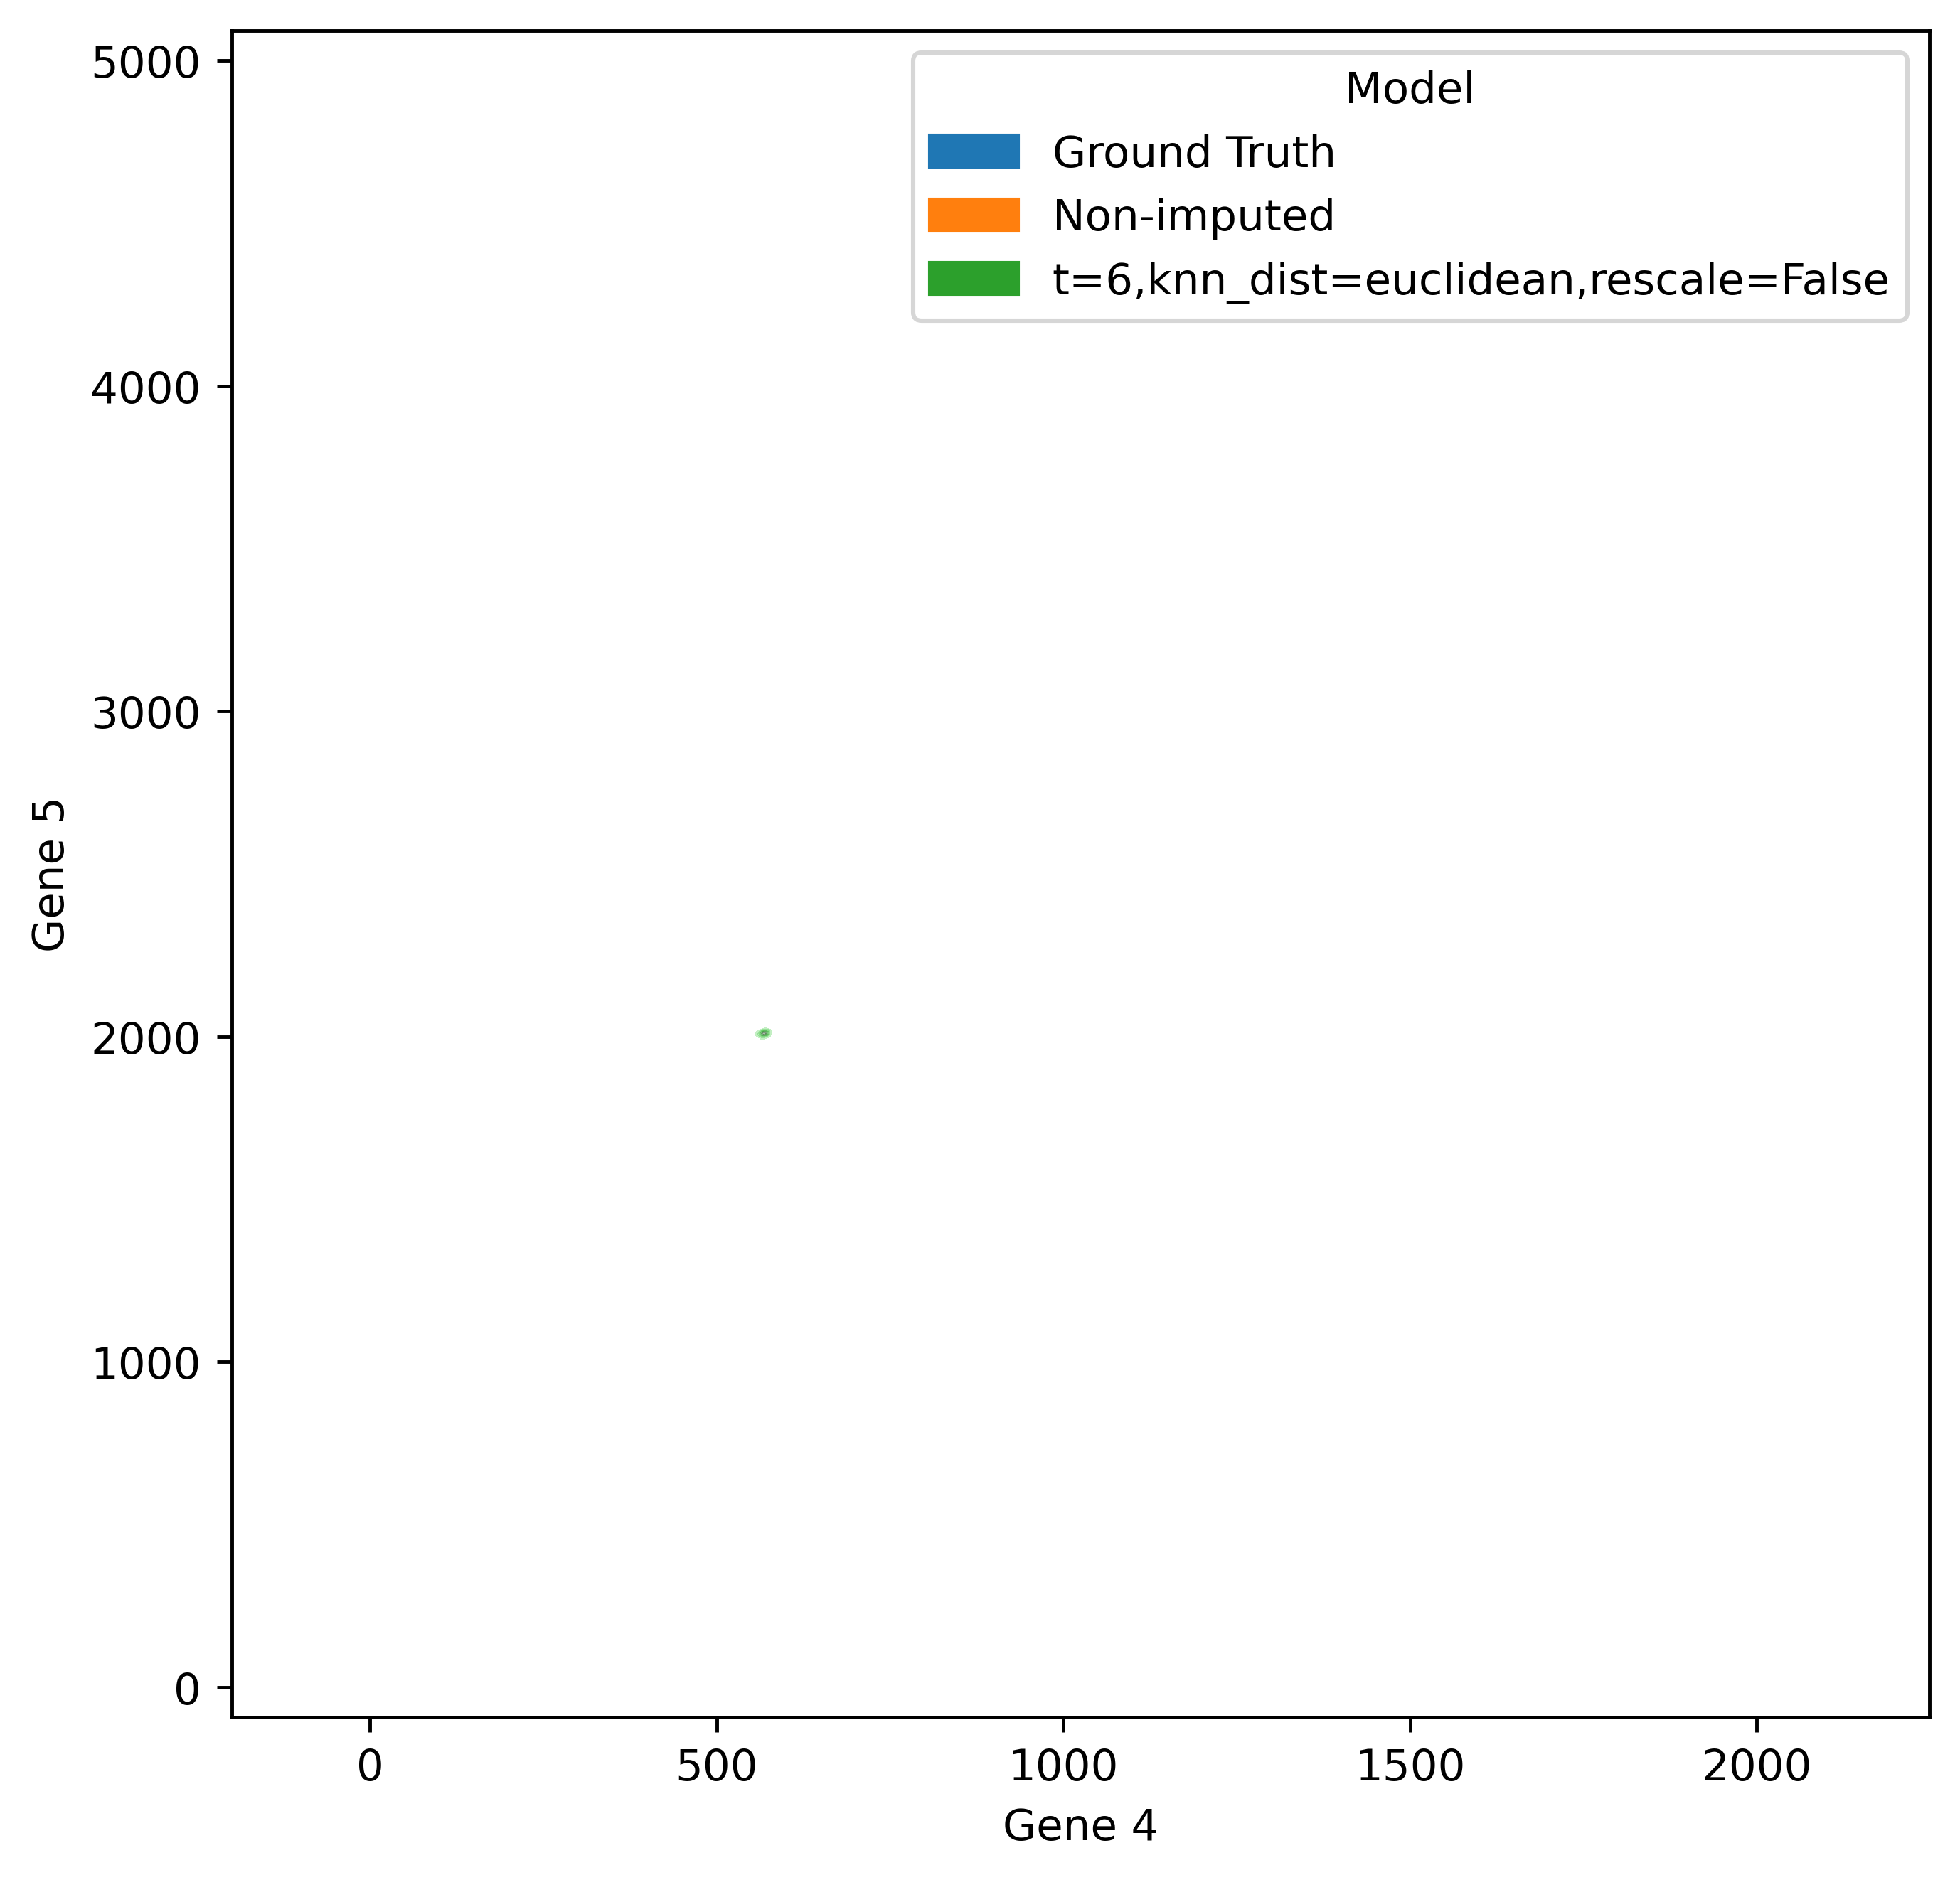

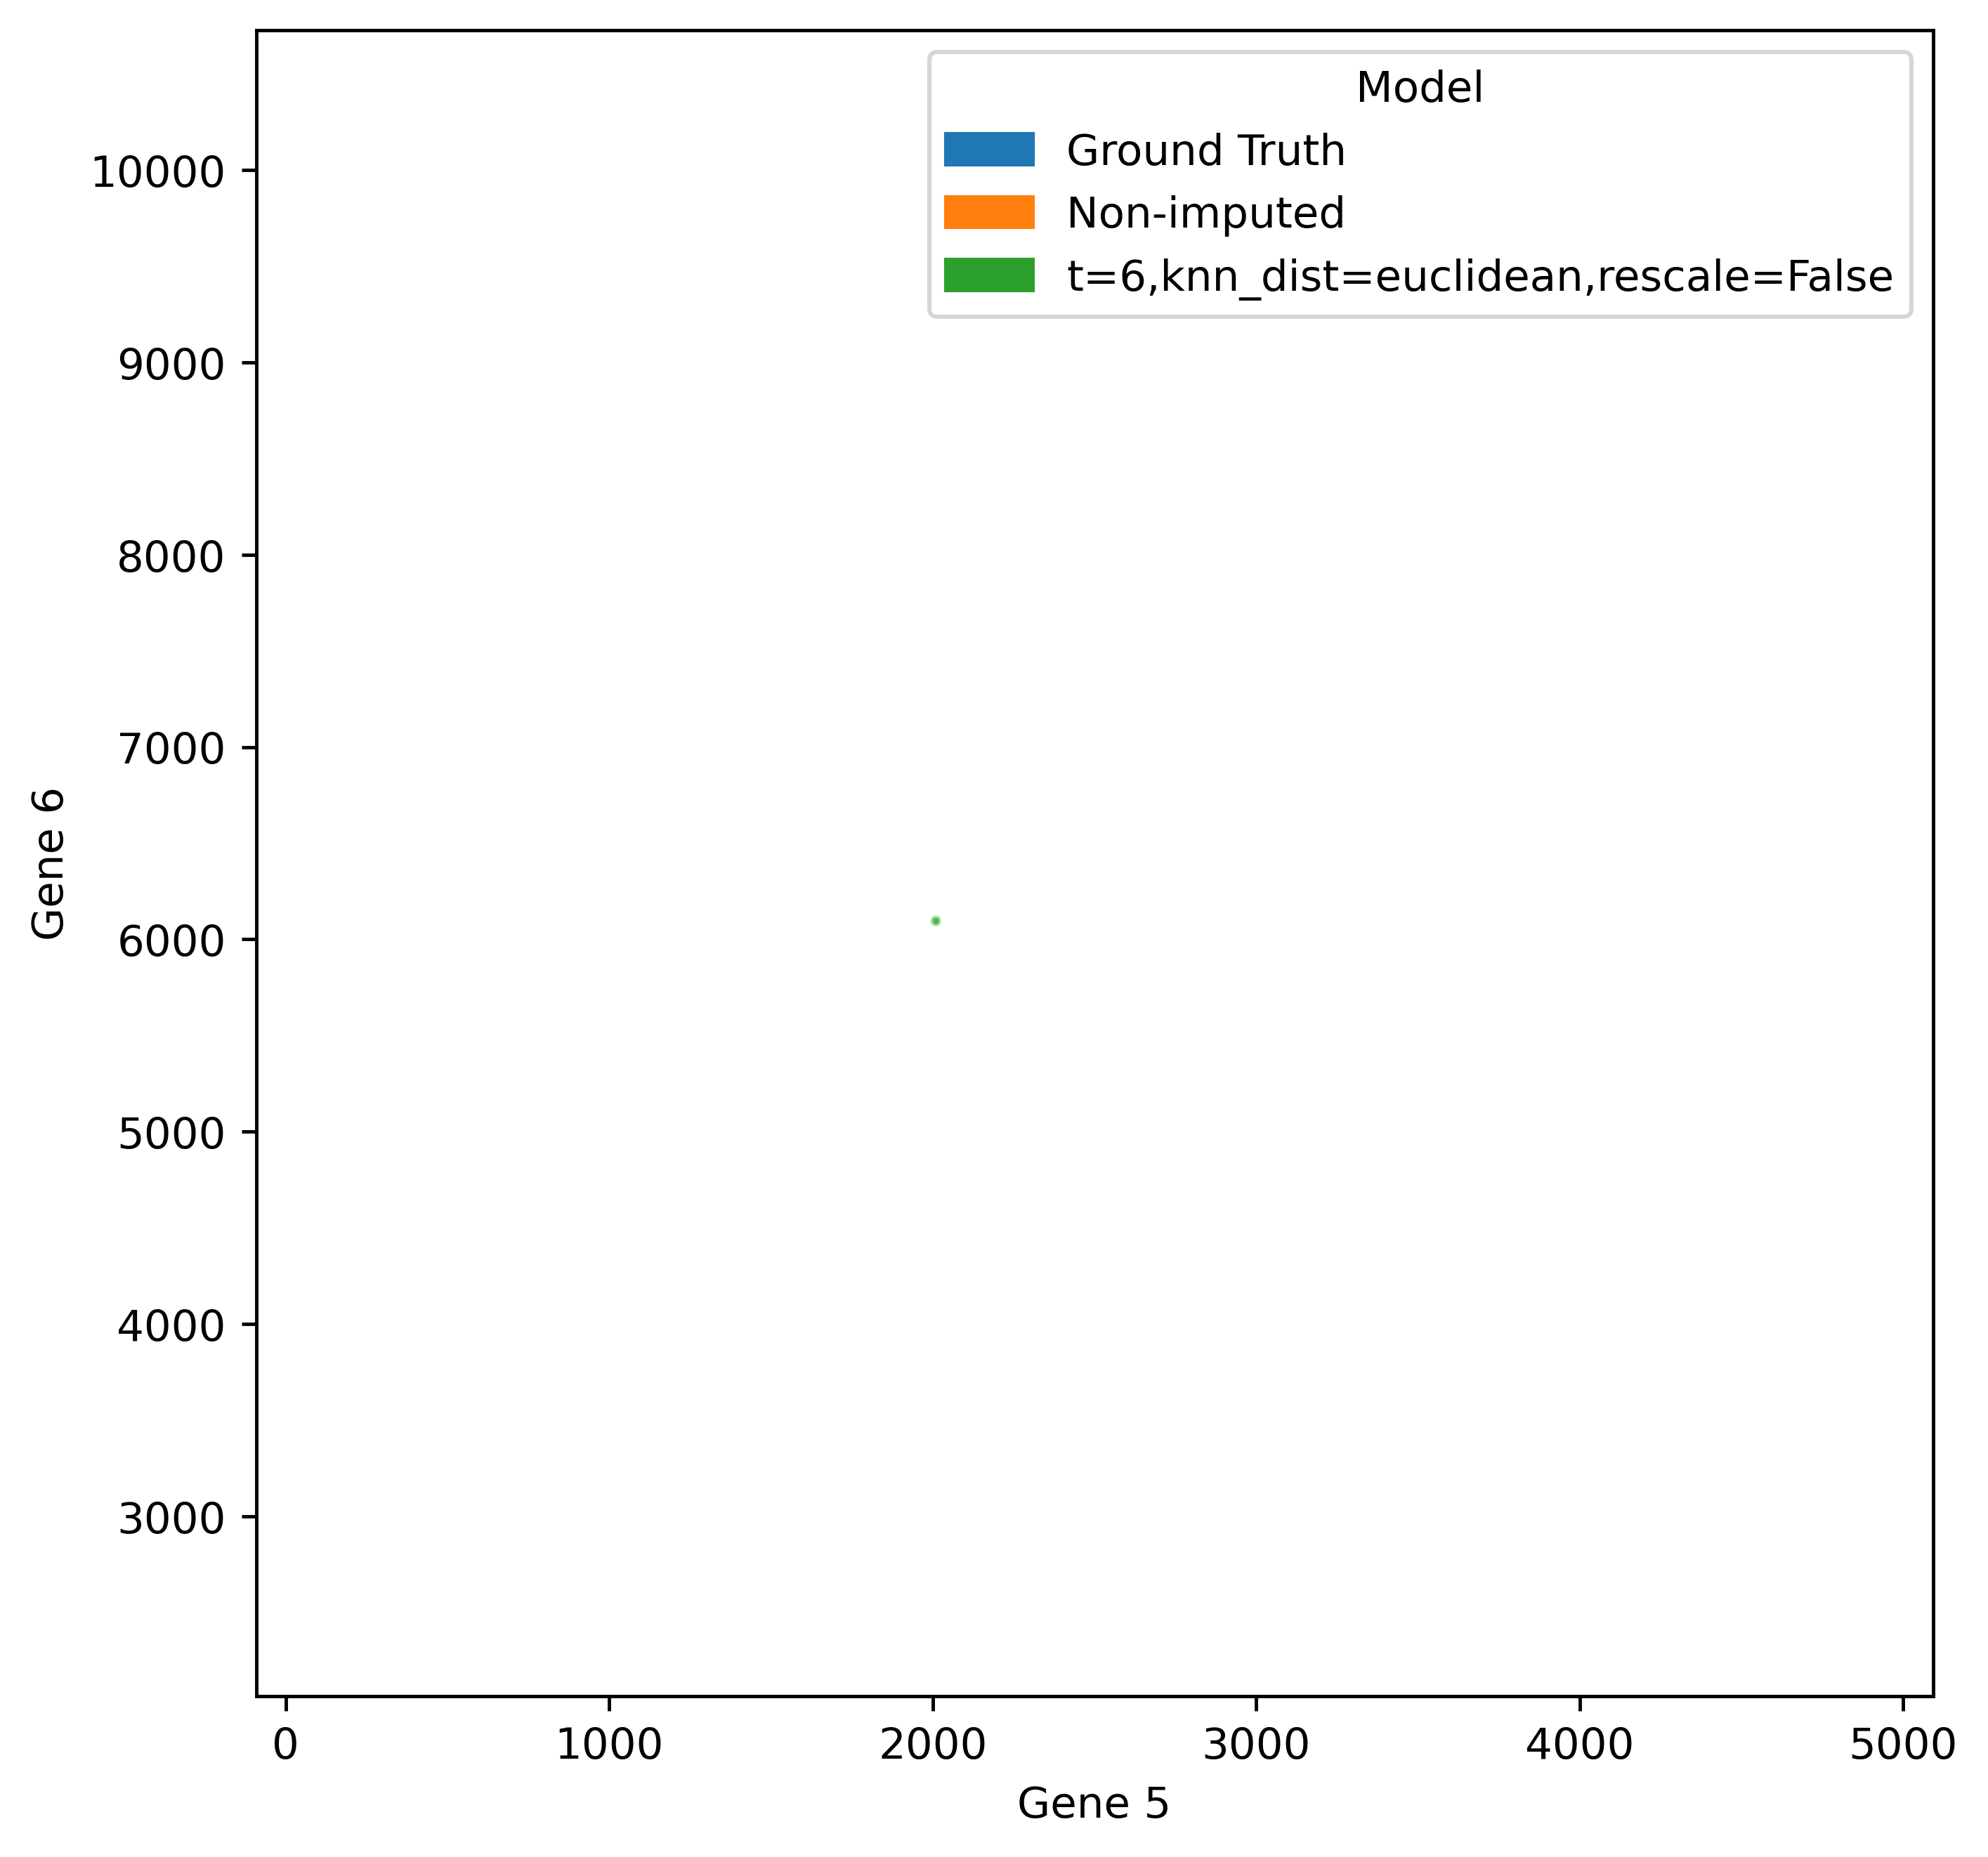

In [91]:
for i in range(5): 
    plt.figure()
    sns.kdeplot(data=worst_imputation, x=genes[i], y =genes[i+1], hue="Model", alpha=0.4, fill=True)